# KIVA CAPSTONE PROJECT - EXPLORATORY DATA ANALYSIS

Here is the code for the visualisations that can be found in the presentation, as well as the Natural Language Processing done with the text variables.

 
 
 
 
 *** 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.set_option("max_columns", 100)

In [2]:
loans = pd.read_csv('/Users/nicolas/Downloads/loans_data_cleaned.csv')

In [3]:
loans.columns

Index(['Unnamed: 0', 'original_language', 'description', 'loan_amount',
       'status', 'activity_name', 'sector_name', 'loan_use', 'country_name',
       'town_name', 'currency_policy', 'currency_exchange_coverage_rate',
       'currency', 'posted_time', 'planned_expiration_time', 'lender_term',
       'tags', 'borrower_pictured', 'repayment_interval', 'distribution_model',
       'has_video', 'field_partners', 'number_of_borrowers',
       'gender_categories', 'days_of_campaign_duration'],
      dtype='object')

In [4]:
loans.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
loans.dtypes

original_language                   object
description                         object
loan_amount                        float64
status                               int64
activity_name                       object
sector_name                         object
loan_use                            object
country_name                        object
town_name                           object
currency_policy                     object
currency_exchange_coverage_rate     object
currency                            object
posted_time                         object
planned_expiration_time             object
lender_term                        float64
tags                                object
borrower_pictured                   object
repayment_interval                  object
distribution_model                  object
has_video                            int64
field_partners                      object
number_of_borrowers                  int64
gender_categories                   object
days_of_cam

## TARGET VARIABLE

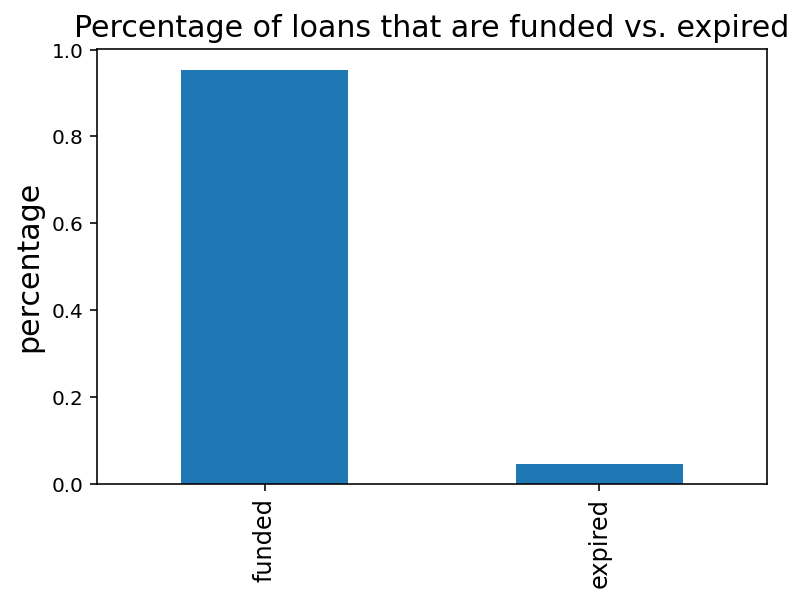

In [6]:
loans.status.value_counts(normalize=True).plot(kind='bar')
plt.xticks(ticks=[1,0],labels=['expired','funded'])
plt.ylabel('percentage',fontsize=15)
plt.title('Percentage of loans that are funded vs. expired',fontsize=15)
plt.xticks(fontsize=12)
plt.show()

## GENDERS

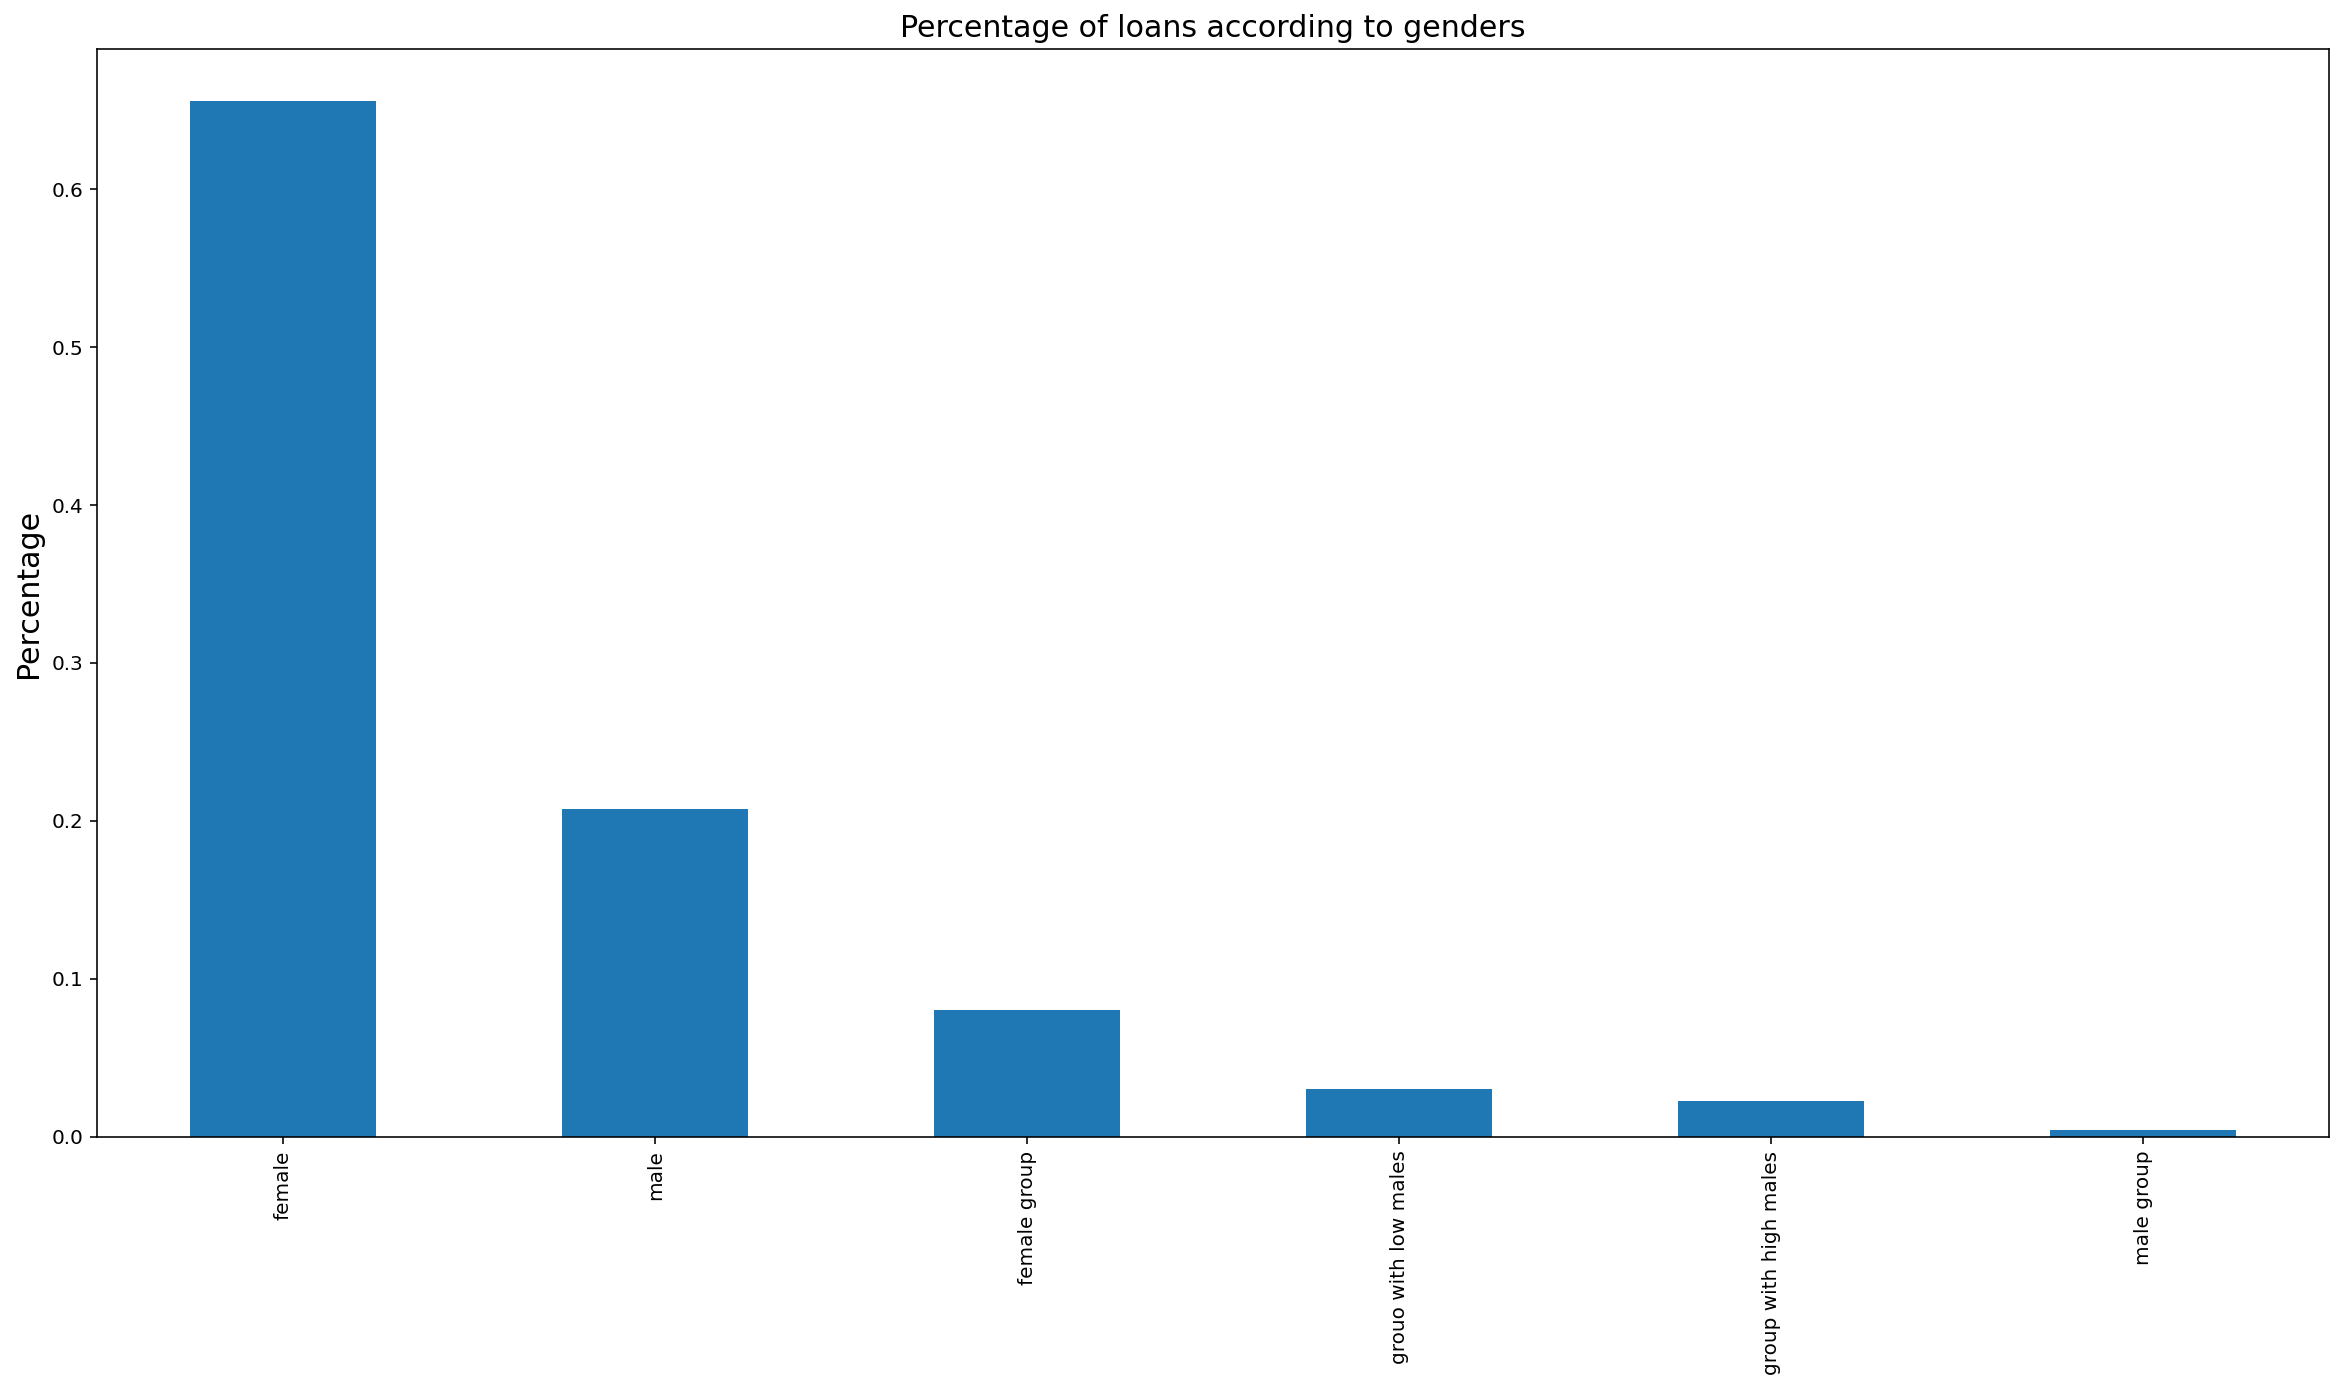

In [7]:
loans.gender_categories.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
plt.ylabel('Percentage',fontsize=15)
plt.xlabel('', fontsize=15)
plt.title('Percentage of loans according to genders',fontsize=15)
plt.xticks(ticks = [0,1,2,3,4,5],fontsize=10,labels = ['female','male','female group','grouo with low males','group with high males','male group'])
plt.show()

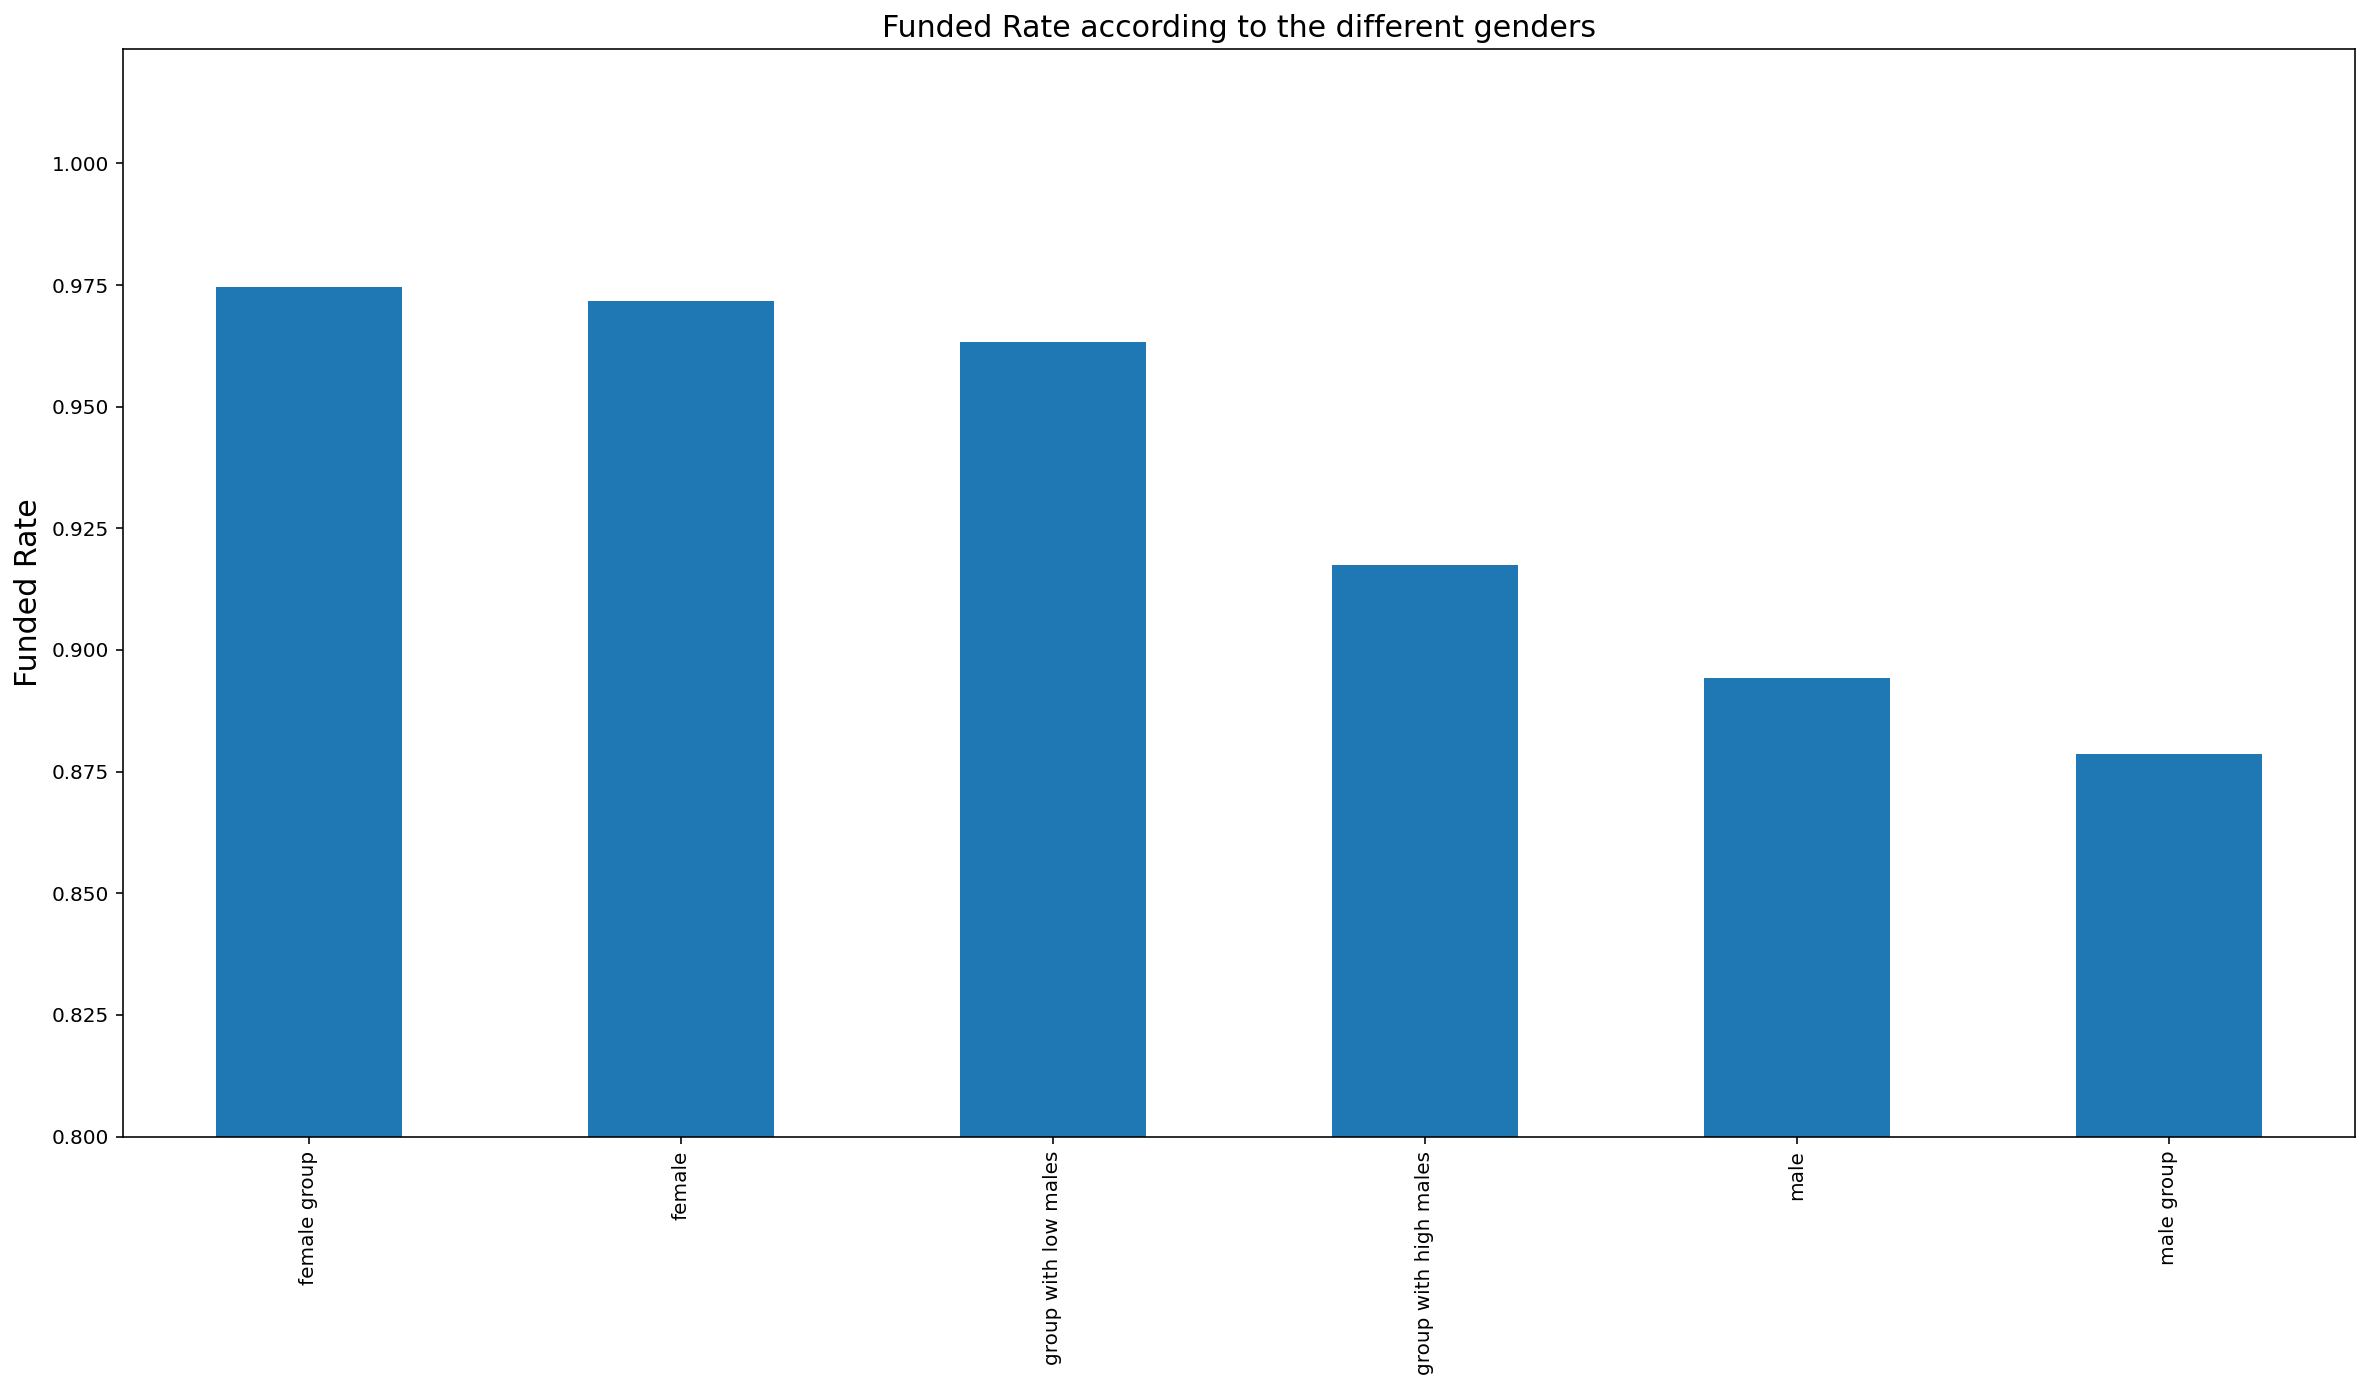

In [8]:
fig,ax = plt.subplots()
loans.groupby(['gender_categories'])['status'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
plt.ylim(bottom=0.8)
plt.ylabel('Funded Rate',fontsize=15)
plt.xlabel('')
plt.title('Funded Rate according to the different genders',fontsize=15)
plt.xticks(ticks = [0,1,2,3,4,5],fontsize=10,labels = ['female group','female','group with low males','group with high males','male','male group'])
plt.xticks(fontsize=10)
plt.show()

## LOAN AMOUNT

In [9]:
loans['posted_time'] = pd.to_datetime(loans['posted_time'])
loans = loans.set_index('posted_time').sort_values('posted_time')

In [10]:
quarterly_means = loans.resample('Q').mean()

Text(0.5, 1.0, 'Quarterly means of loan amounts throughout time')

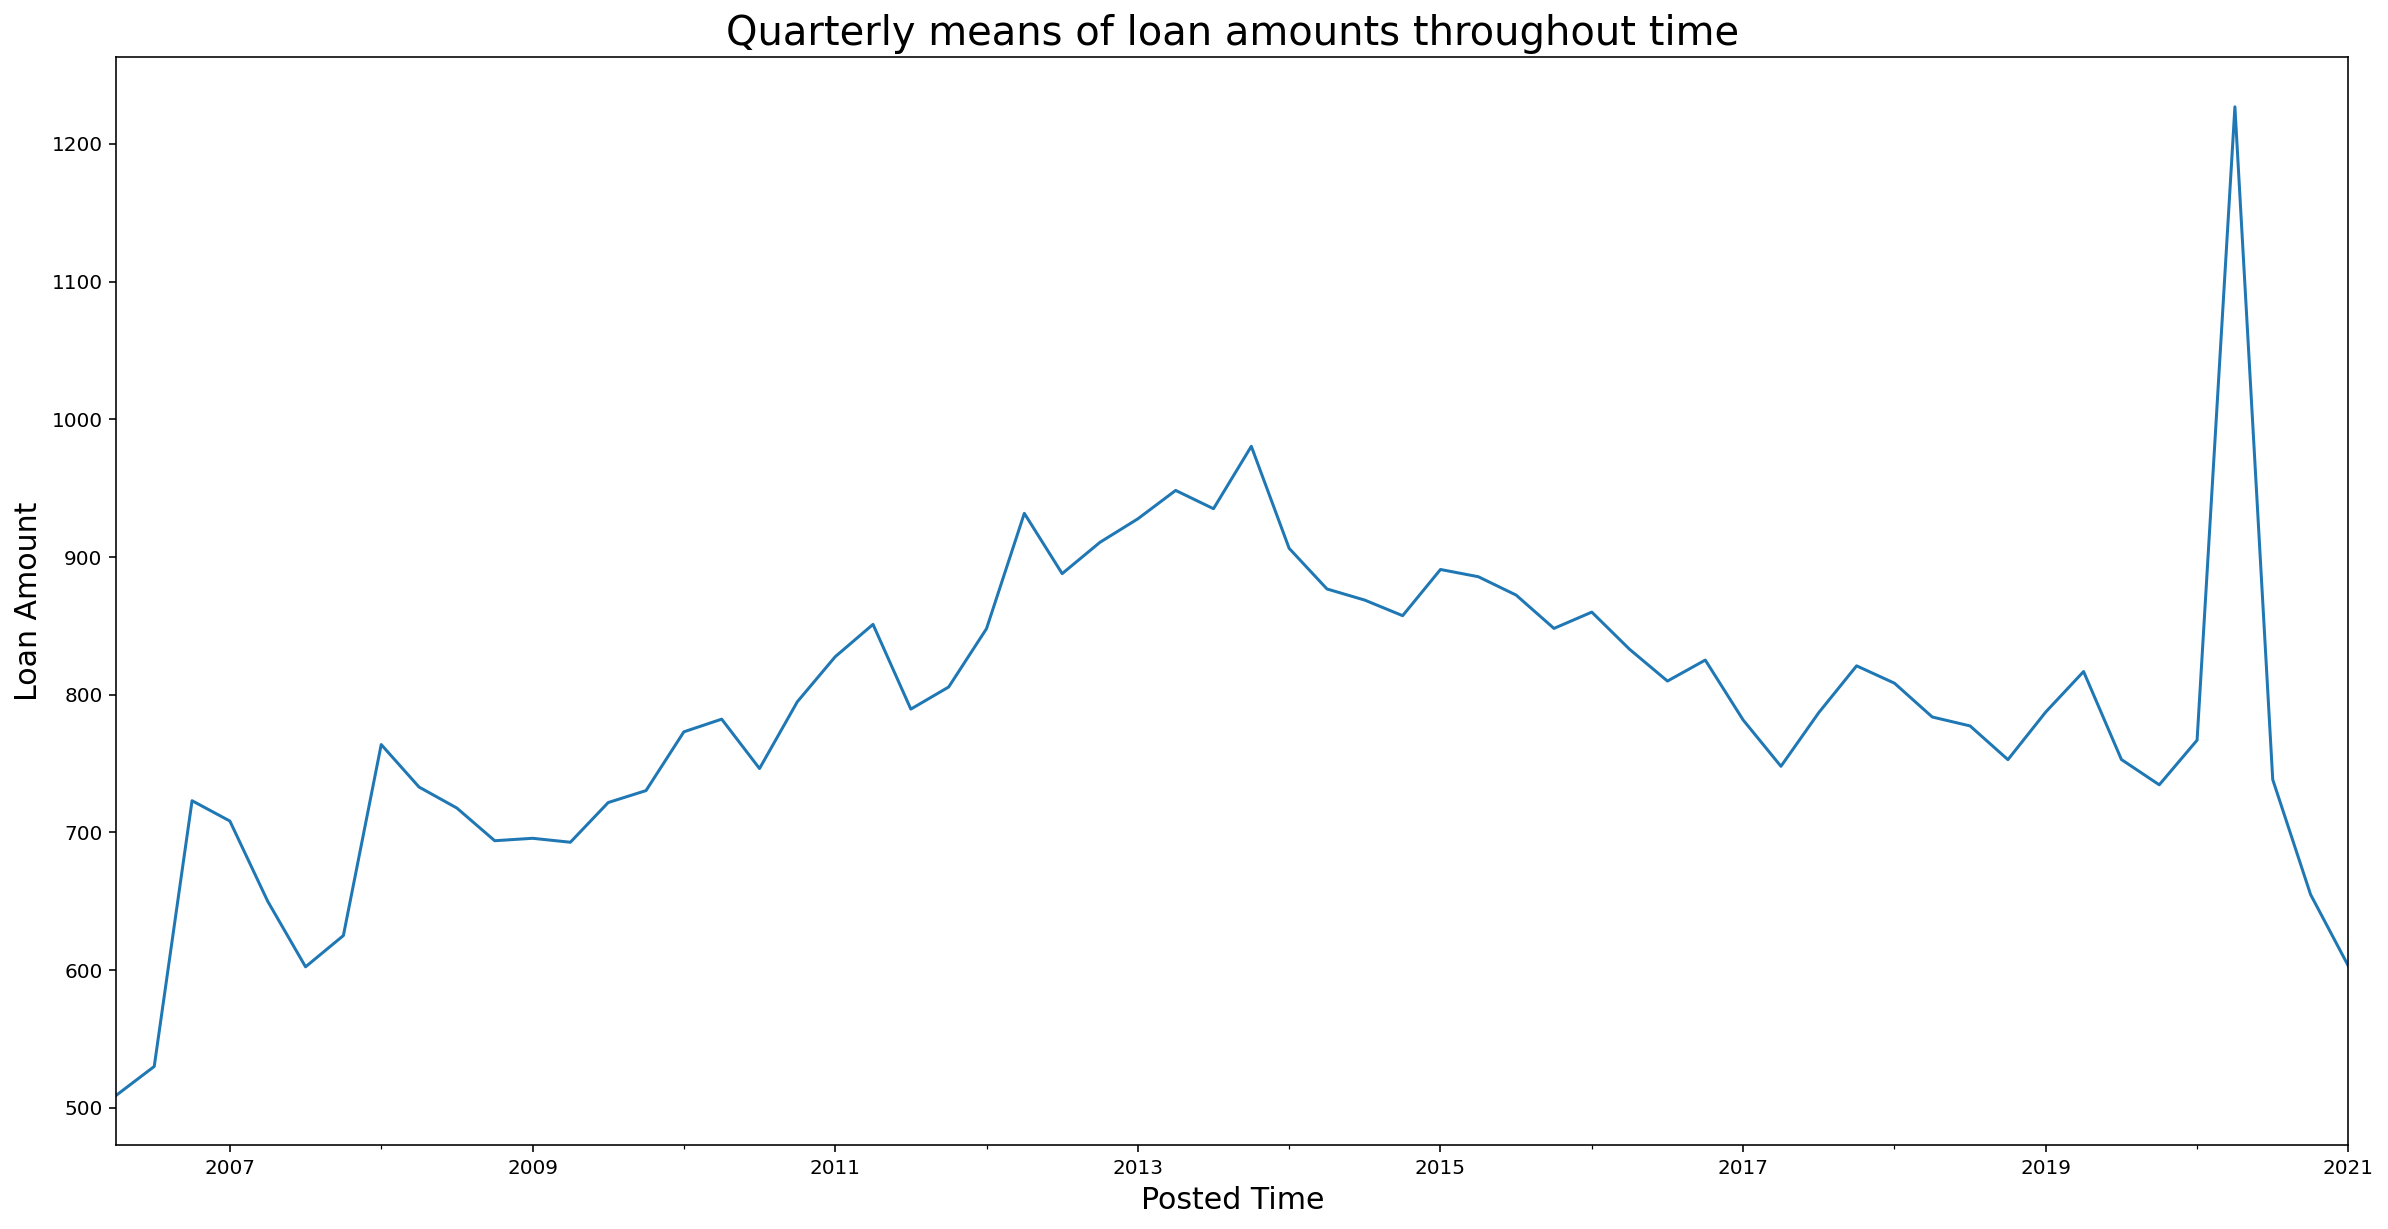

In [11]:
quarterly_means['loan_amount'].plot(figsize=(20,10))
plt.ylabel('Loan Amount',fontsize=15)
plt.xlabel('Posted Time',fontsize=15)
plt.title('Quarterly means of loan amounts throughout time',fontsize=20)

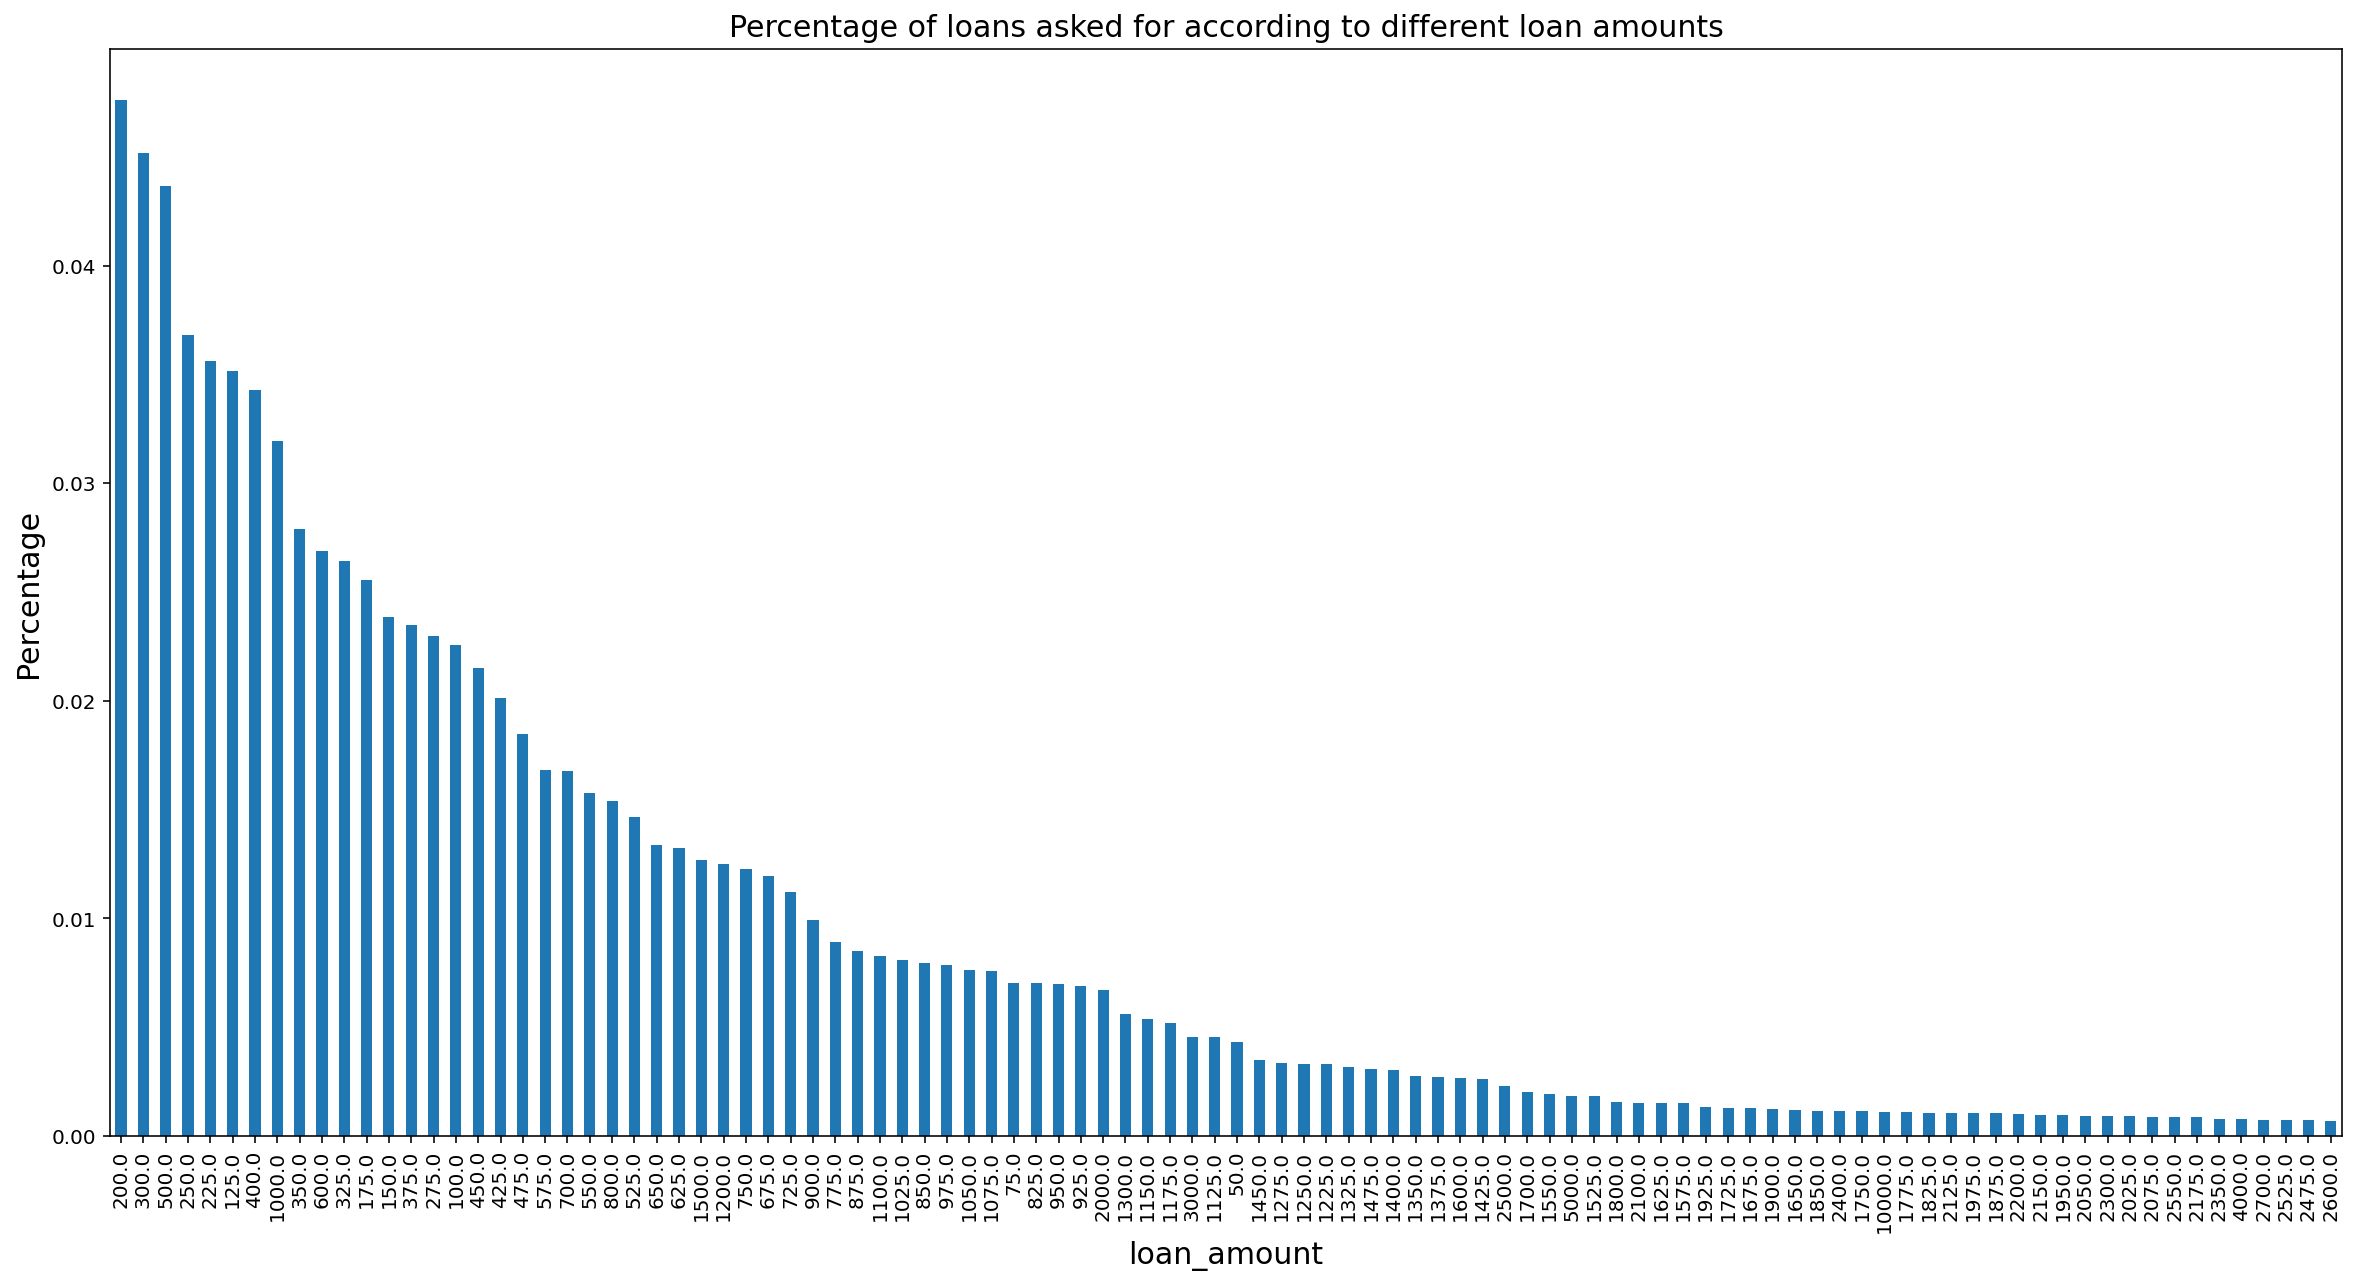

In [12]:
import numpy as np
loans.loan_amount.value_counts(normalize=True).head(100).sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
plt.ylabel('Percentage',fontsize=15)
plt.xlabel('loan_amount',fontsize=15)
plt.title("Percentage of loans asked for according to different loan amounts",fontsize=15)
plt.show()

In [13]:
main_amounts = loans.loan_amount.value_counts().head(100) #MAIN AMOUNTS

Text(0.5, 1.0, 'Funded percentage per loan amount')

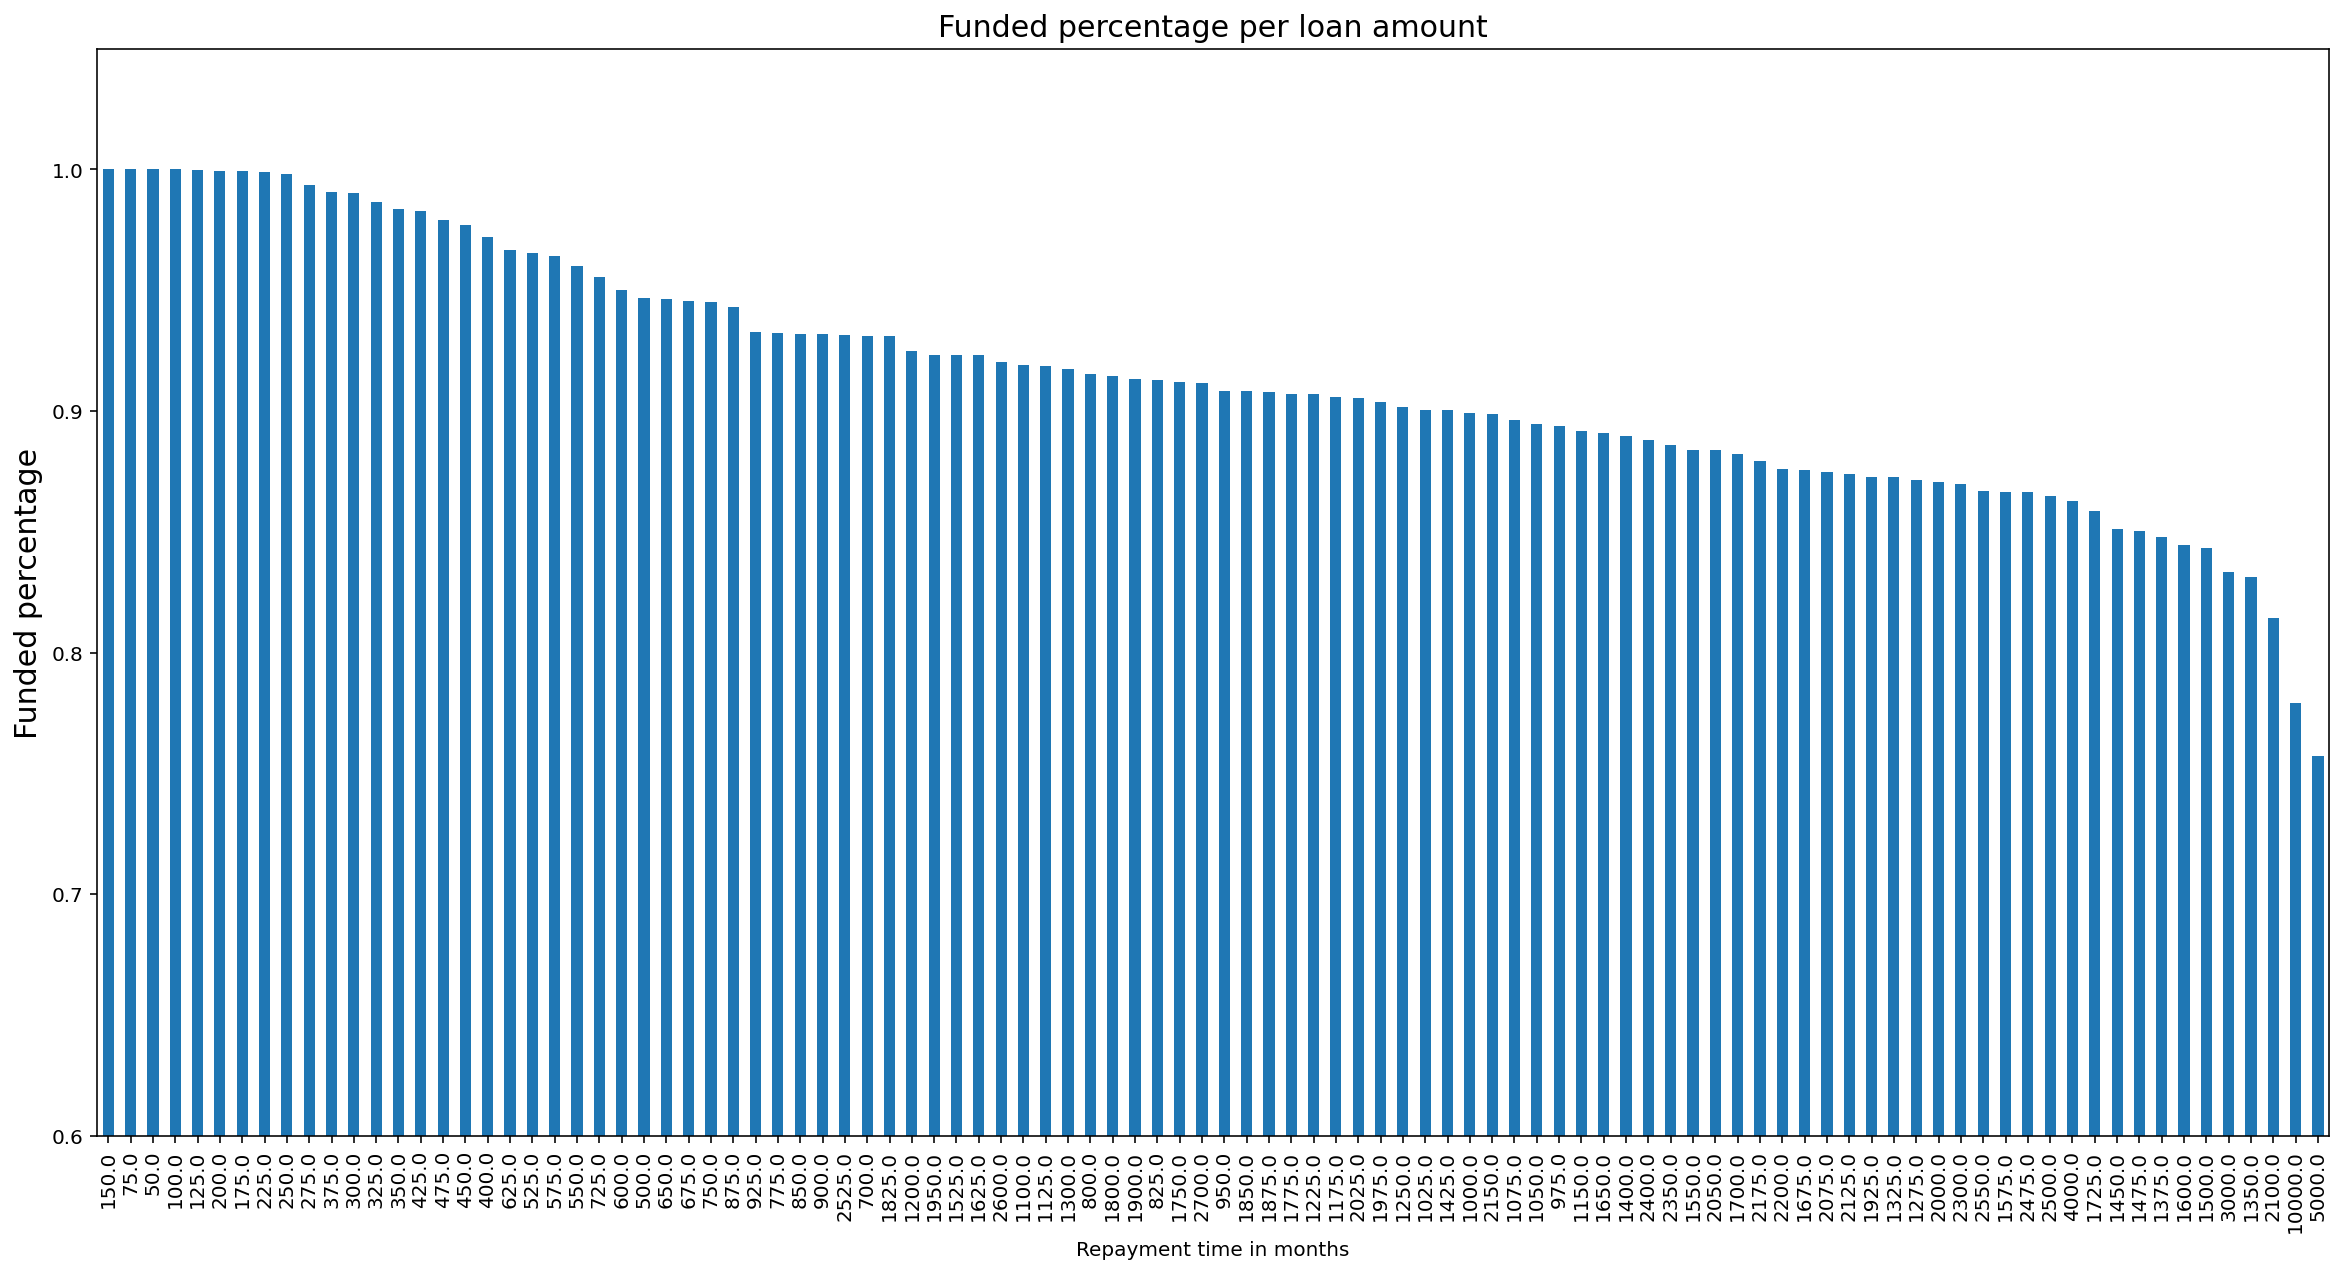

In [14]:
loans.groupby('loan_amount')['status'].mean().loc[main_amounts.index].sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
plt.ylabel('Funded percentage',fontsize=15)
plt.ylim(0.6)
plt.xlabel('Repayment time in months')
plt.title('Funded percentage per loan amount',fontsize=15)

## LENDER TERM

In [15]:
main_lender_term = loans.lender_term.value_counts().head(37) #ABOVE 1000 OBSV

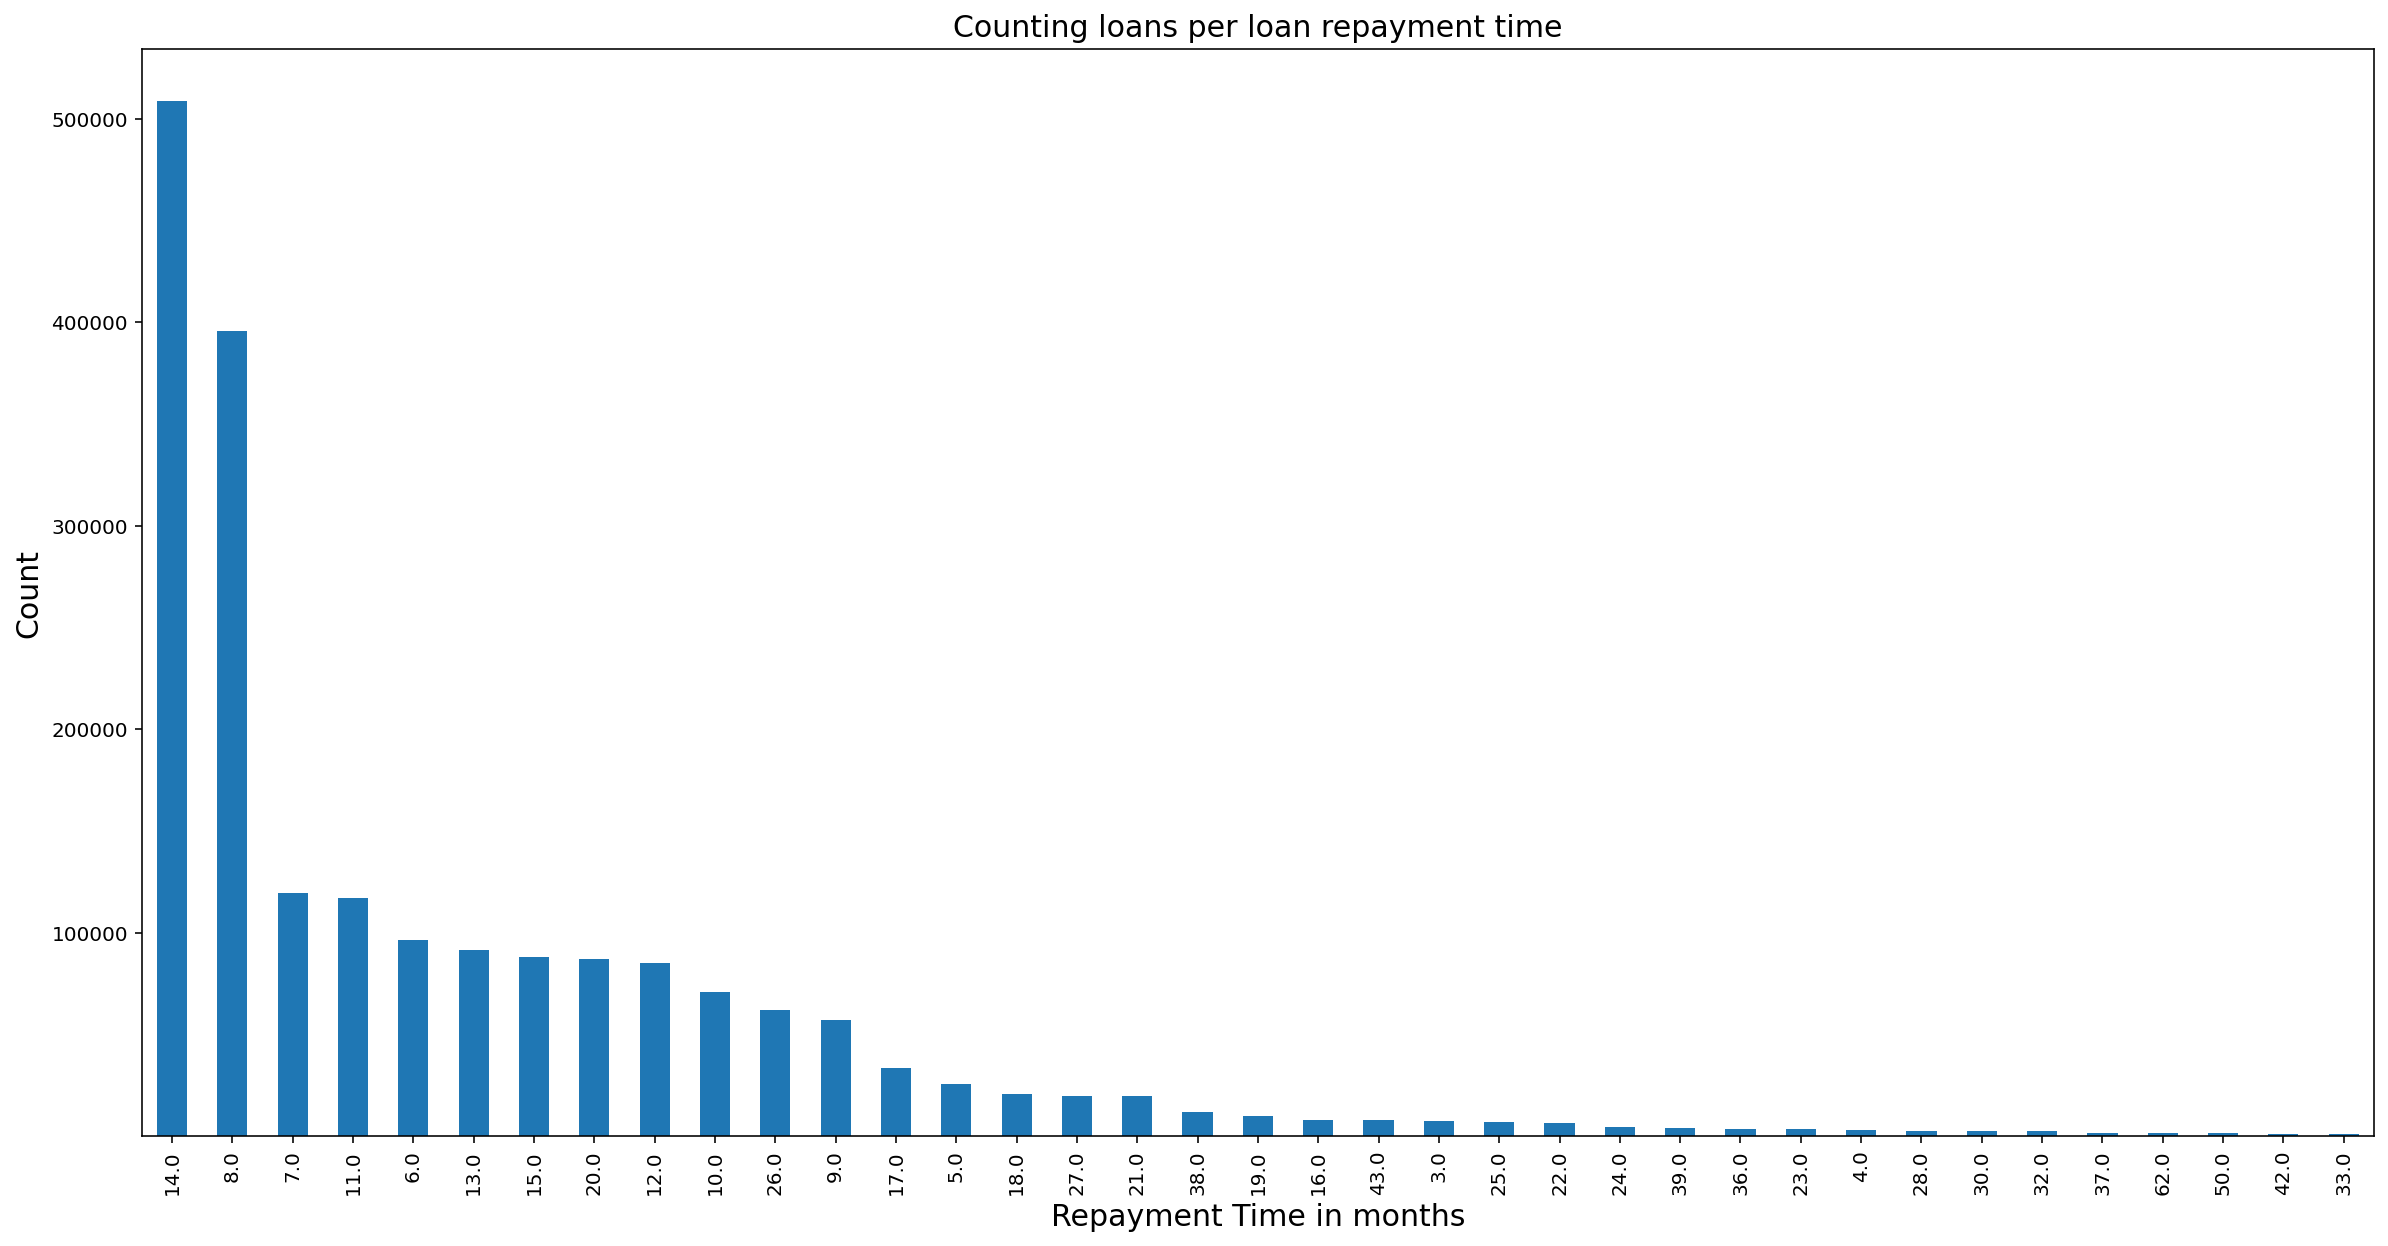

In [16]:
fig,ax = plt.subplots()
loans.groupby('lender_term',sort=False)['status'].count().loc[main_lender_term.index].plot(figsize=(20,10),kind='bar',ax=ax)
ax.set_ylim(bottom=0.7)
ax.set_ylabel('Count',fontsize=15)
ax.set_xlabel('Repayment Time in months',fontsize=15)
ax.set_title('Counting loans per loan repayment time',fontsize=15)
plt.show()

Text(0.5, 1.0, 'Funded percentage per loan repayment time')

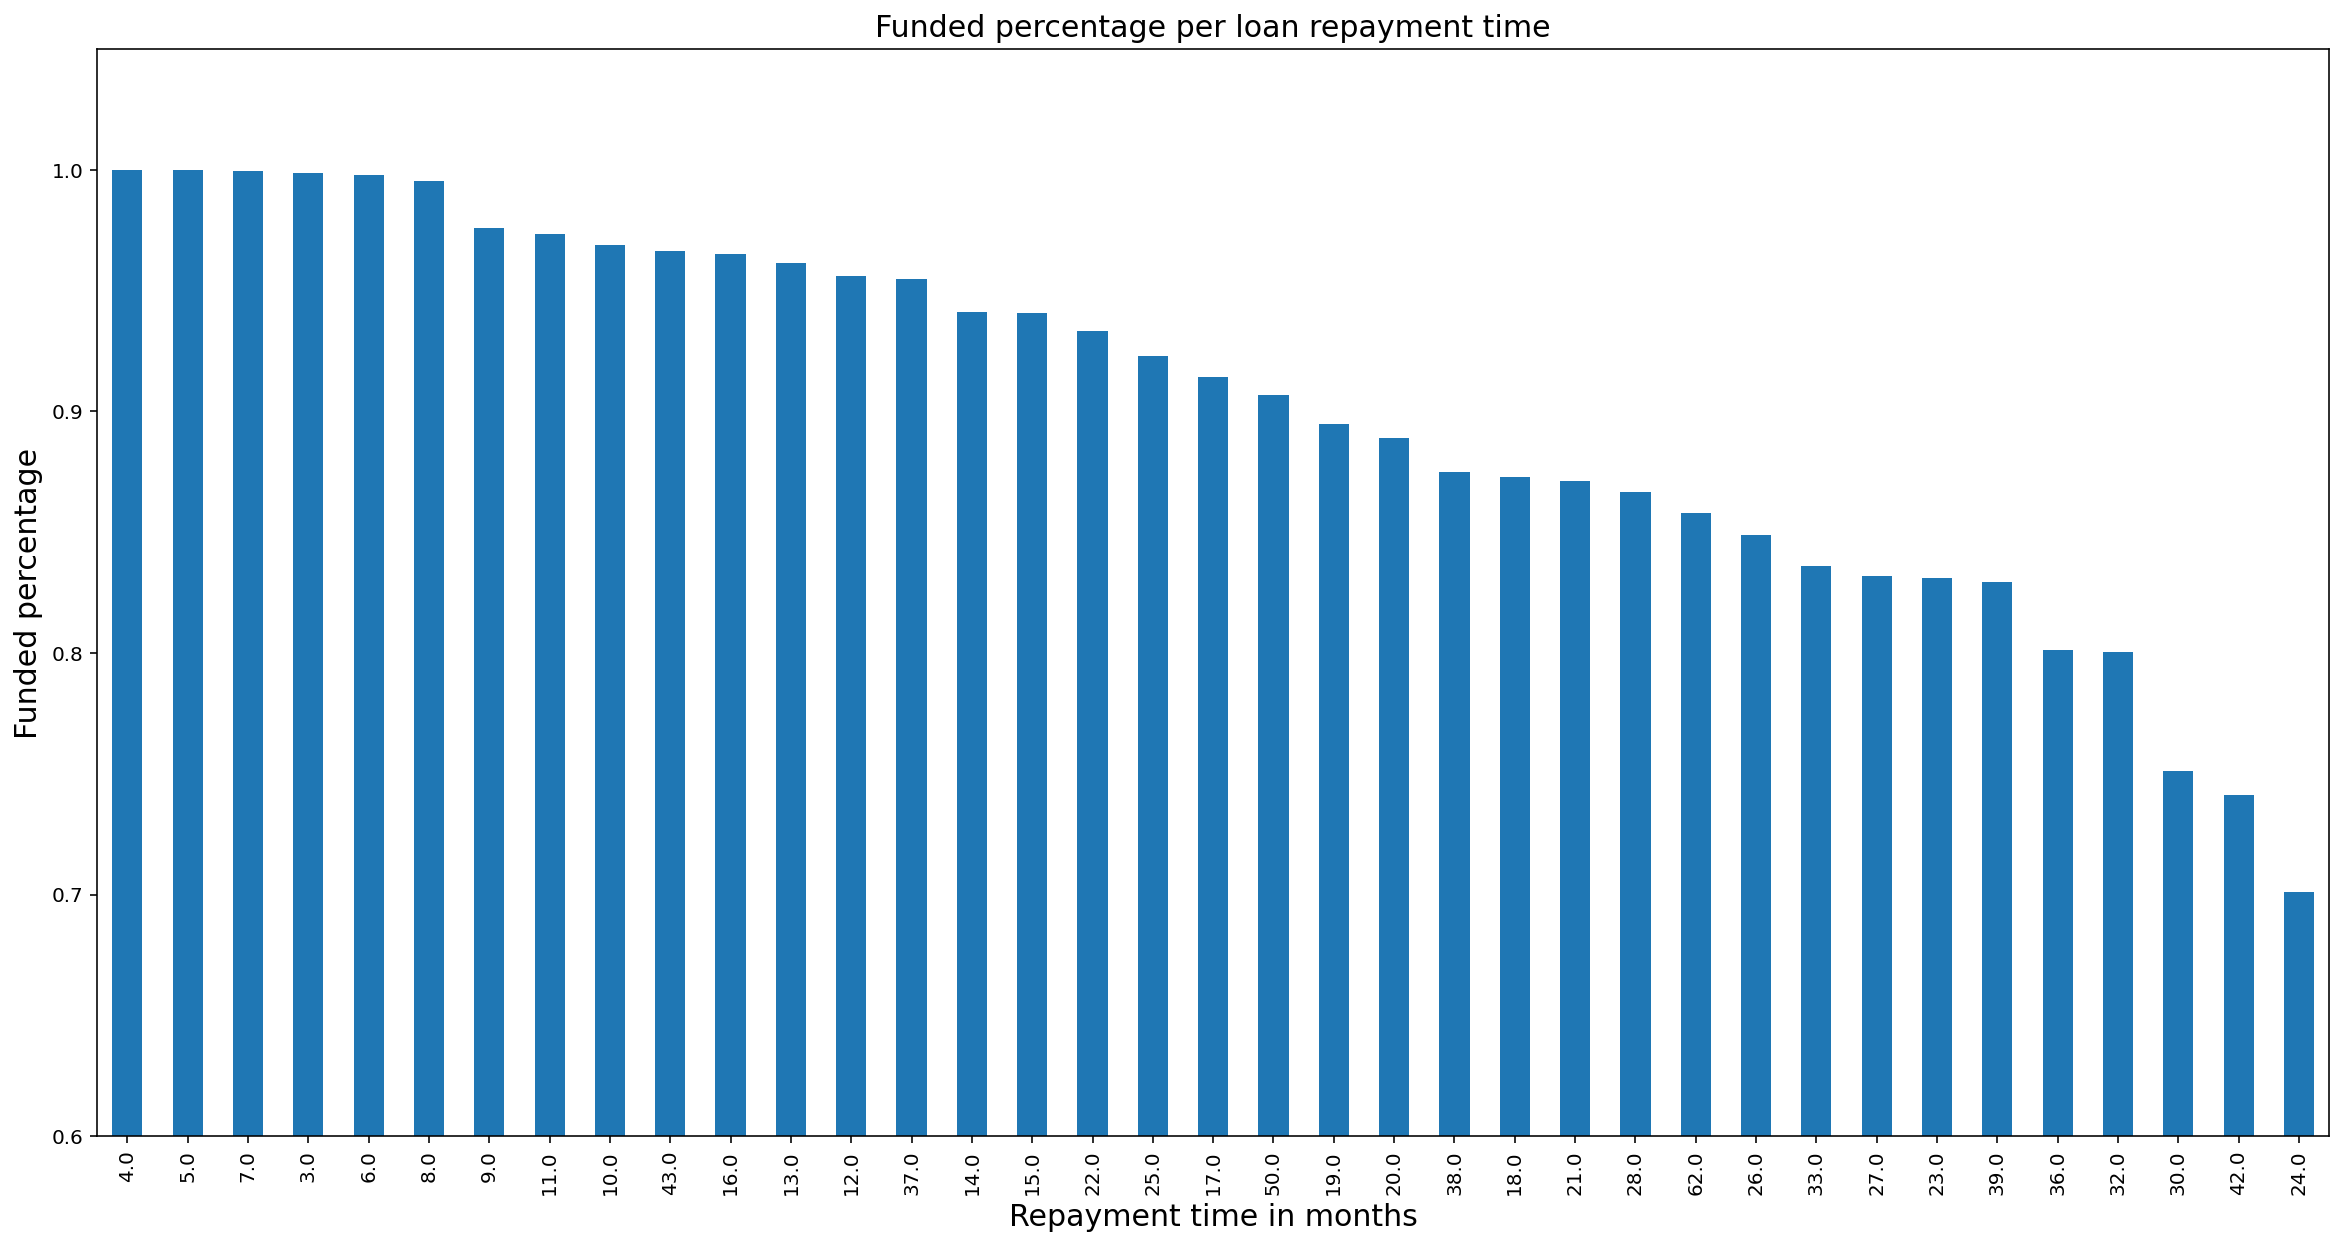

In [17]:
loans.groupby('lender_term')['status'].mean().loc[main_lender_term.index].sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
plt.ylabel('Funded percentage',fontsize=15)
plt.ylim(0.6)
plt.xlabel('Repayment time in months',fontsize=15)
plt.title('Funded percentage per loan repayment time',fontsize=15)

## SECTOR

Text(0.5, 1.0, 'Percentage of loans per sector')

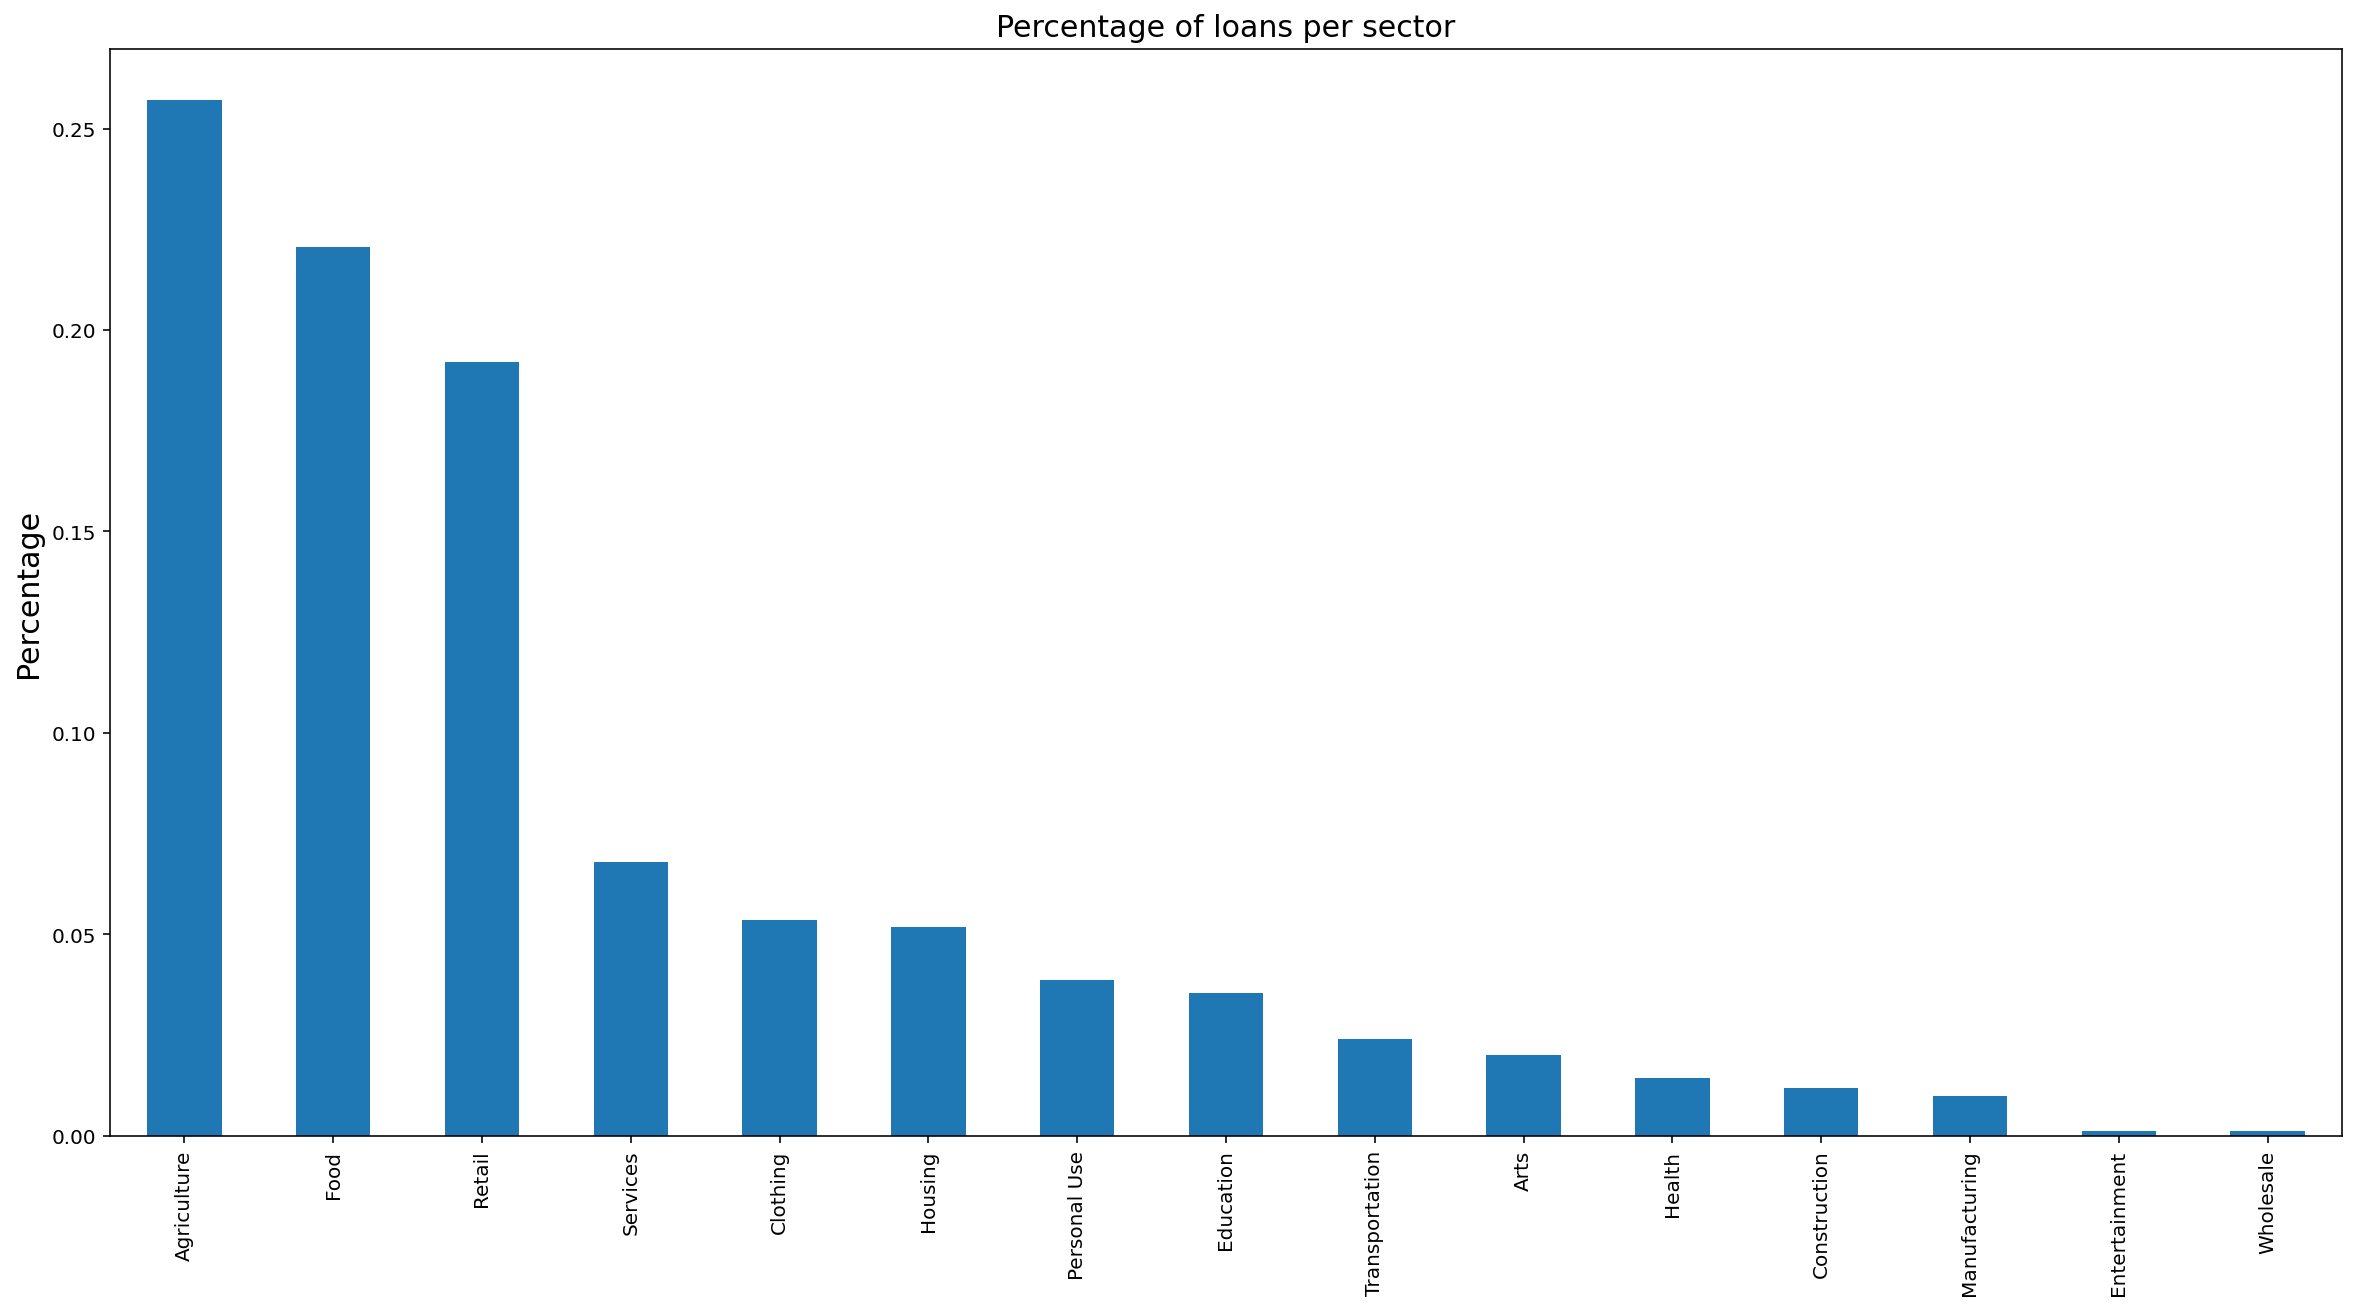

In [18]:
loans.sector_name.value_counts(normalize=True).plot(kind='bar',figsize=(20,10))
plt.ylabel('Percentage',fontsize=15)
plt.title('Percentage of loans per sector',fontsize=15)

Text(0.5, 1.0, 'Funded percentage of loans per sector')

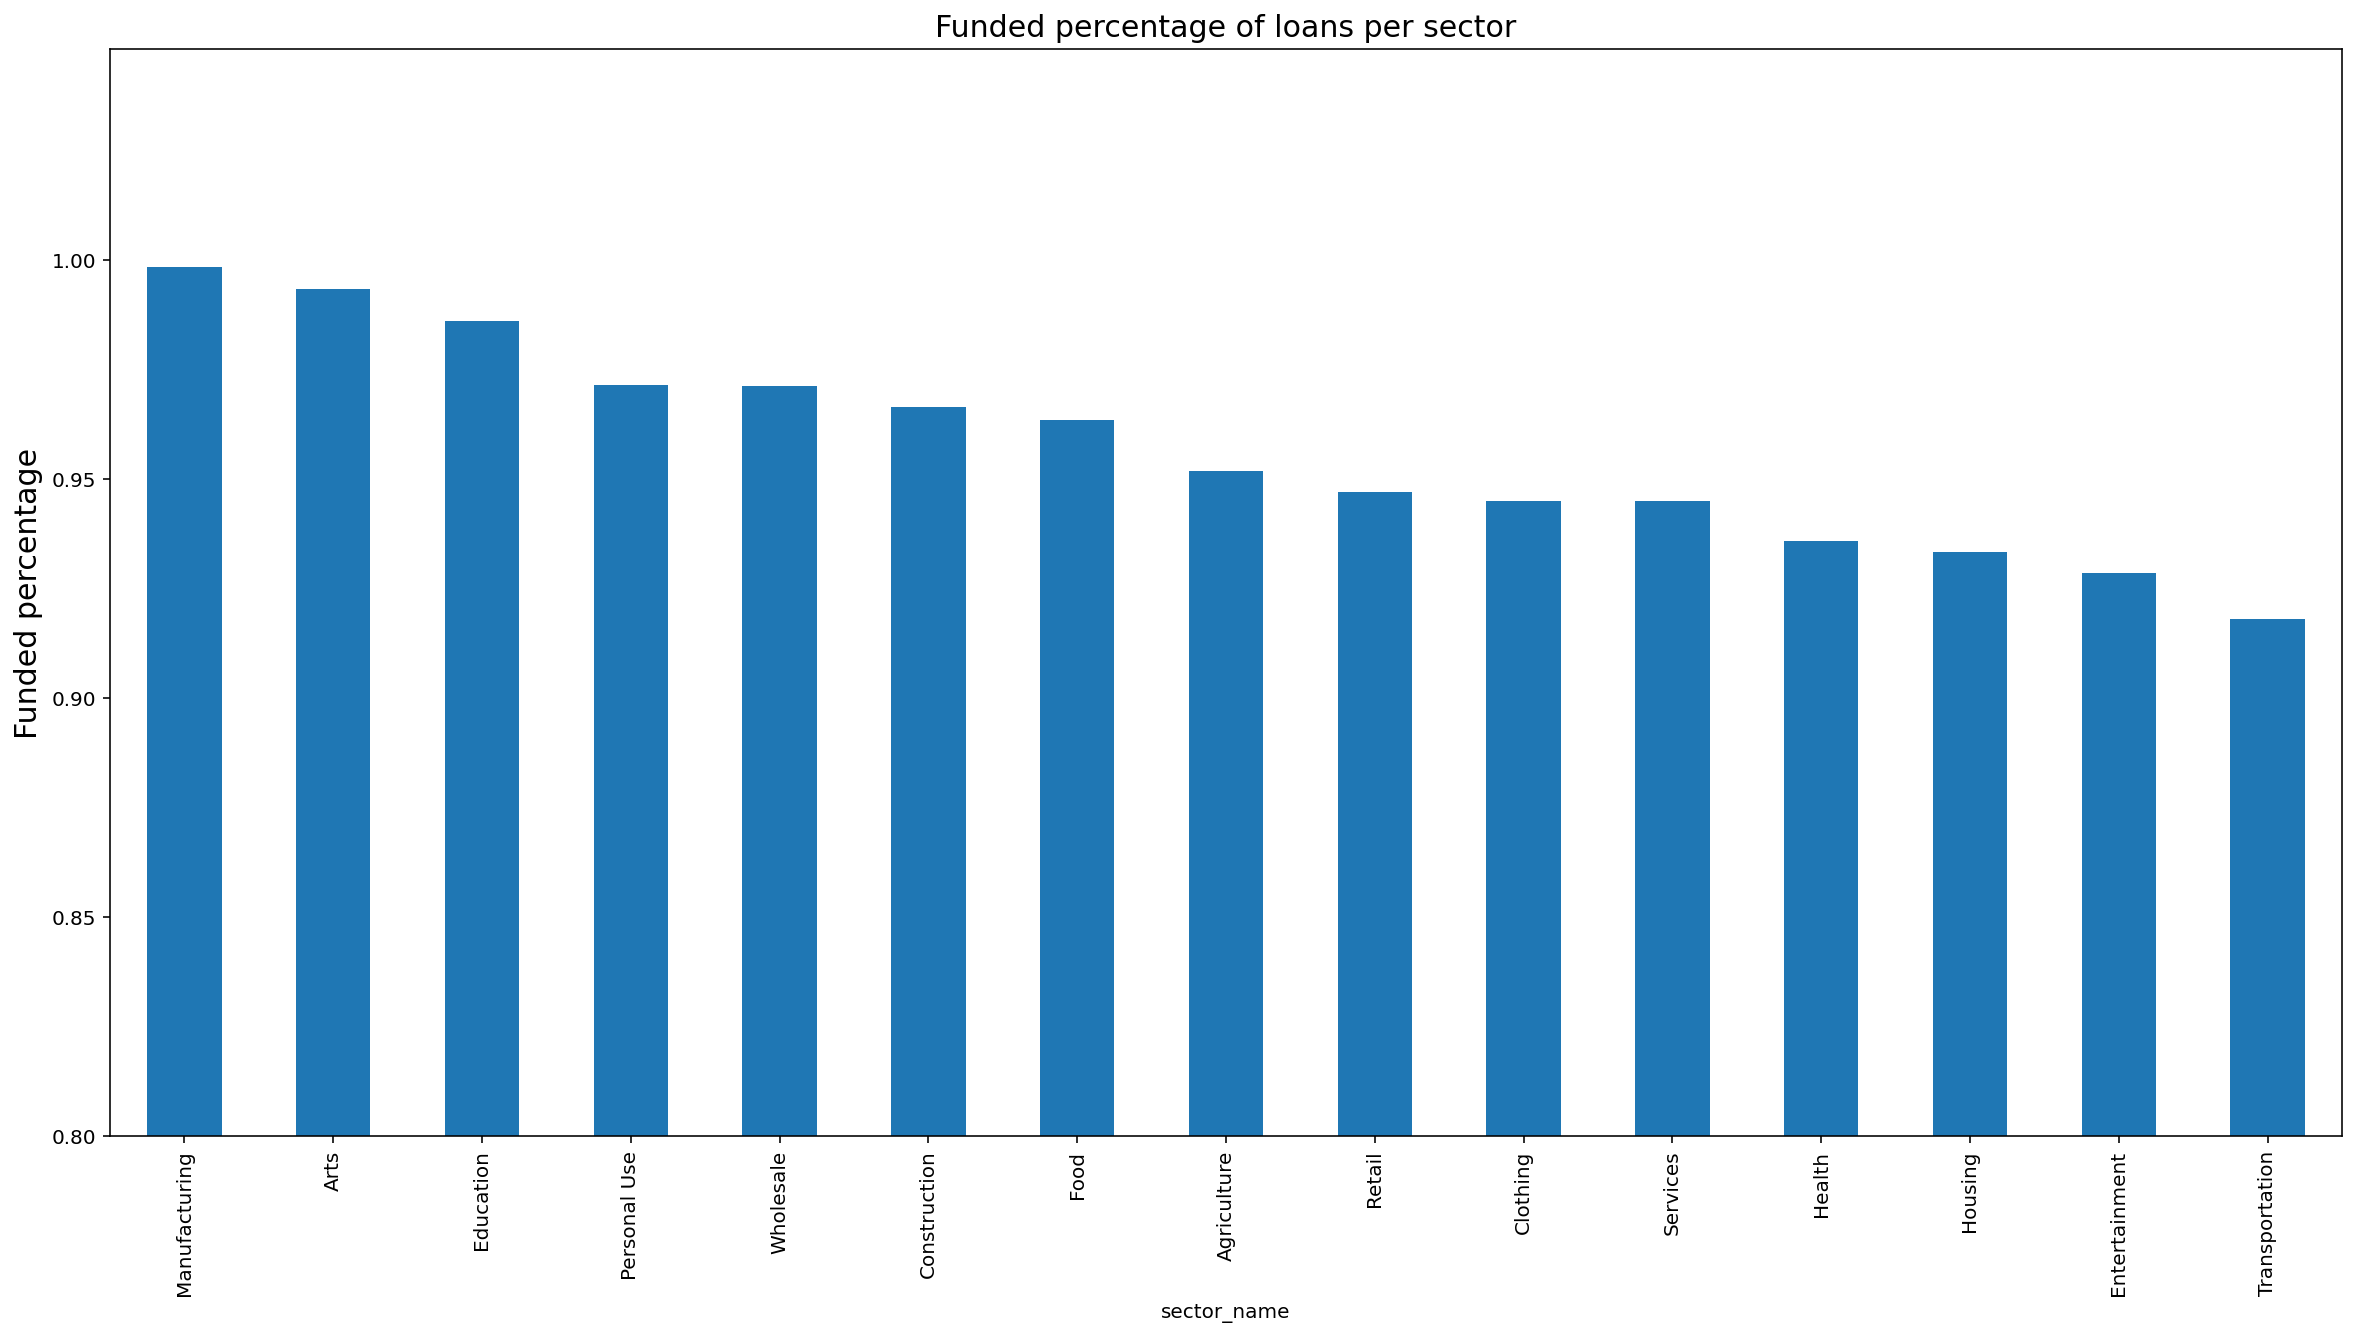

In [19]:
loans.groupby('sector_name').status.mean().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
plt.ylabel('Funded percentage',fontsize=15)
plt.ylim(0.8)
plt.title('Funded percentage of loans per sector',fontsize=15)

## ACTIVITIES

In [20]:
main_activities = loans.activity_name.value_counts().head(117)

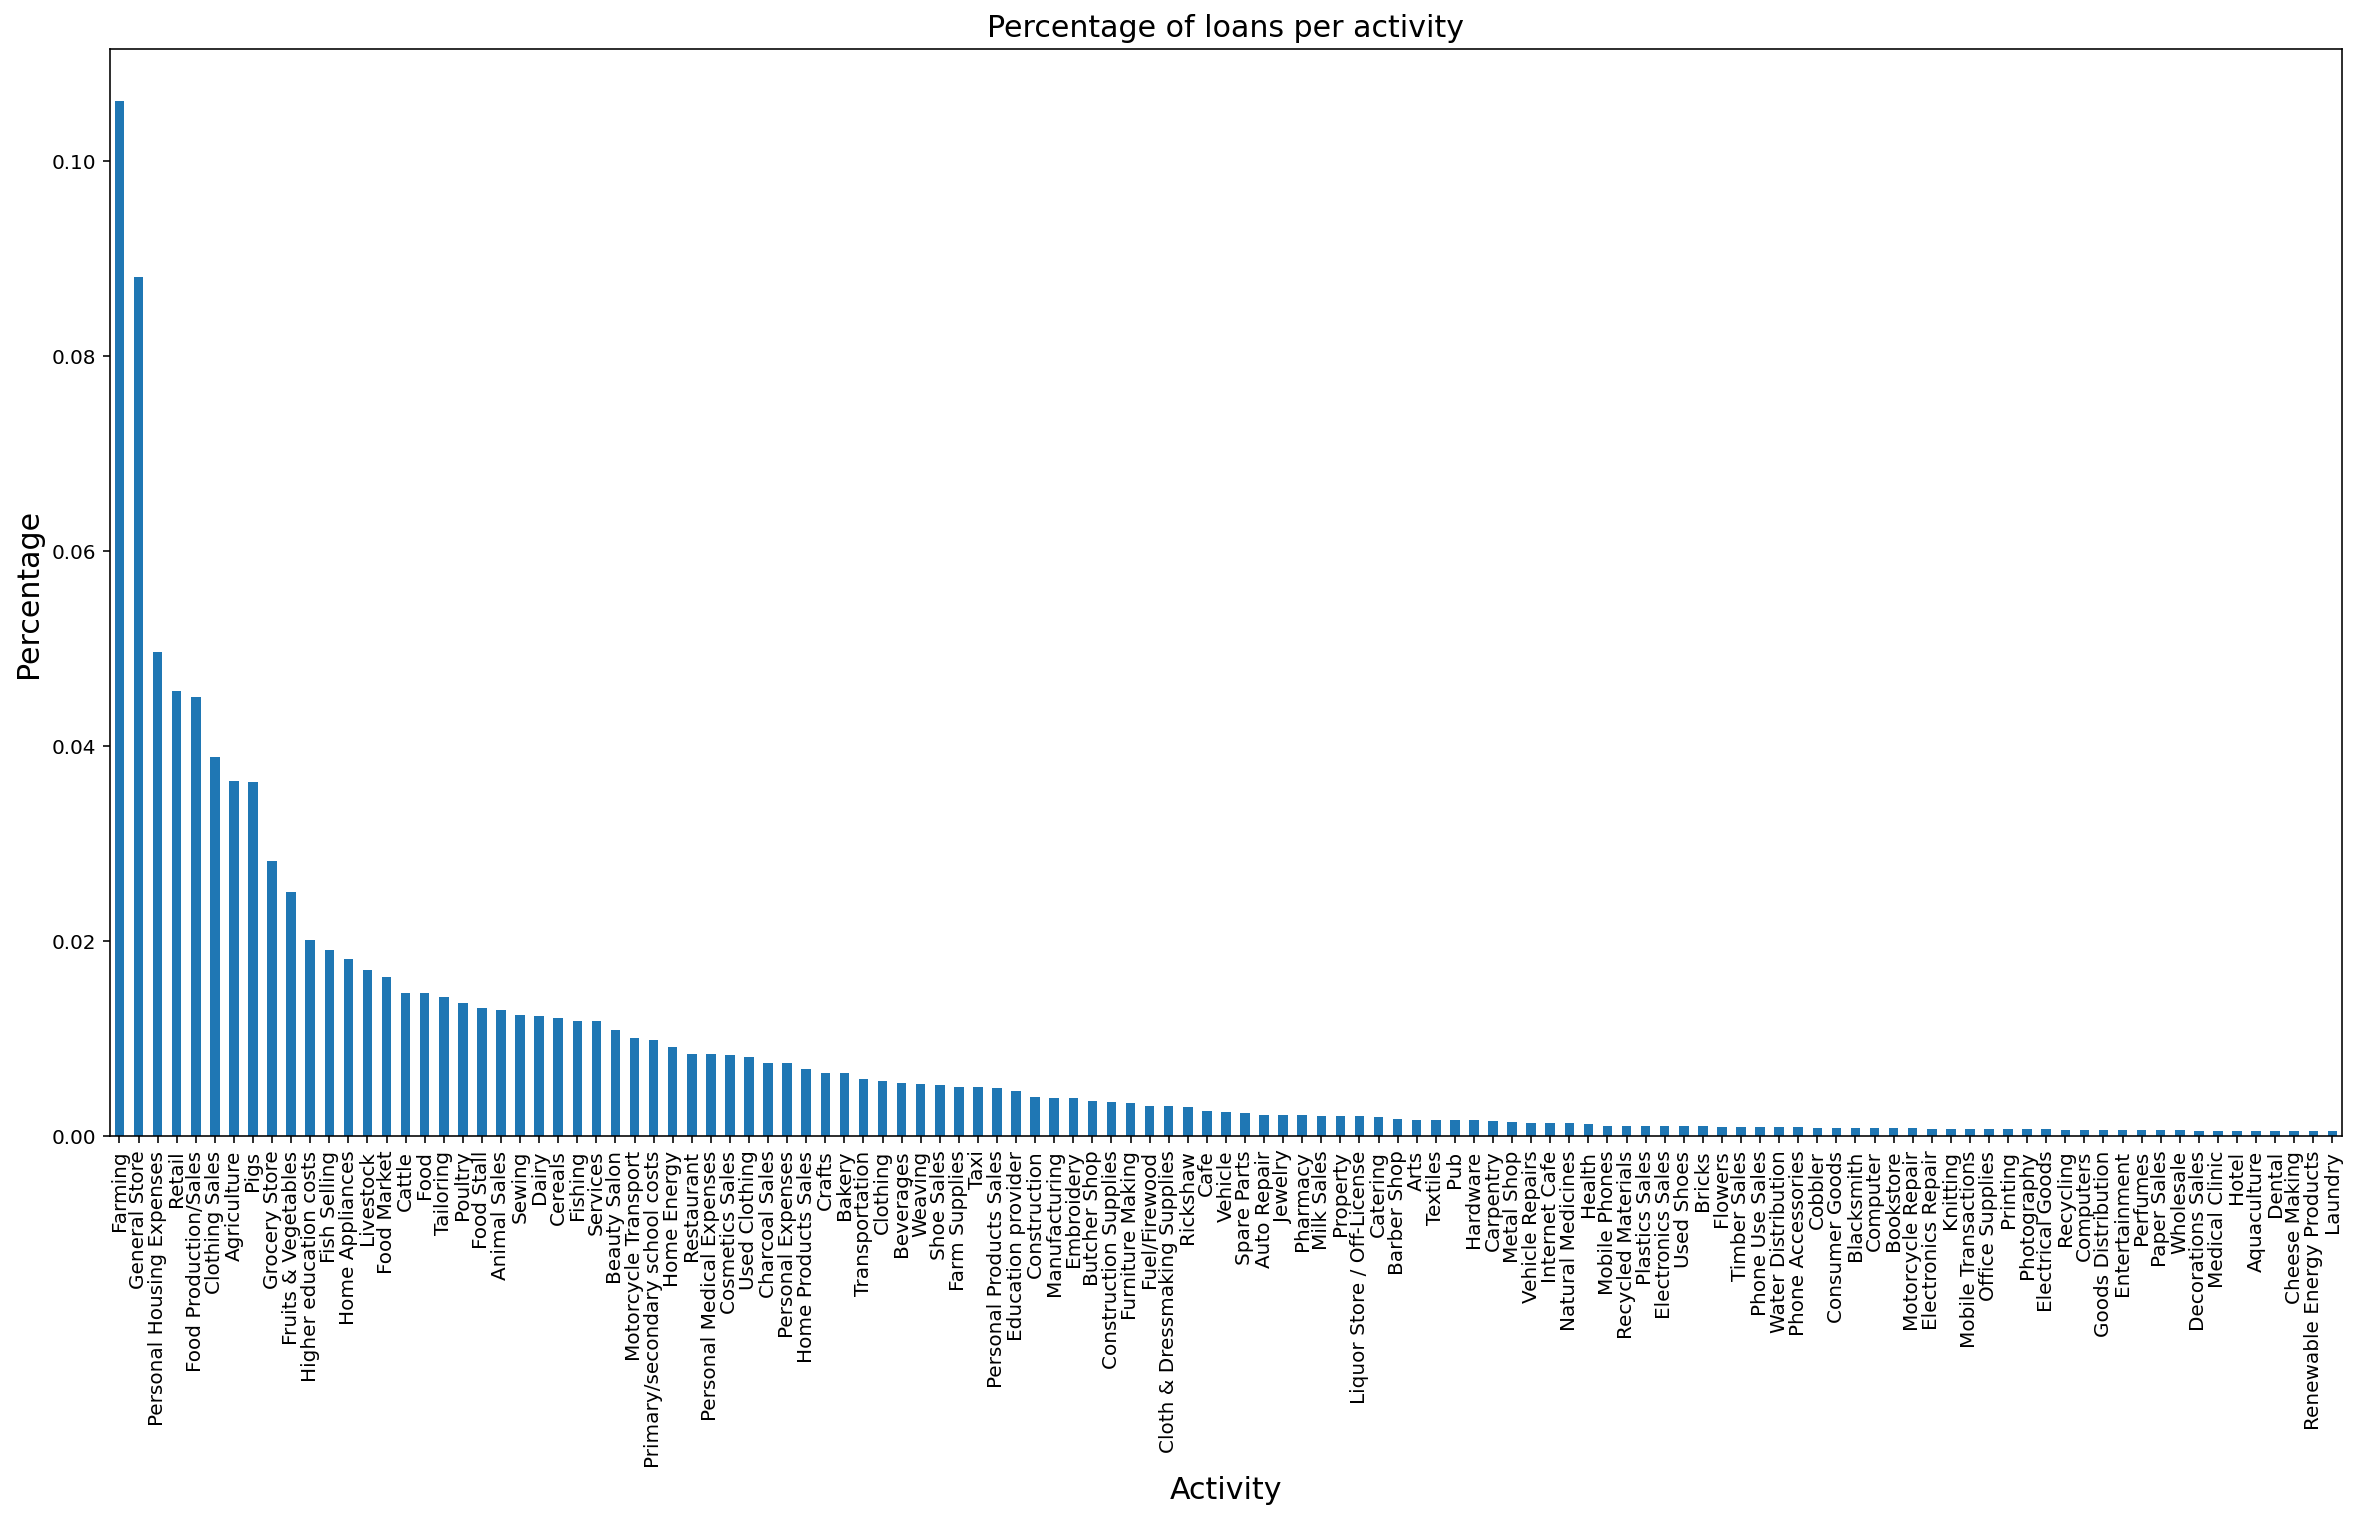

In [21]:
loans.activity_name.value_counts(normalize=True).head(117).plot(kind='bar',figsize=(20,10))
plt.ylabel('Percentage',fontsize=15)
plt.xlabel('Activity',fontsize=15)
plt.title('Percentage of loans per activity',fontsize=15)
plt.show()


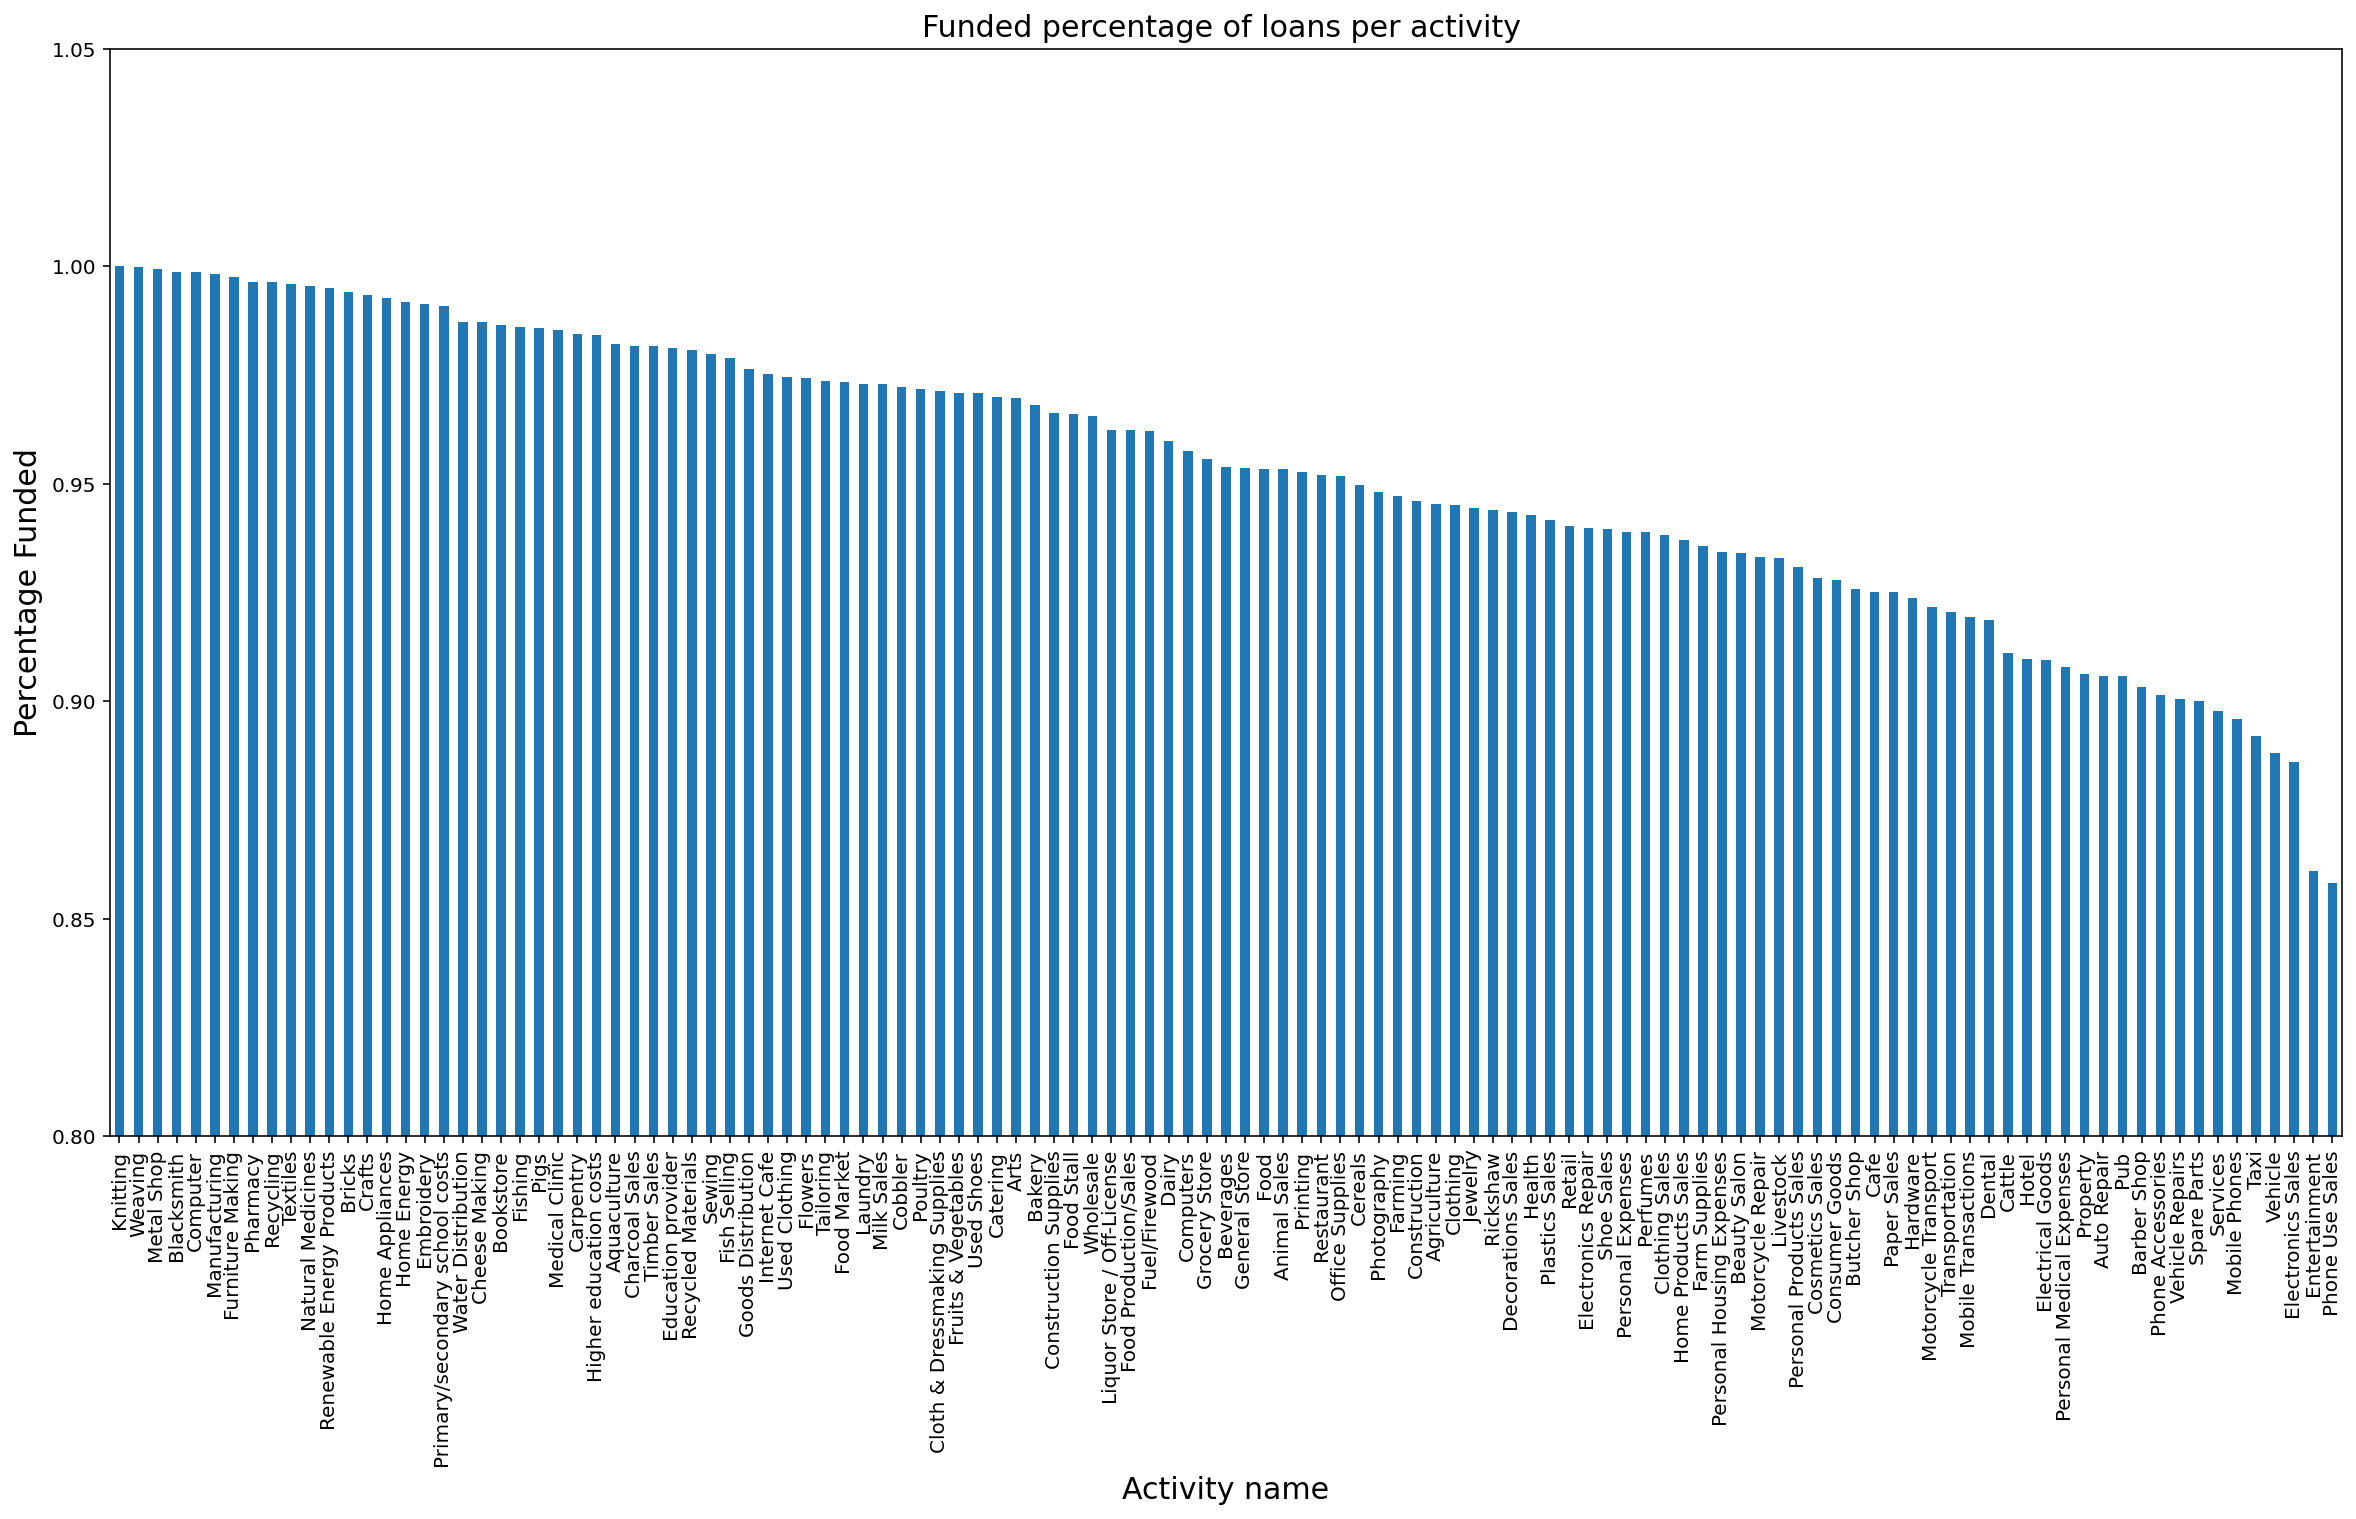

In [22]:
loans.groupby('activity_name')['status'].mean().loc[main_activities.index].sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
plt.ylim(bottom=0.8)
plt.ylabel('Percentage Funded',fontsize=15)
plt.xlabel('Activity name',fontsize=15)
plt.title('Funded percentage of loans per activity ',fontsize=15)
plt.show()

## NUMBER OF BORROWERS

In [23]:
main_borrowers = loans.number_of_borrowers.value_counts().head(25)

Text(0.5, 1.0, 'Percentages of loans per number of borrowers')

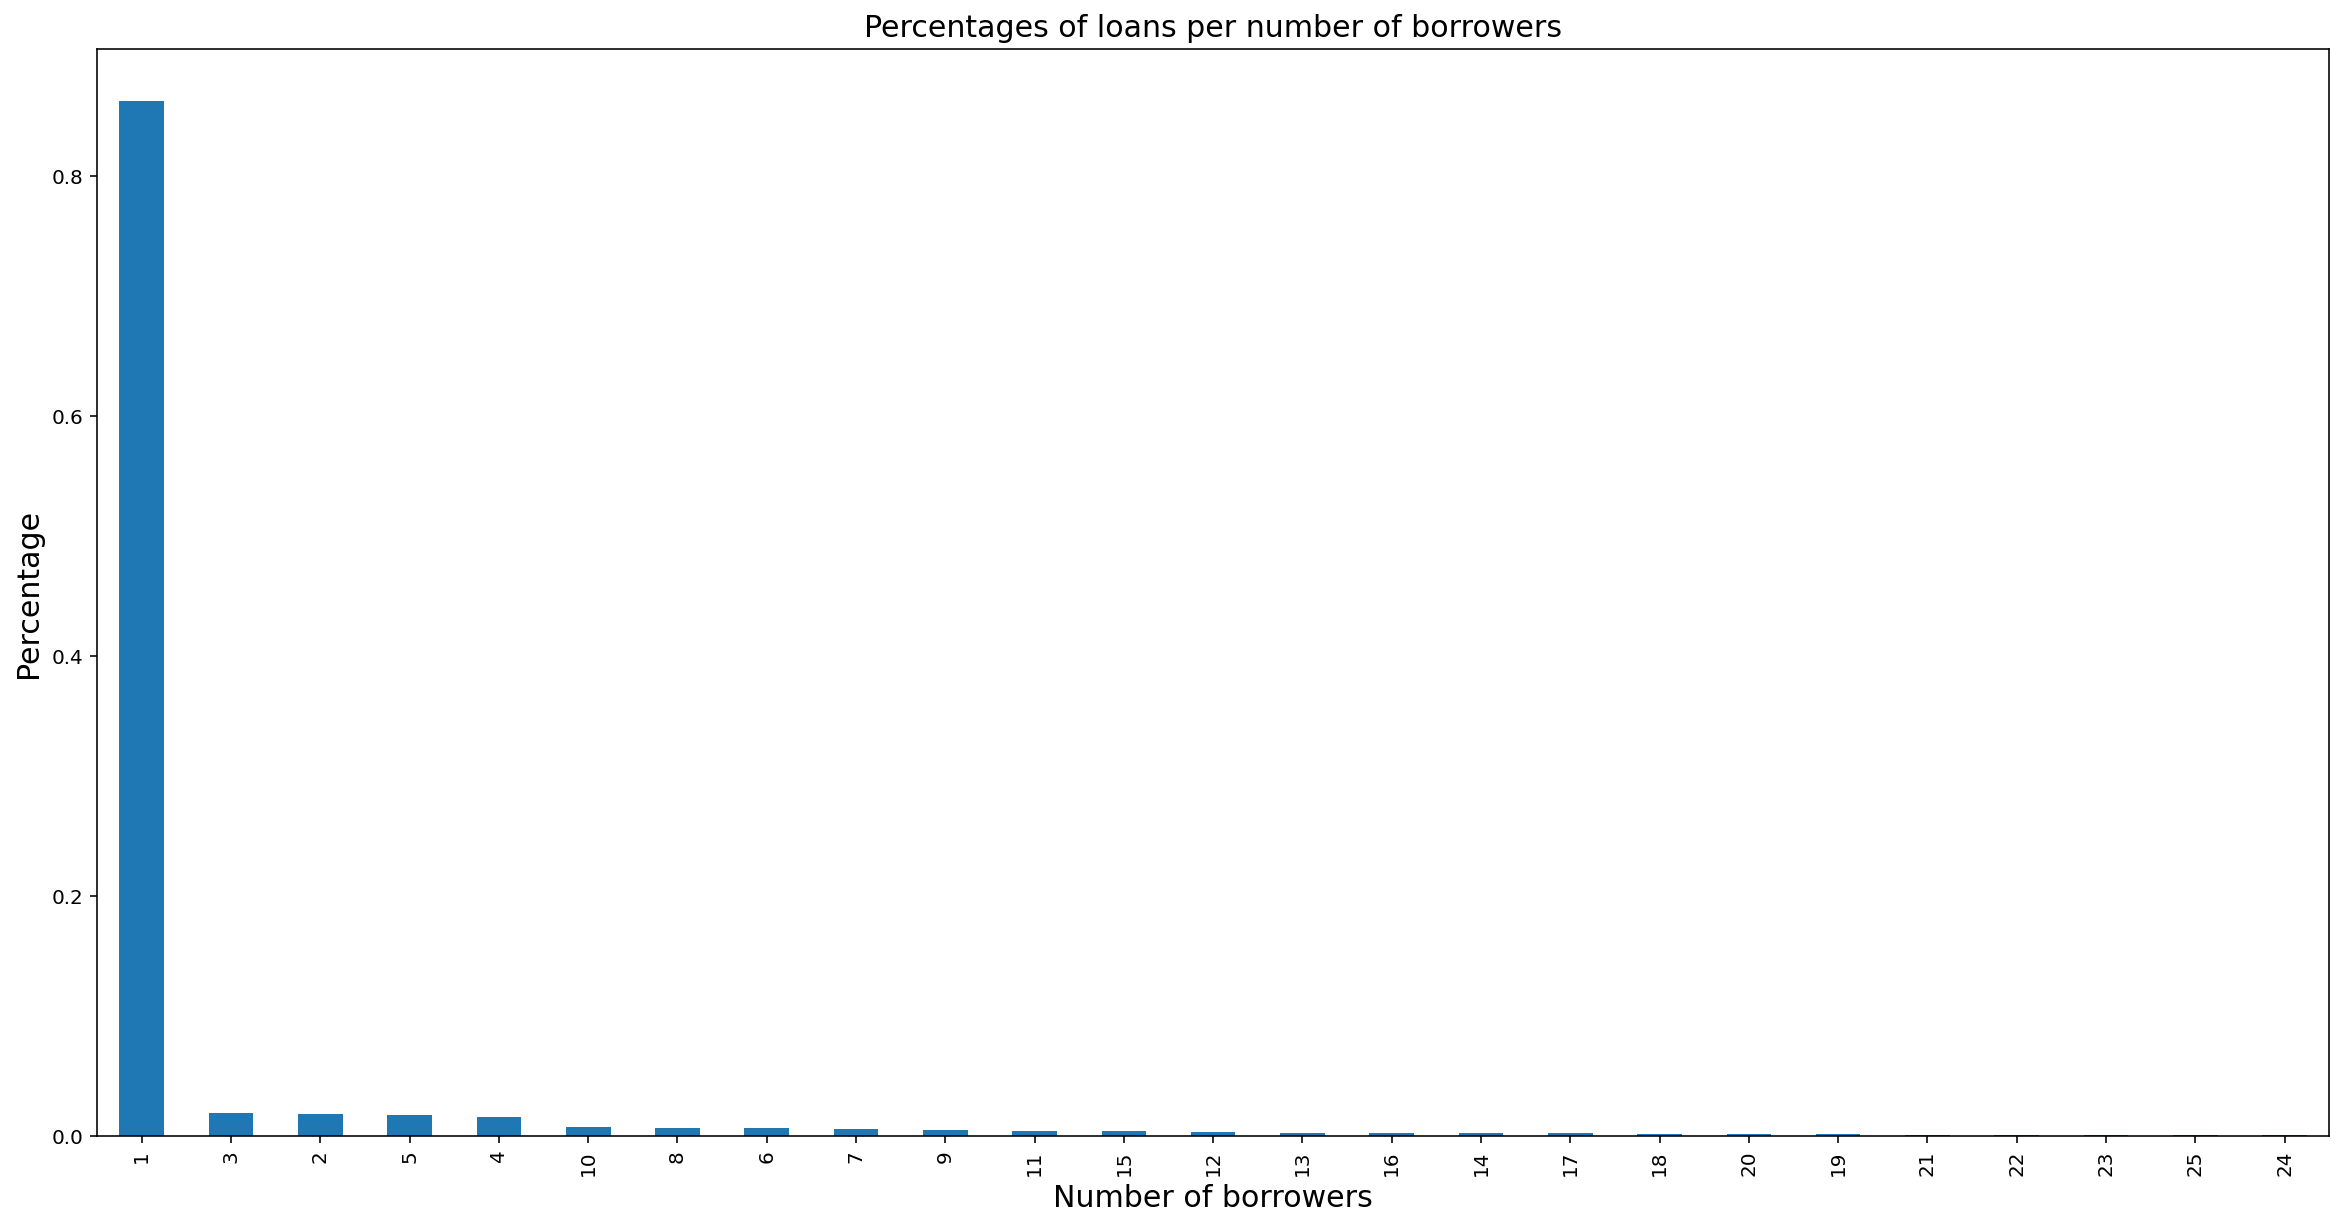

In [24]:
loans.number_of_borrowers.value_counts(normalize=True).head(25).plot(kind='bar',figsize=(20,10))
plt.ylabel('Percentage',fontsize=15)
plt.xlabel('Number of borrowers',fontsize=15)
plt.title('Percentages of loans per number of borrowers',fontsize=15)

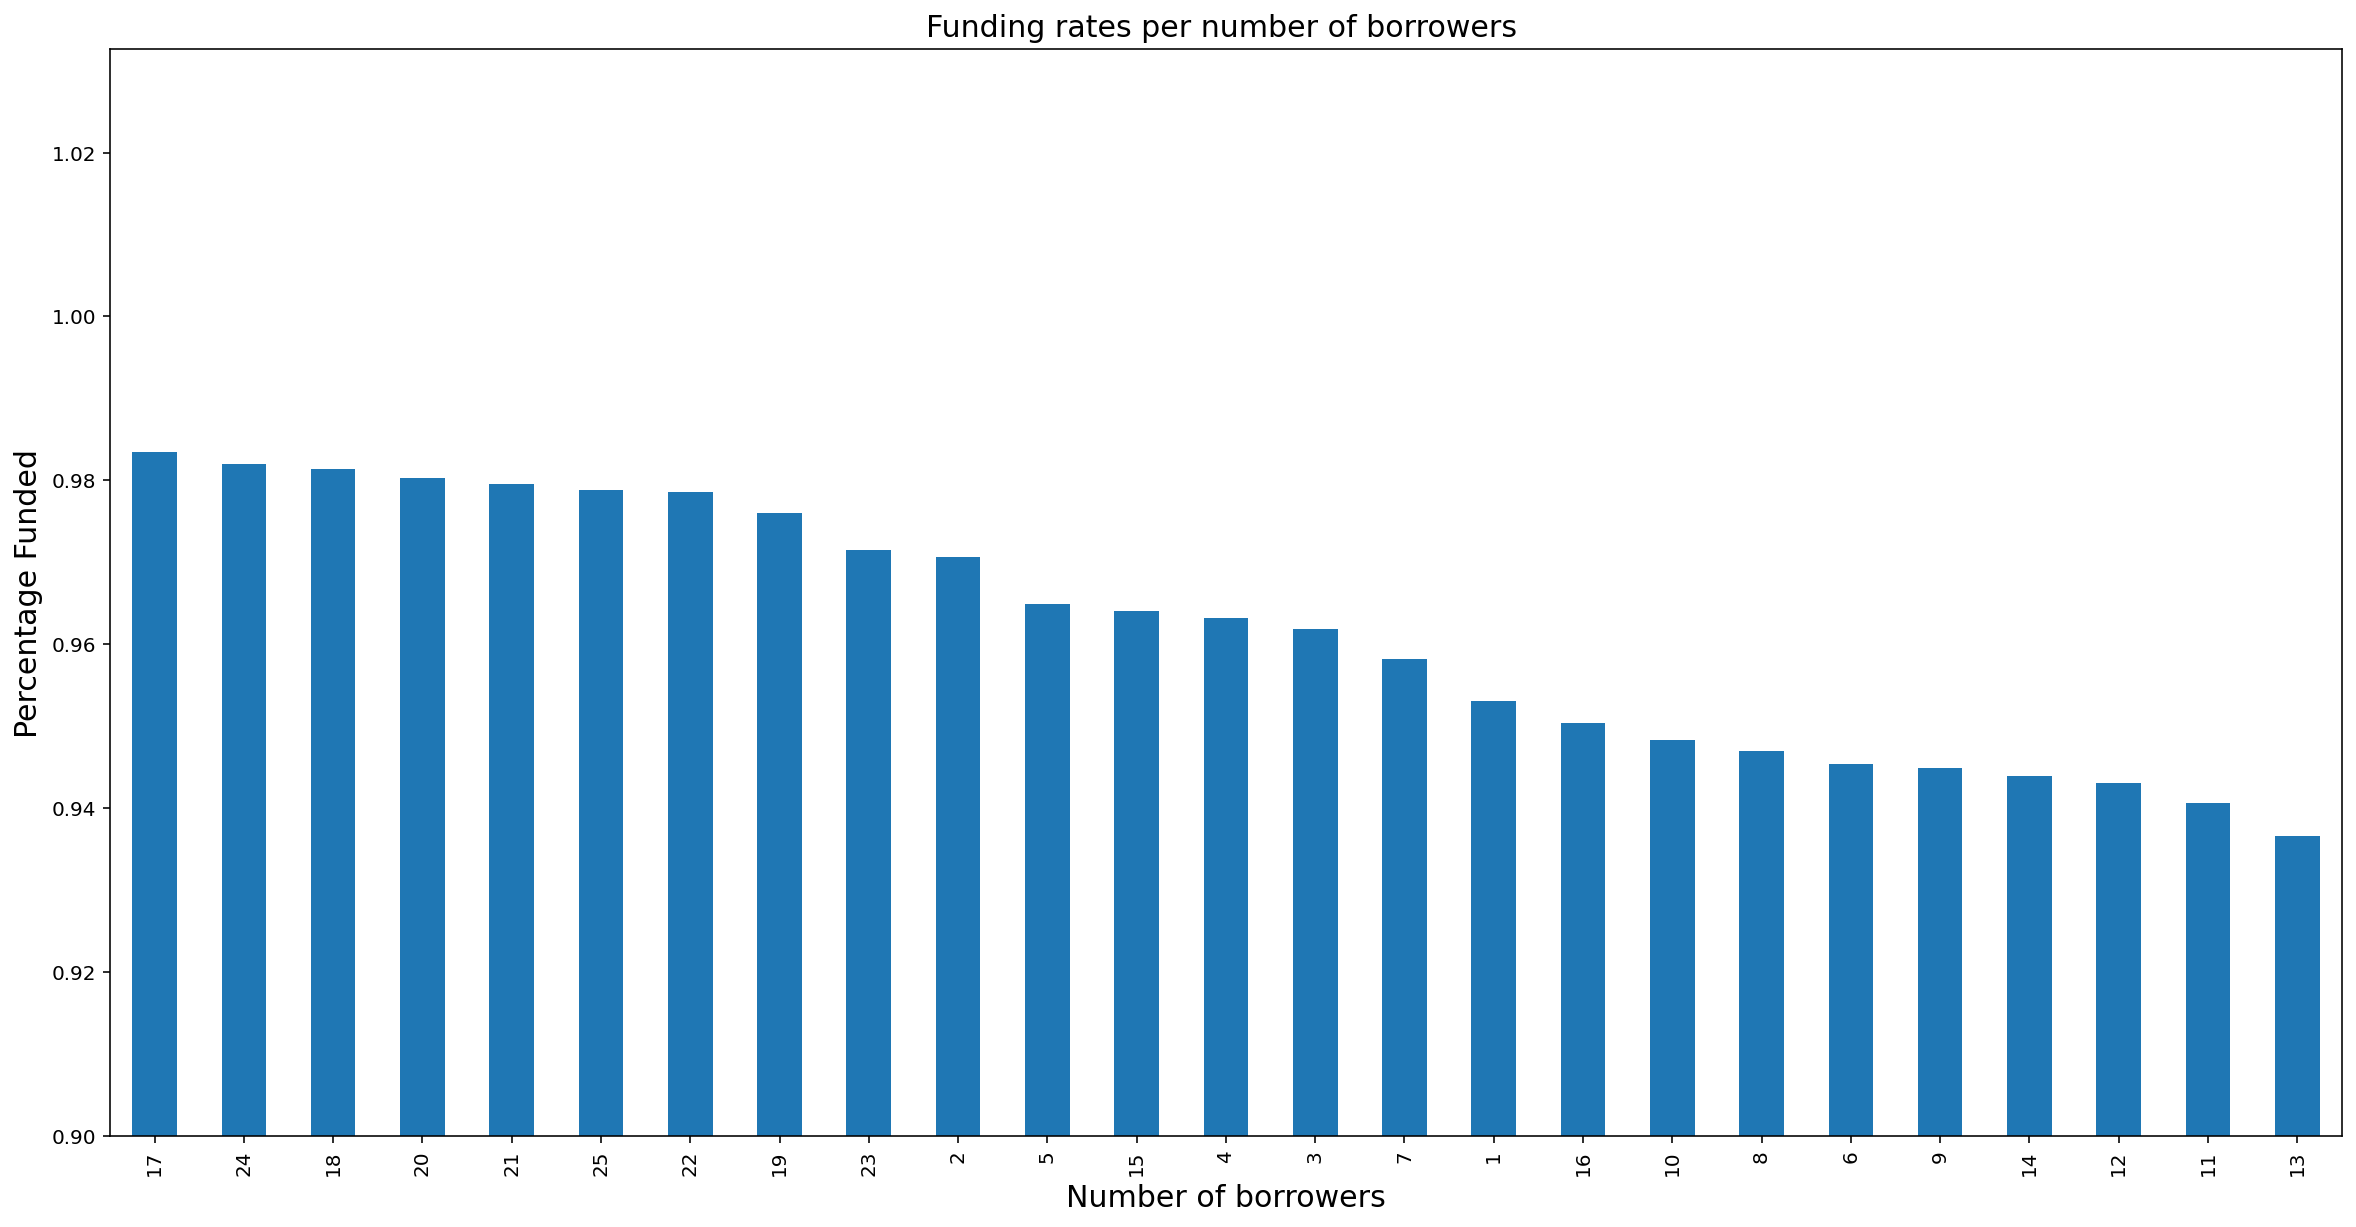

In [25]:
loans.groupby('number_of_borrowers')['status'].mean().loc[main_borrowers.index].sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
plt.ylim(bottom=0.9)
plt.ylabel('Percentage Funded',fontsize=15)
plt.xlabel('Number of borrowers',fontsize=15)
plt.title('Funding rates per number of borrowers ',fontsize=15)
plt.show()

## TIME

### DAY OF THE WEEK

In [26]:
from datetime import timedelta
loans['planned_expiration_time'] = pd.to_datetime(loans['planned_expiration_time'])
loans['posted_time_day_of_the_month'] = loans.index.day
loans['posted_time_day_of_the_week'] = loans.index.weekday
loans['posted_time_month'] = loans.index.month
loans['posted_time_year'] = loans.index.year
loans['expiration_time_day_of_the_month'] = loans.planned_expiration_time.dt.day
loans['expiration_time_day_of_the_week'] = loans.planned_expiration_time.dt.weekday
loans['expiration_time_month'] = loans.planned_expiration_time.dt.month
loans['expiration_time_year'] = loans.planned_expiration_time.dt.year
loans['posted_time_hour'] = loans.index.hour

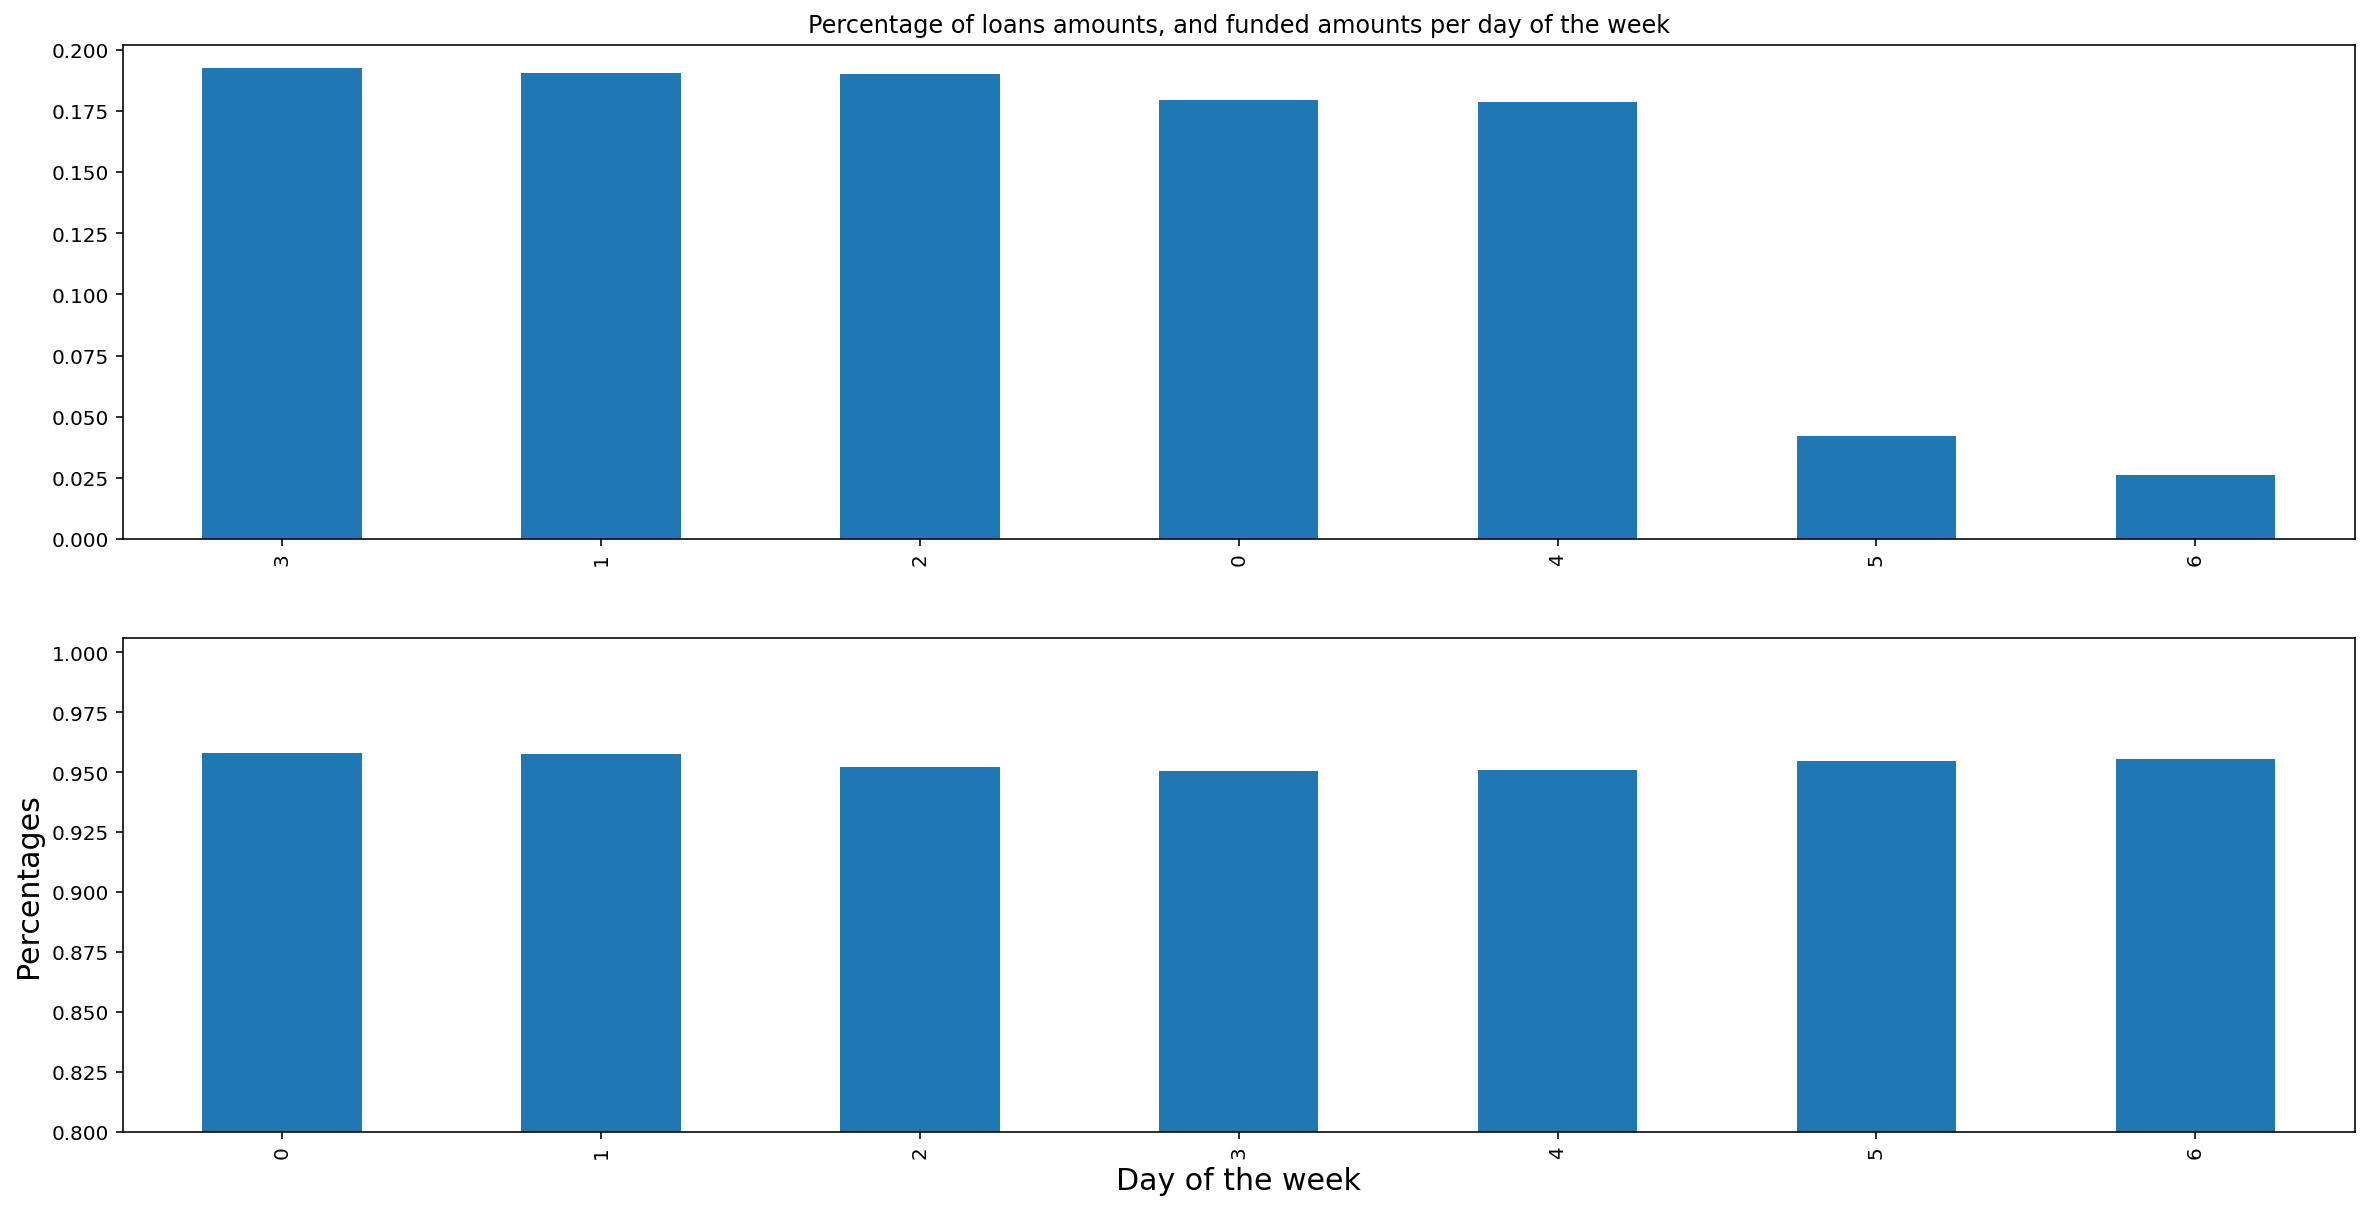

In [27]:
fig,(ax,ax1) = plt.subplots(nrows = 2,figsize=(20,10))
loans.posted_time_day_of_the_week.value_counts(normalize=True).plot(kind='bar',ax=ax)
loans.groupby('posted_time_day_of_the_week').status.mean().plot(kind='bar',ax=ax1)
ax1.set_ylabel('Percentages',fontsize=15,axes=ax1)
ax1.set_ylim(0.8)
ax1.set_xlabel('Day of the week',fontsize=15)
ax.set_title('Percentage of loans amounts, and funded amounts per day of the week')
plt.show()

### DAY OF THE MONTH

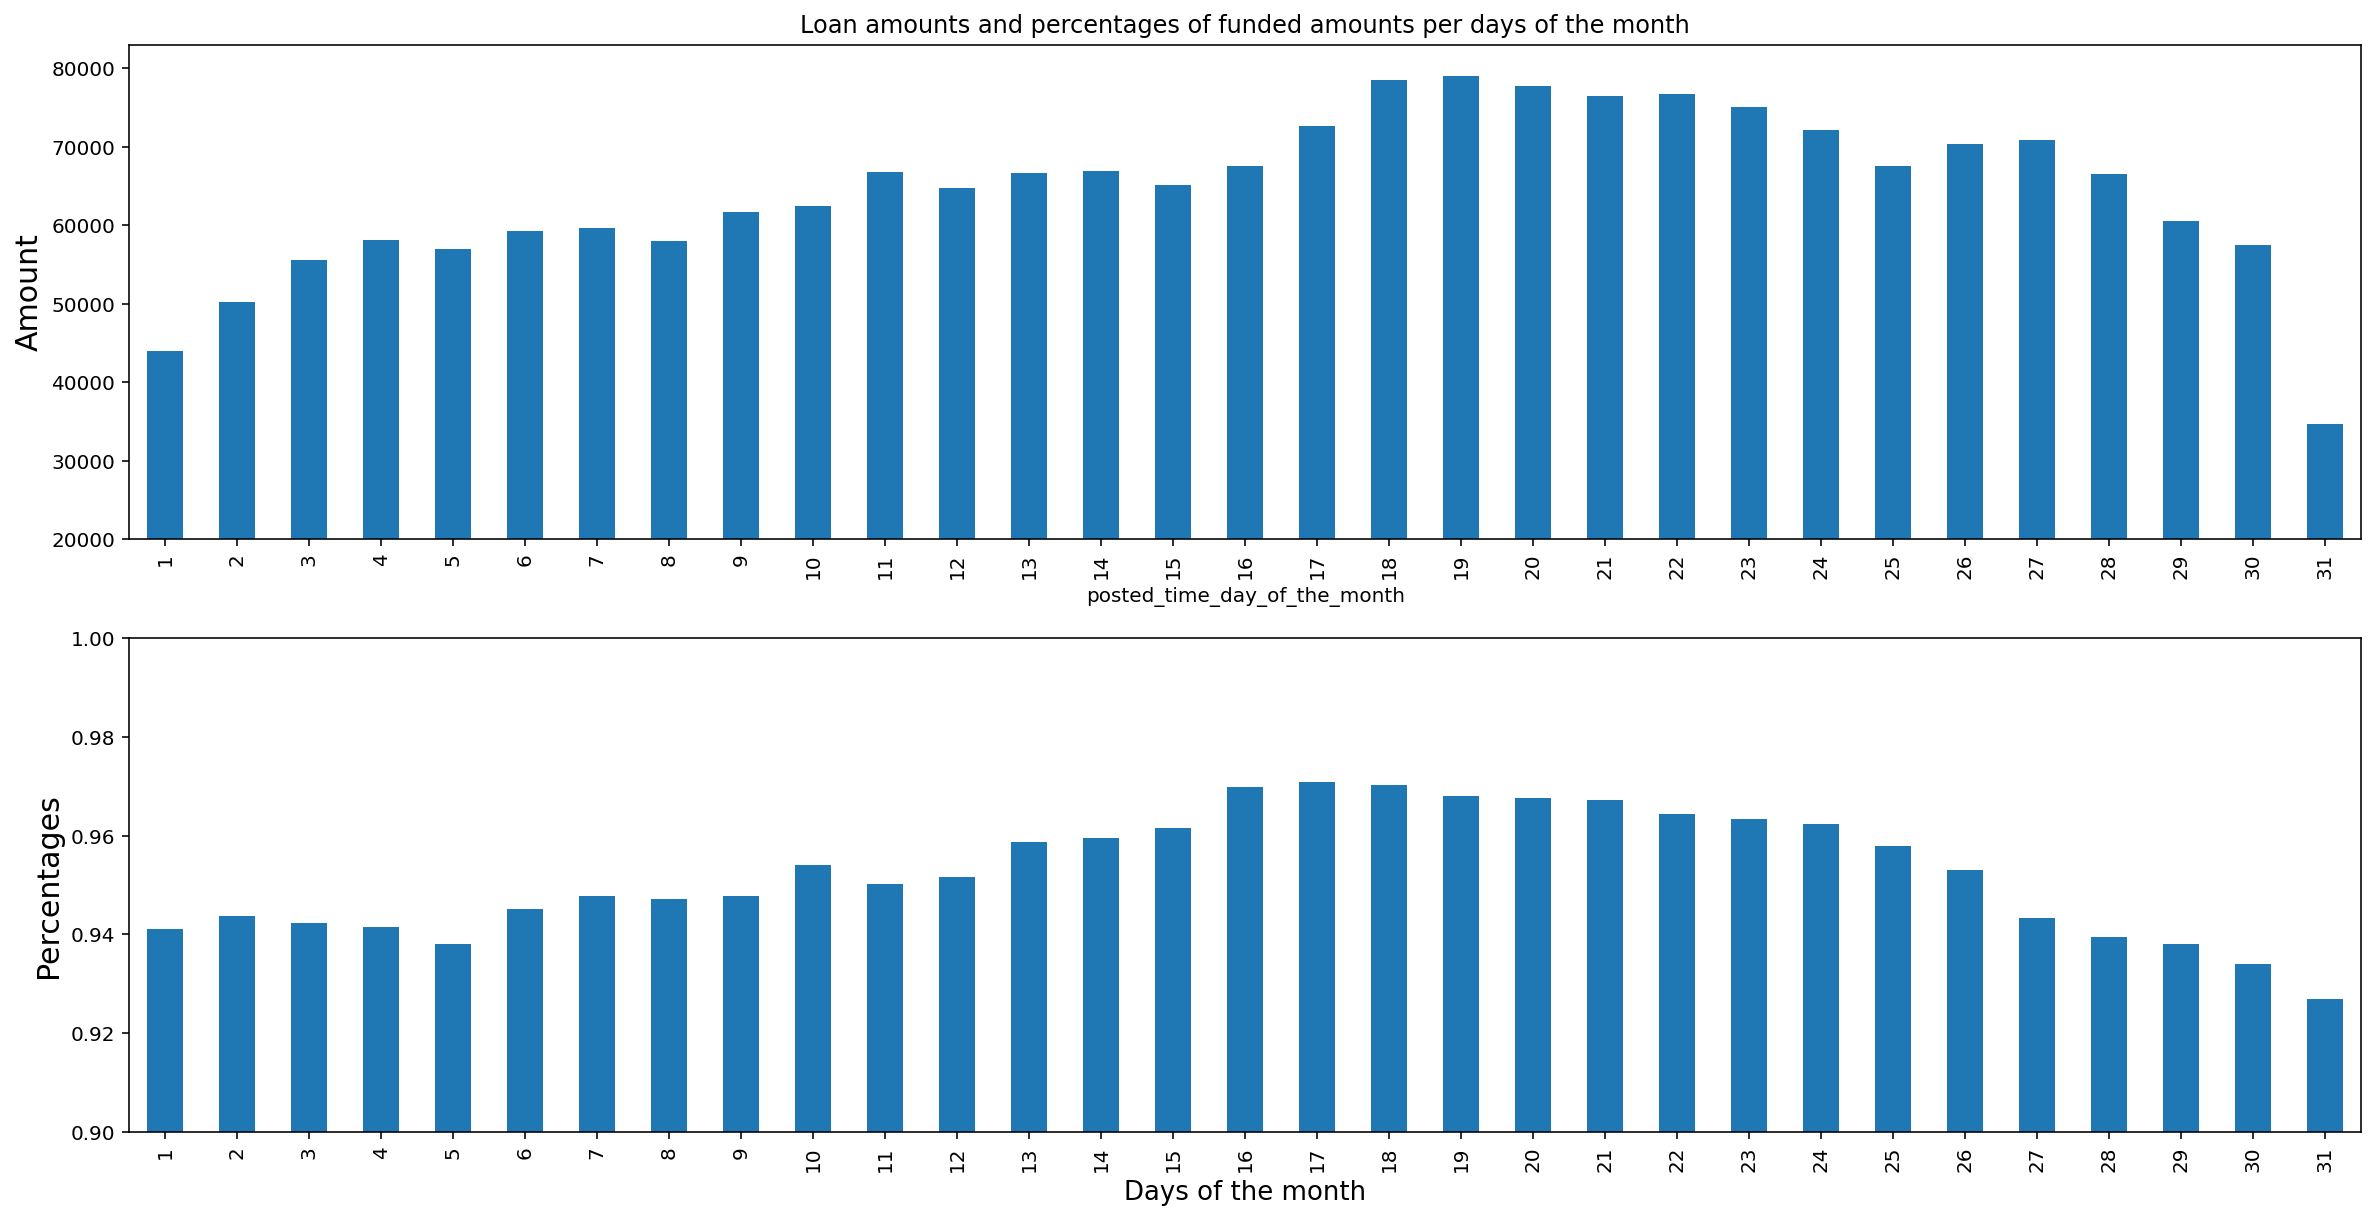

In [28]:
fig,(ax,ax1) = plt.subplots(nrows = 2,figsize=(20,10))
loans.groupby('posted_time_day_of_the_month').status.count().plot(kind='bar',ax=ax)
loans.groupby('posted_time_day_of_the_month').status.mean().plot(kind='bar',ax=ax1)
ax1.set_ylabel('Percentages',fontsize=15,axes=ax1)
ax.set_ylabel('Amount',fontsize=15,axes=ax1)
ax1.set_ylim(0.9,1)
ax.set_ylim(20000)
ax1.set_xlabel('Days of the month',fontsize=13)
ax.set_title('Loan amounts and percentages of funded amounts per days of the month')
plt.show()

### MONTH

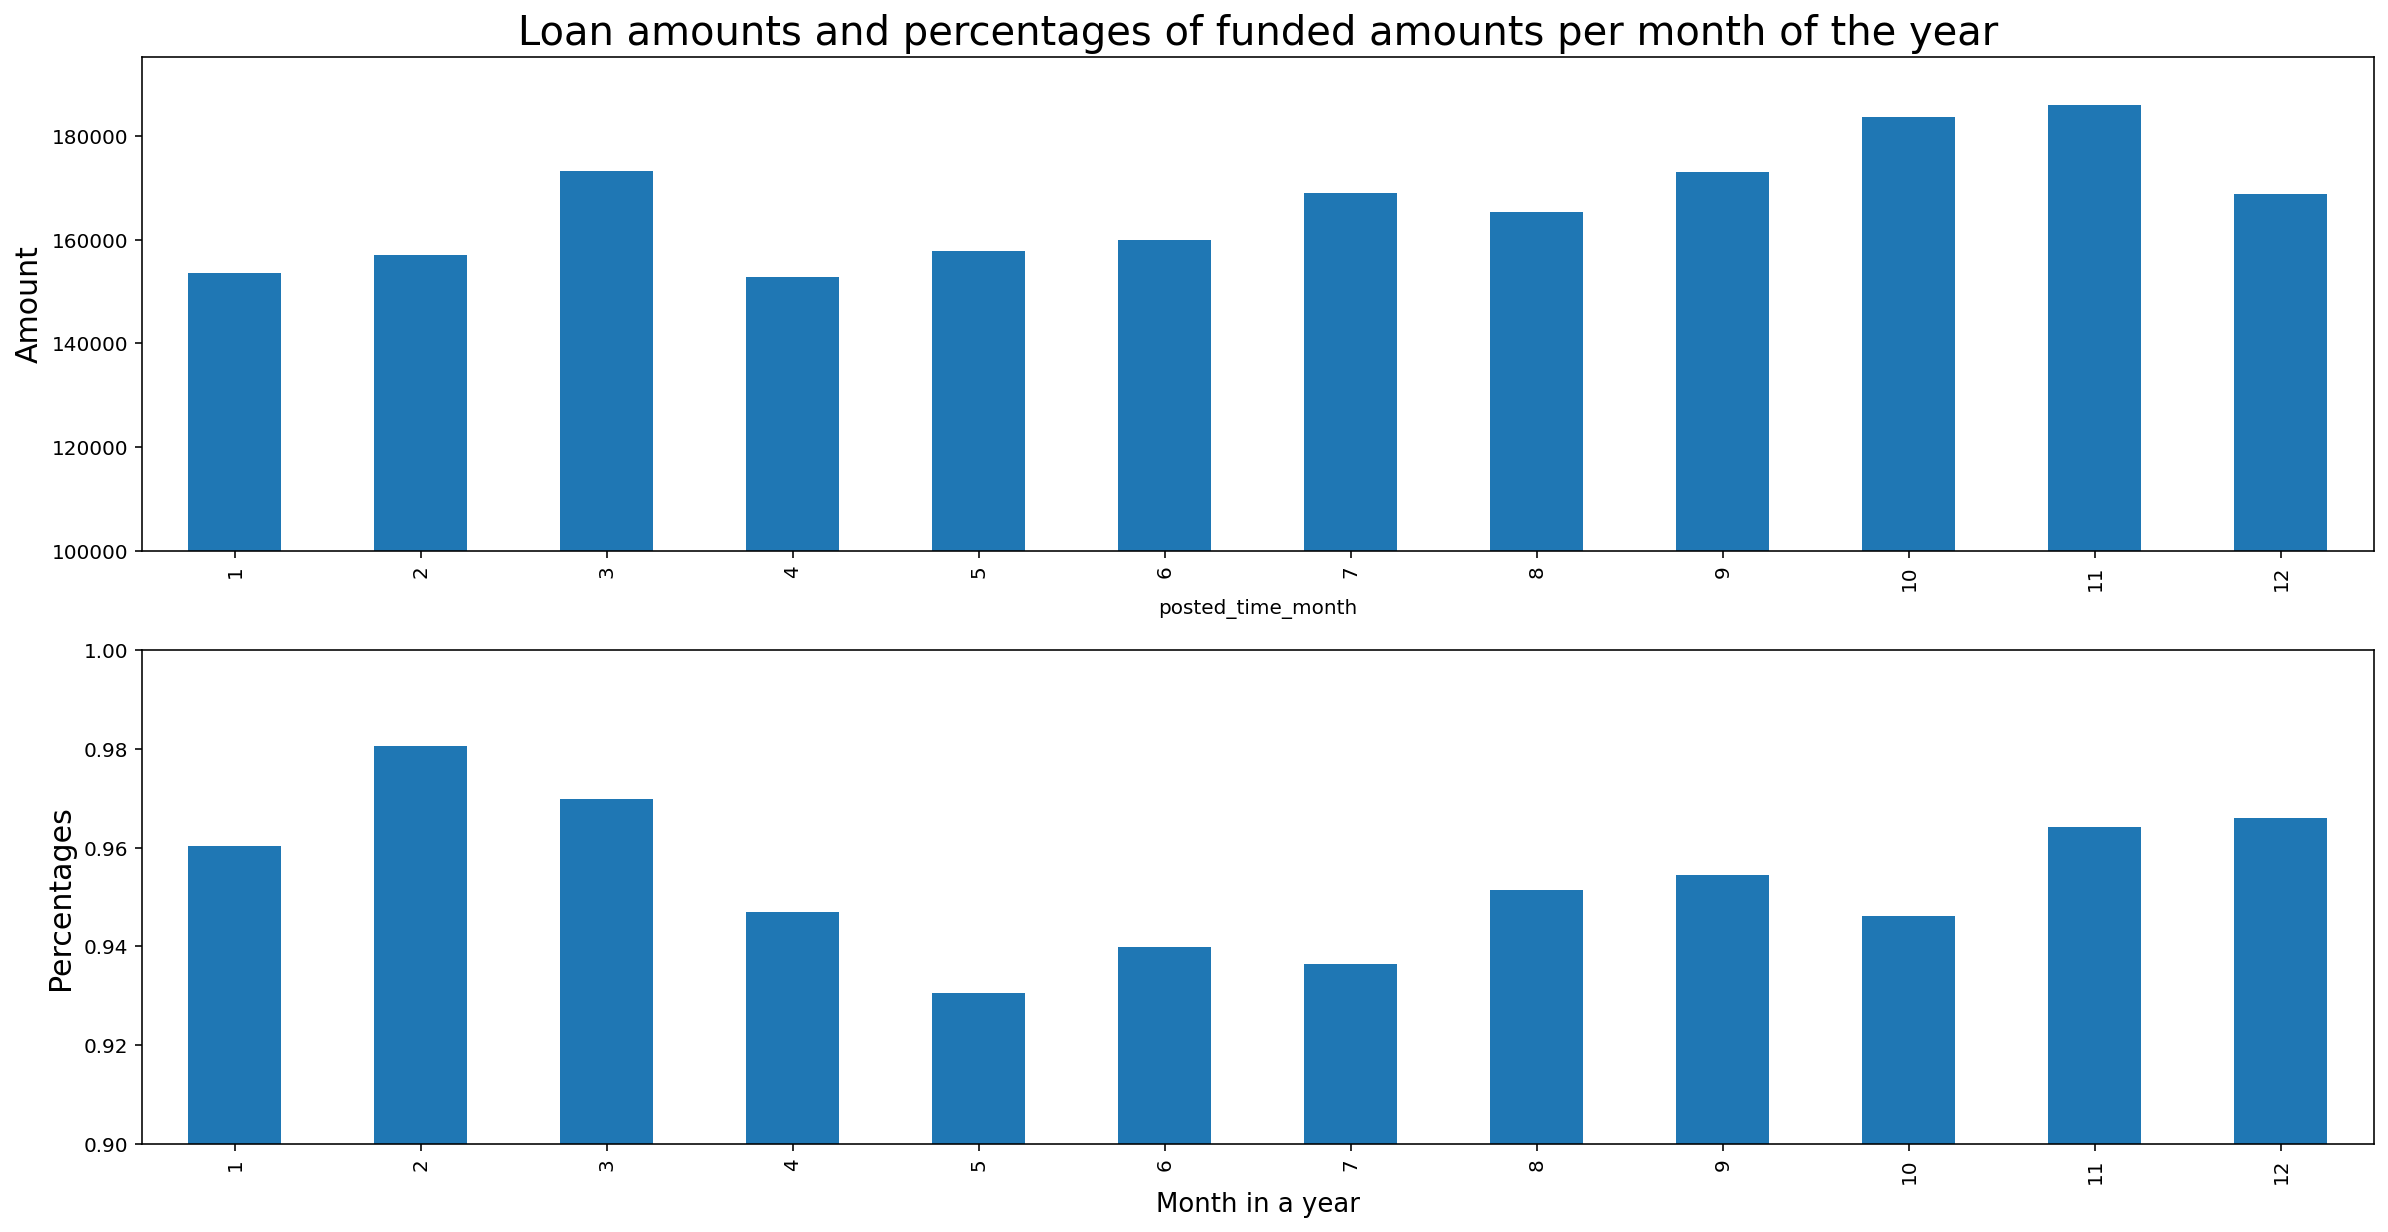

In [29]:
fig,(ax,ax1) = plt.subplots(nrows = 2, figsize=(20,10))
loans.groupby('posted_time_month').status.count().plot(kind='bar',ax=ax)
loans.groupby('posted_time_month').status.mean().plot(kind='bar',ax=ax1)
ax1.set_ylabel('Percentages',fontsize=15,axes=ax1)
ax.set_ylabel('Amount',fontsize=15,axes=ax1)
ax1.set_ylim(0.9,1)
ax.set_ylim(100000)
ax1.set_xlabel('Month in a year',fontsize=13)
ax.set_title('Loan amounts and percentages of funded amounts per month of the year',fontsize=20)
plt.show()

## YEAR

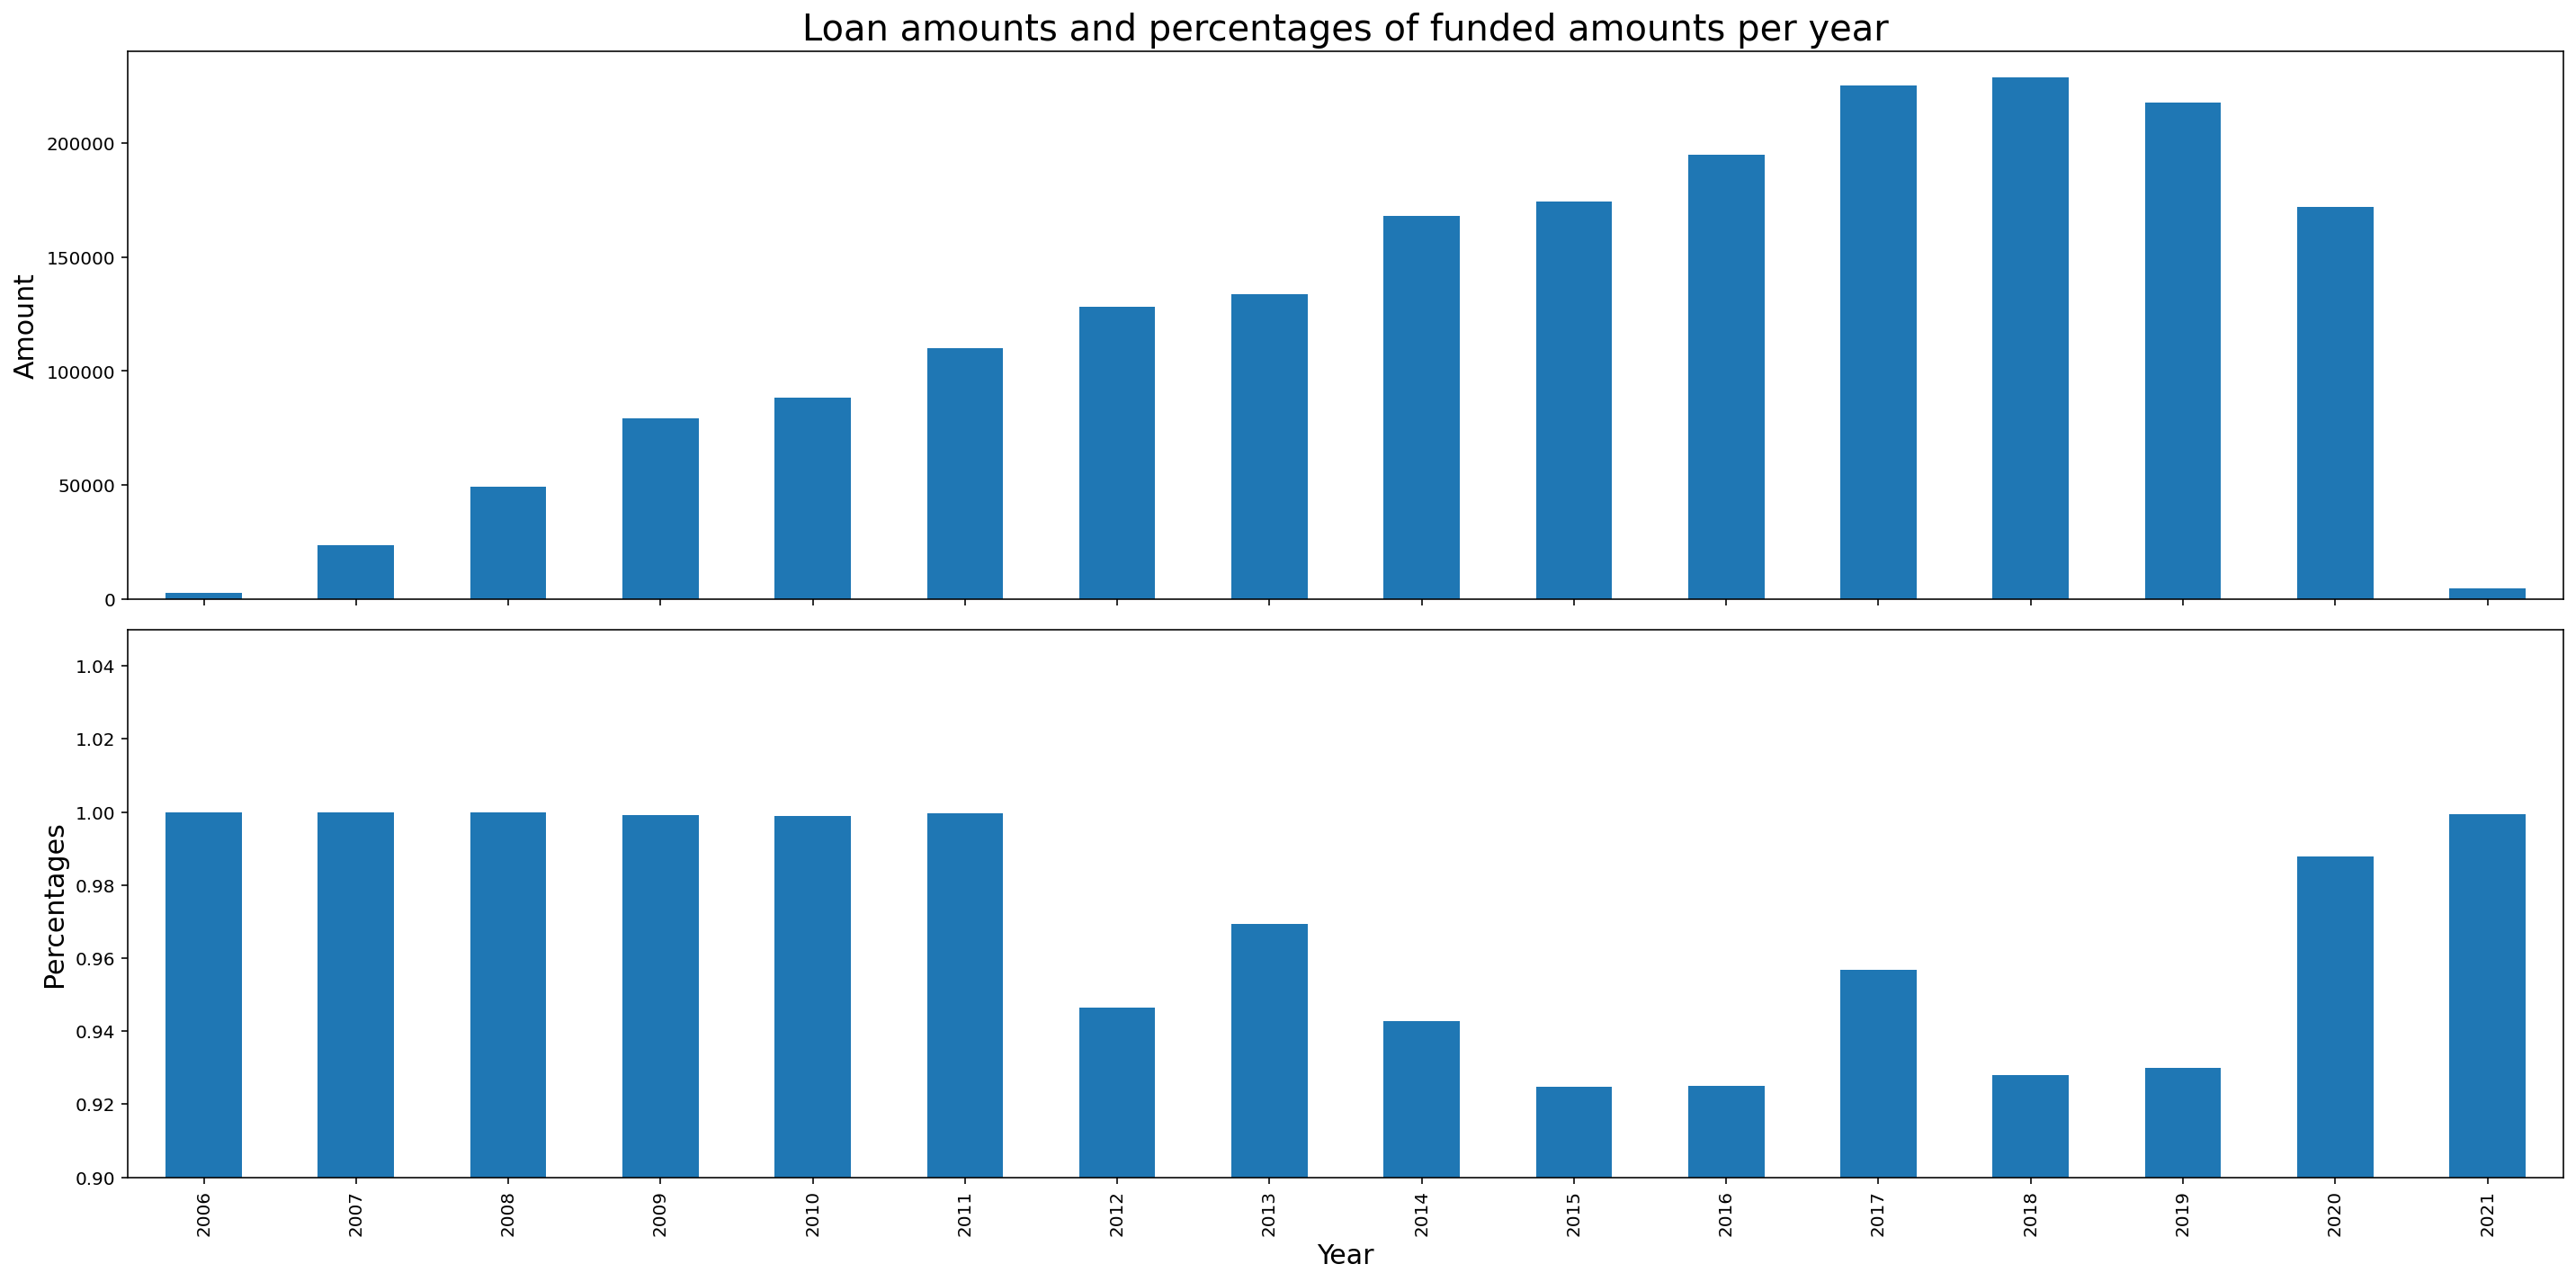

In [30]:
fig,(ax,ax1) = plt.subplots(nrows = 2,figsize=(20,10))
loans.groupby('posted_time_year').status.count().plot(kind='bar',ax=ax)
loans.groupby('posted_time_year').status.mean().plot(kind='bar',ax=ax1)
ax1.set_ylabel('Percentages',fontsize=15,axes=ax1)
ax.set_ylabel('Amount',fontsize=15,axes=ax1)
ax1.set_ylim(0.9)
ax1.set_xlabel('Year',fontsize=15)
ax.set_xticklabels(labels= '')
ax.set_xlabel('',fontsize=15)
ax.set_title('Loan amounts and percentages of funded amounts per year',fontsize=20)
plt.tight_layout()
plt.show()

### CAMPAIGN DURATION

In [31]:
main_days = loans.days_of_campaign_duration.value_counts().head(50)

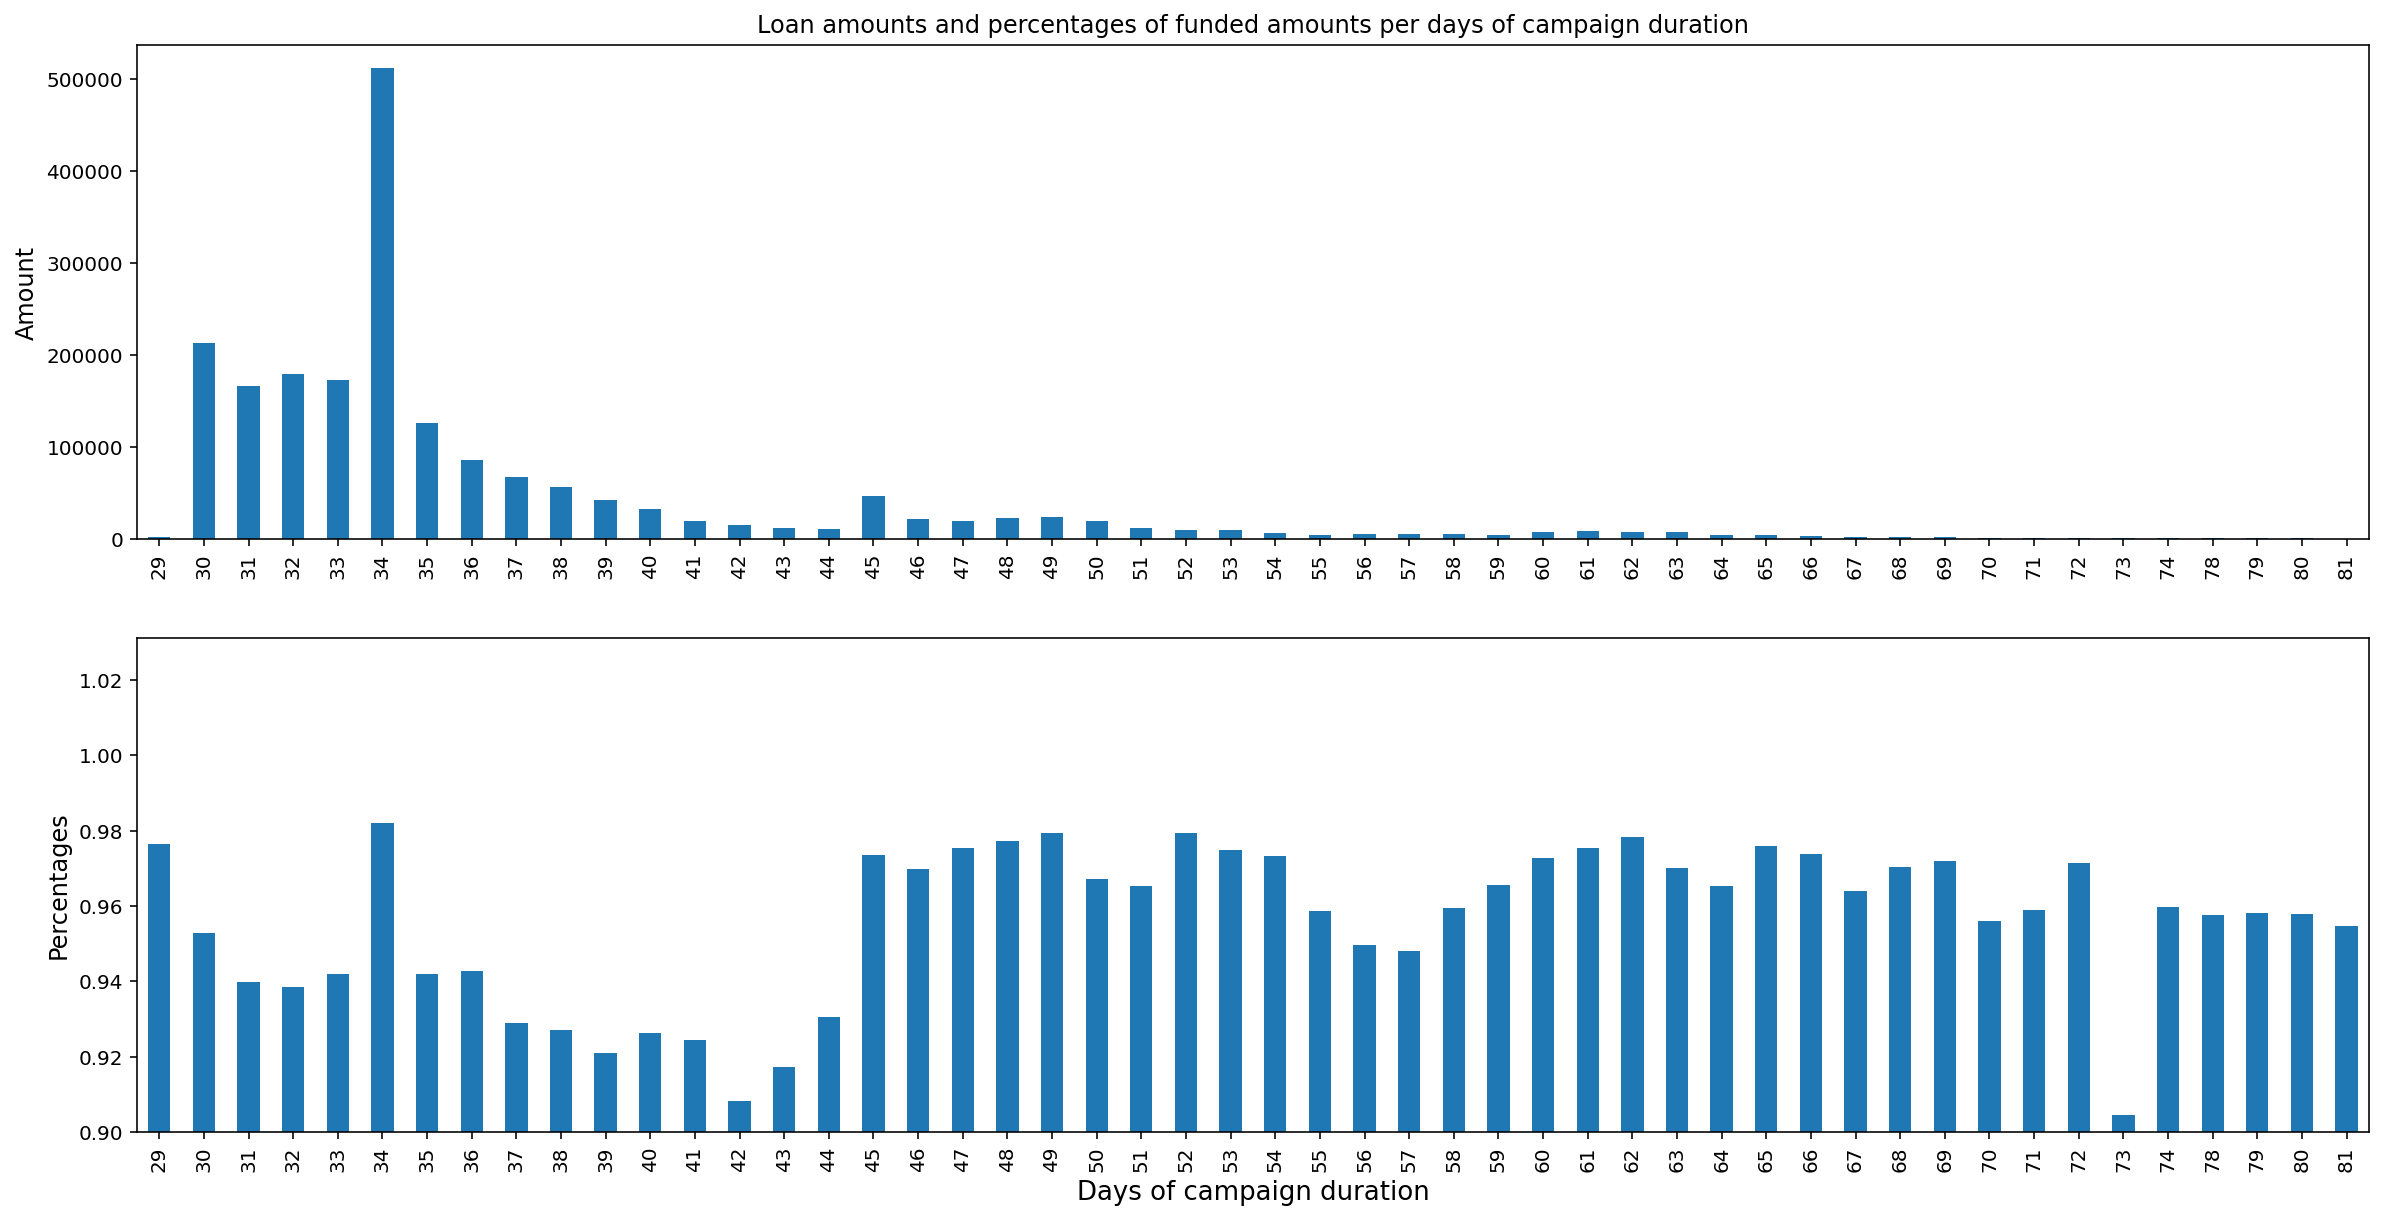

In [32]:
fig,(ax,ax1) = plt.subplots(nrows = 2,figsize=(20,10))
loans.groupby('days_of_campaign_duration').status.count().loc[main_days.index.sort_values()].plot(kind='bar',ax=ax)
loans.groupby('days_of_campaign_duration').status.mean().loc[main_days.index.sort_values()].plot(kind='bar',ax=ax1)
ax1.set_ylabel('Percentages',fontsize=12,axes=ax1)
ax.set_ylabel('Amount',fontsize=12,axes=ax1)
ax1.set_ylim(0.9)
ax1.set_xlabel('Days of campaign duration',fontsize=13)
ax.set_title('Loan amounts and percentages of funded amounts per days of campaign duration')
plt.show()

## GEOGRAPHY

### COUNTRIES

In [33]:
main_countries = loans.country_name.value_counts().head(70)

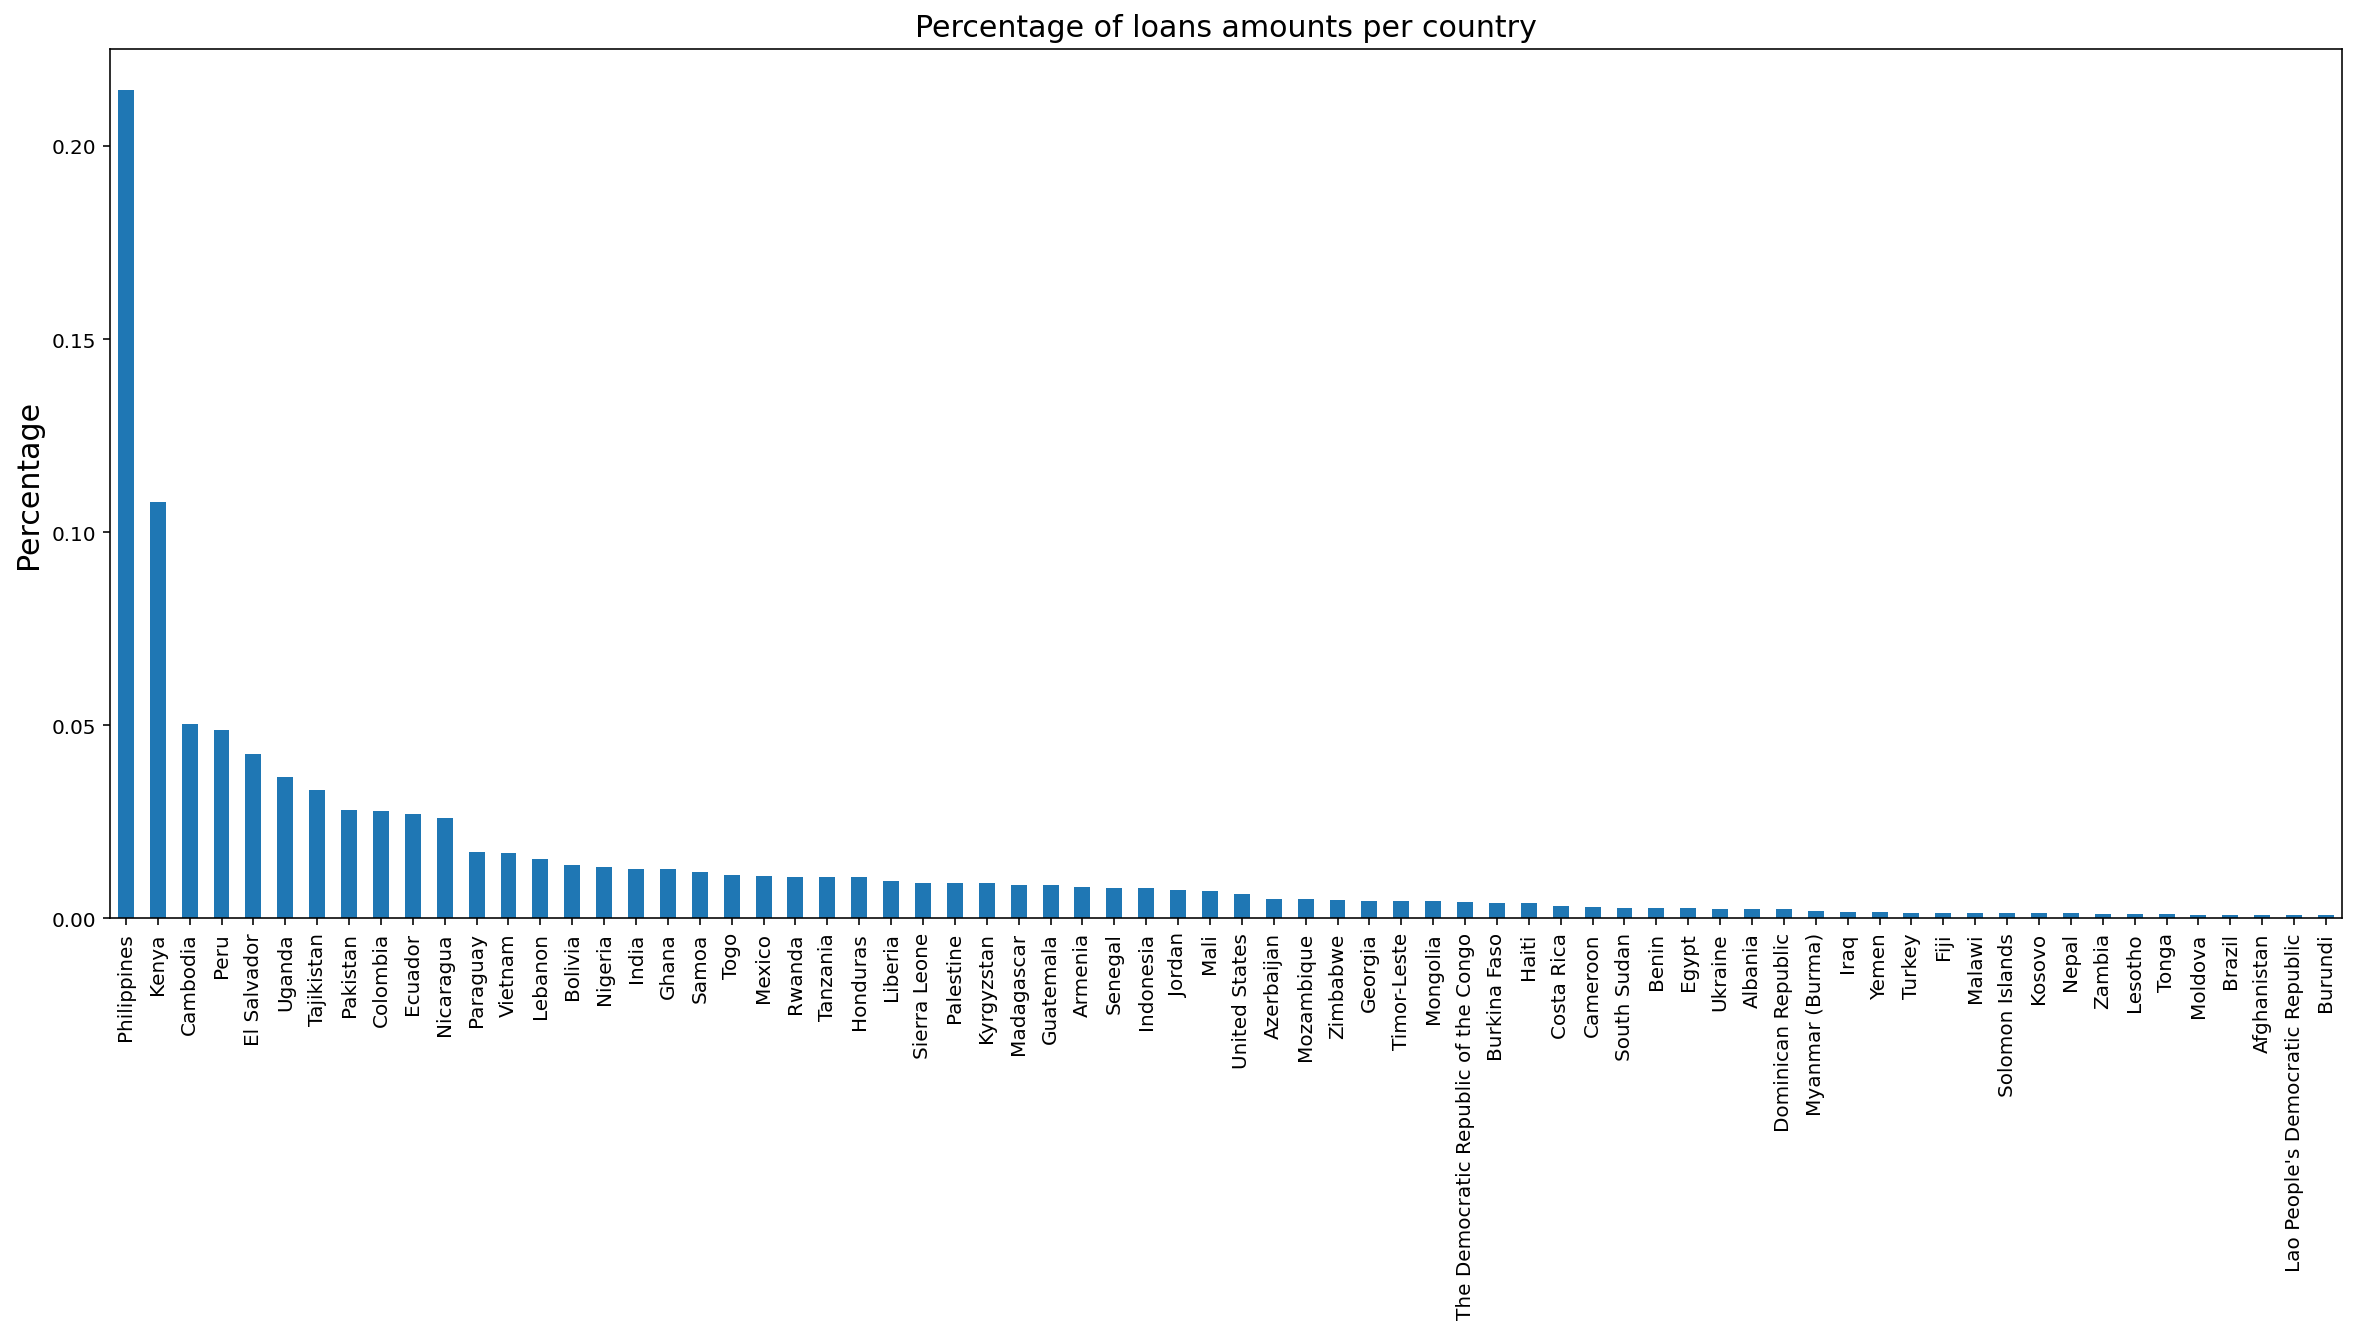

In [34]:
loans.country_name.value_counts(normalize=True).head(70).sort_values(ascending=False).plot(kind='bar',figsize=(20,8))
plt.ylabel('Percentage',fontsize=15)
plt.xlabel('',fontsize=15)
plt.title('Percentage of loans amounts per country',fontsize=15)
plt.show()
plt.show()

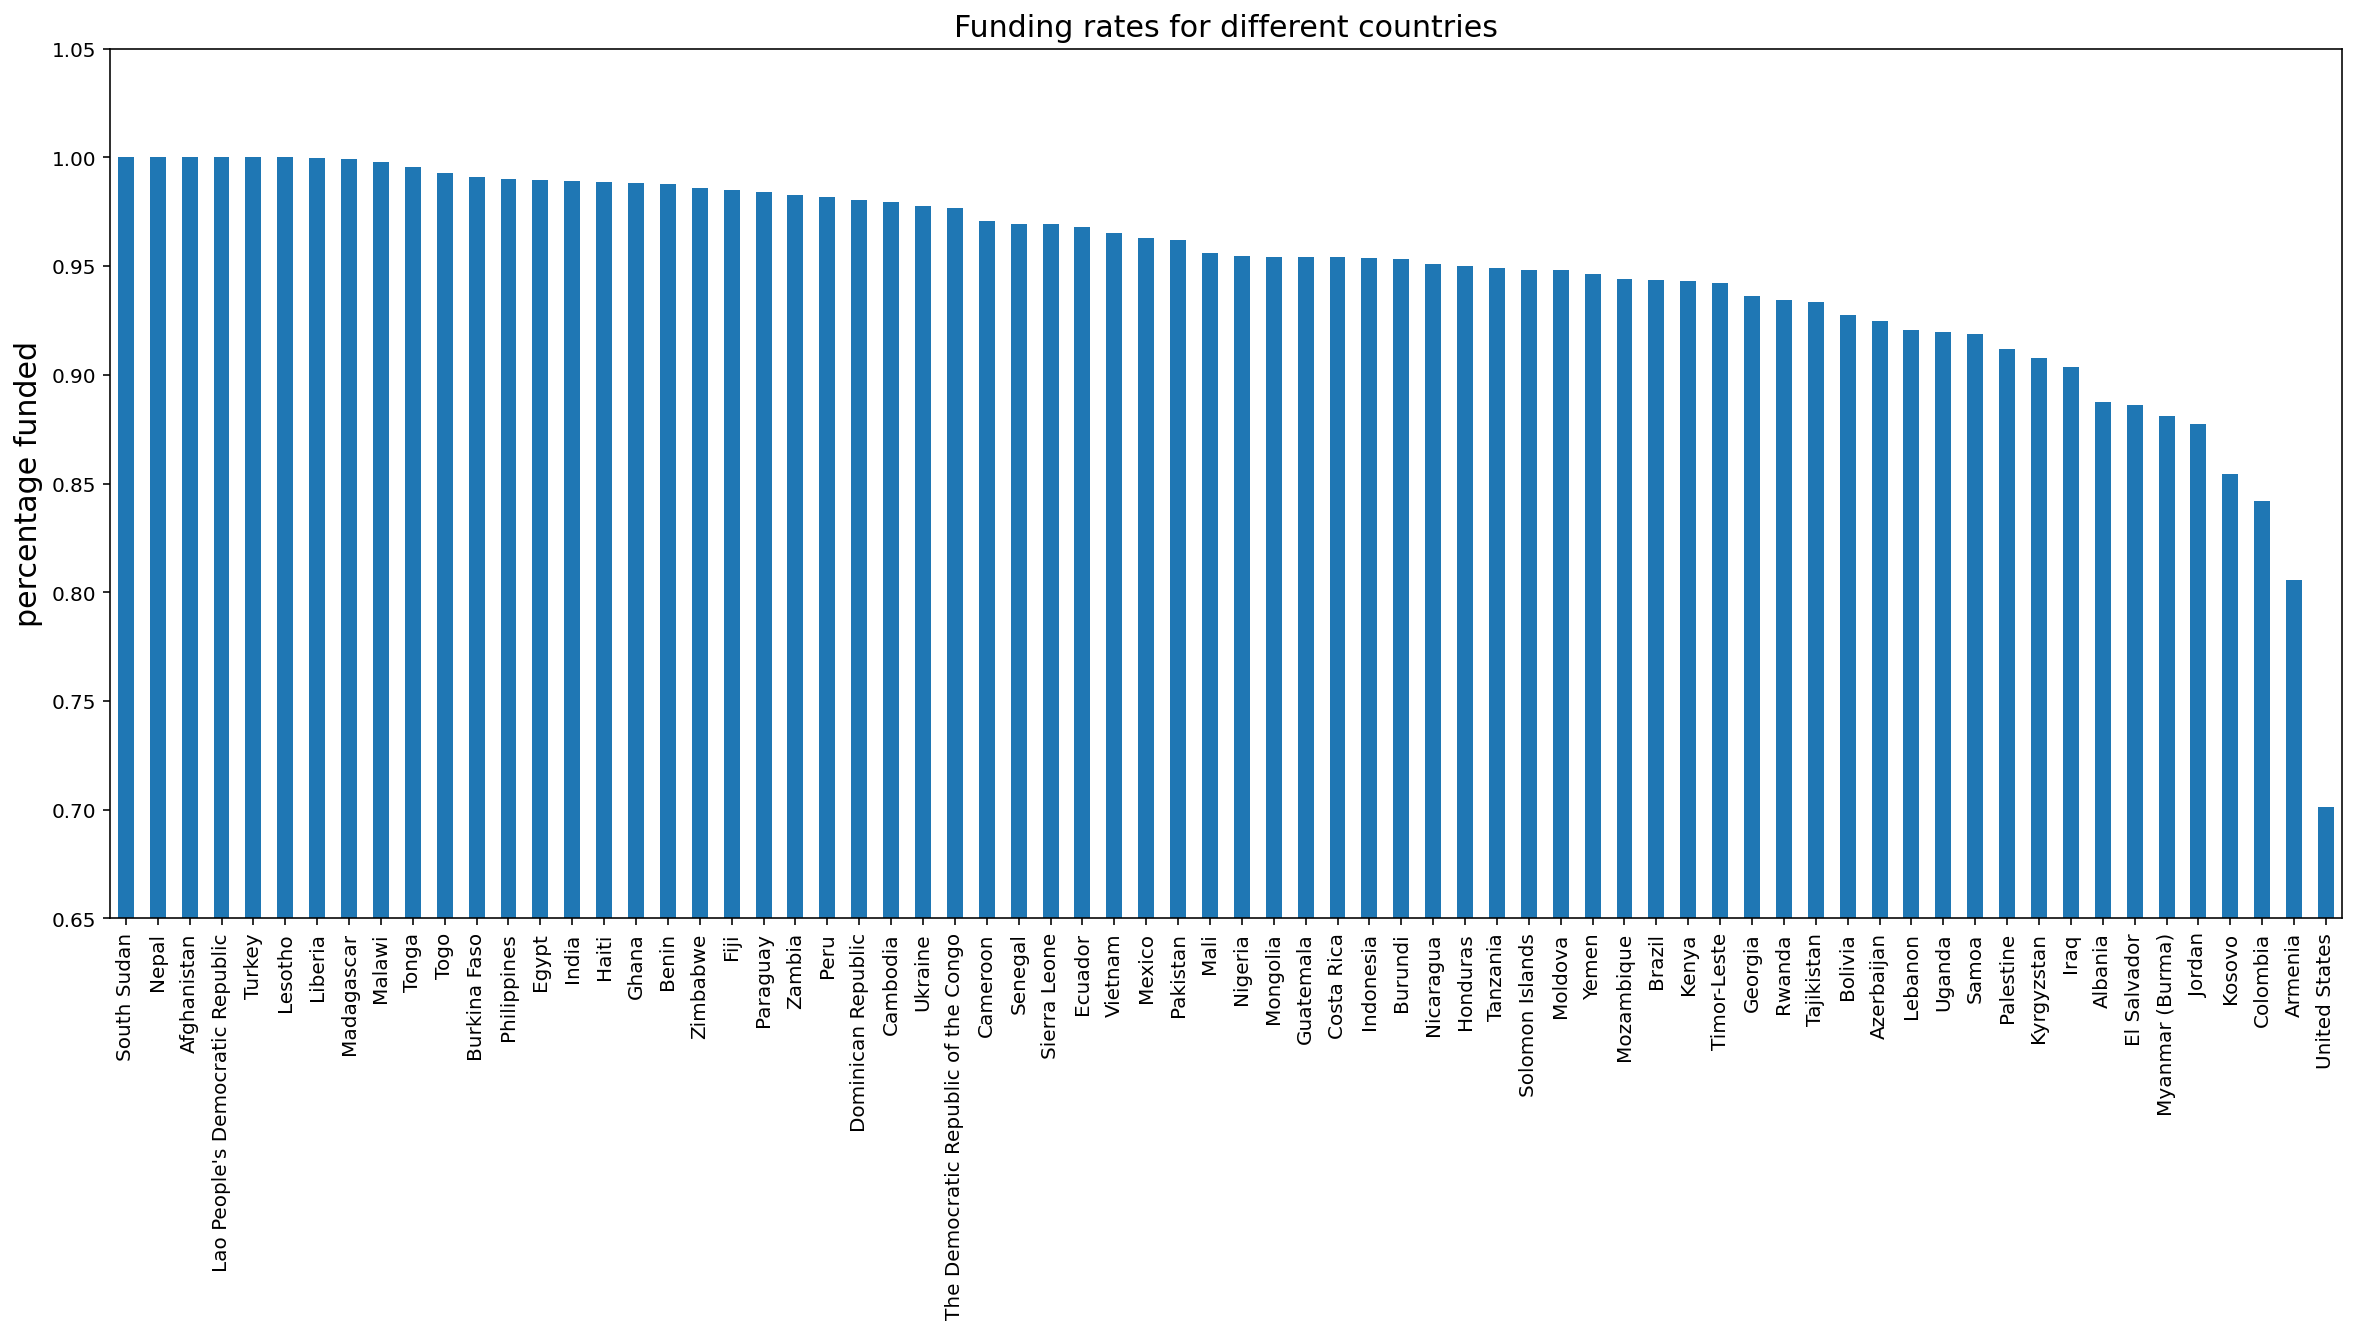

In [35]:
loans.groupby('country_name')['status'].mean().loc[main_countries.index].sort_values(ascending=False).plot(kind='bar',figsize=(20,8))
plt.ylim(bottom=0.65)
plt.ylabel('percentage funded',fontsize=15)
plt.title('Funding rates for different countries',fontsize=15)
plt.show()


### CITIES

In [36]:
mains_towns =  loans.town_name.value_counts().head(75)

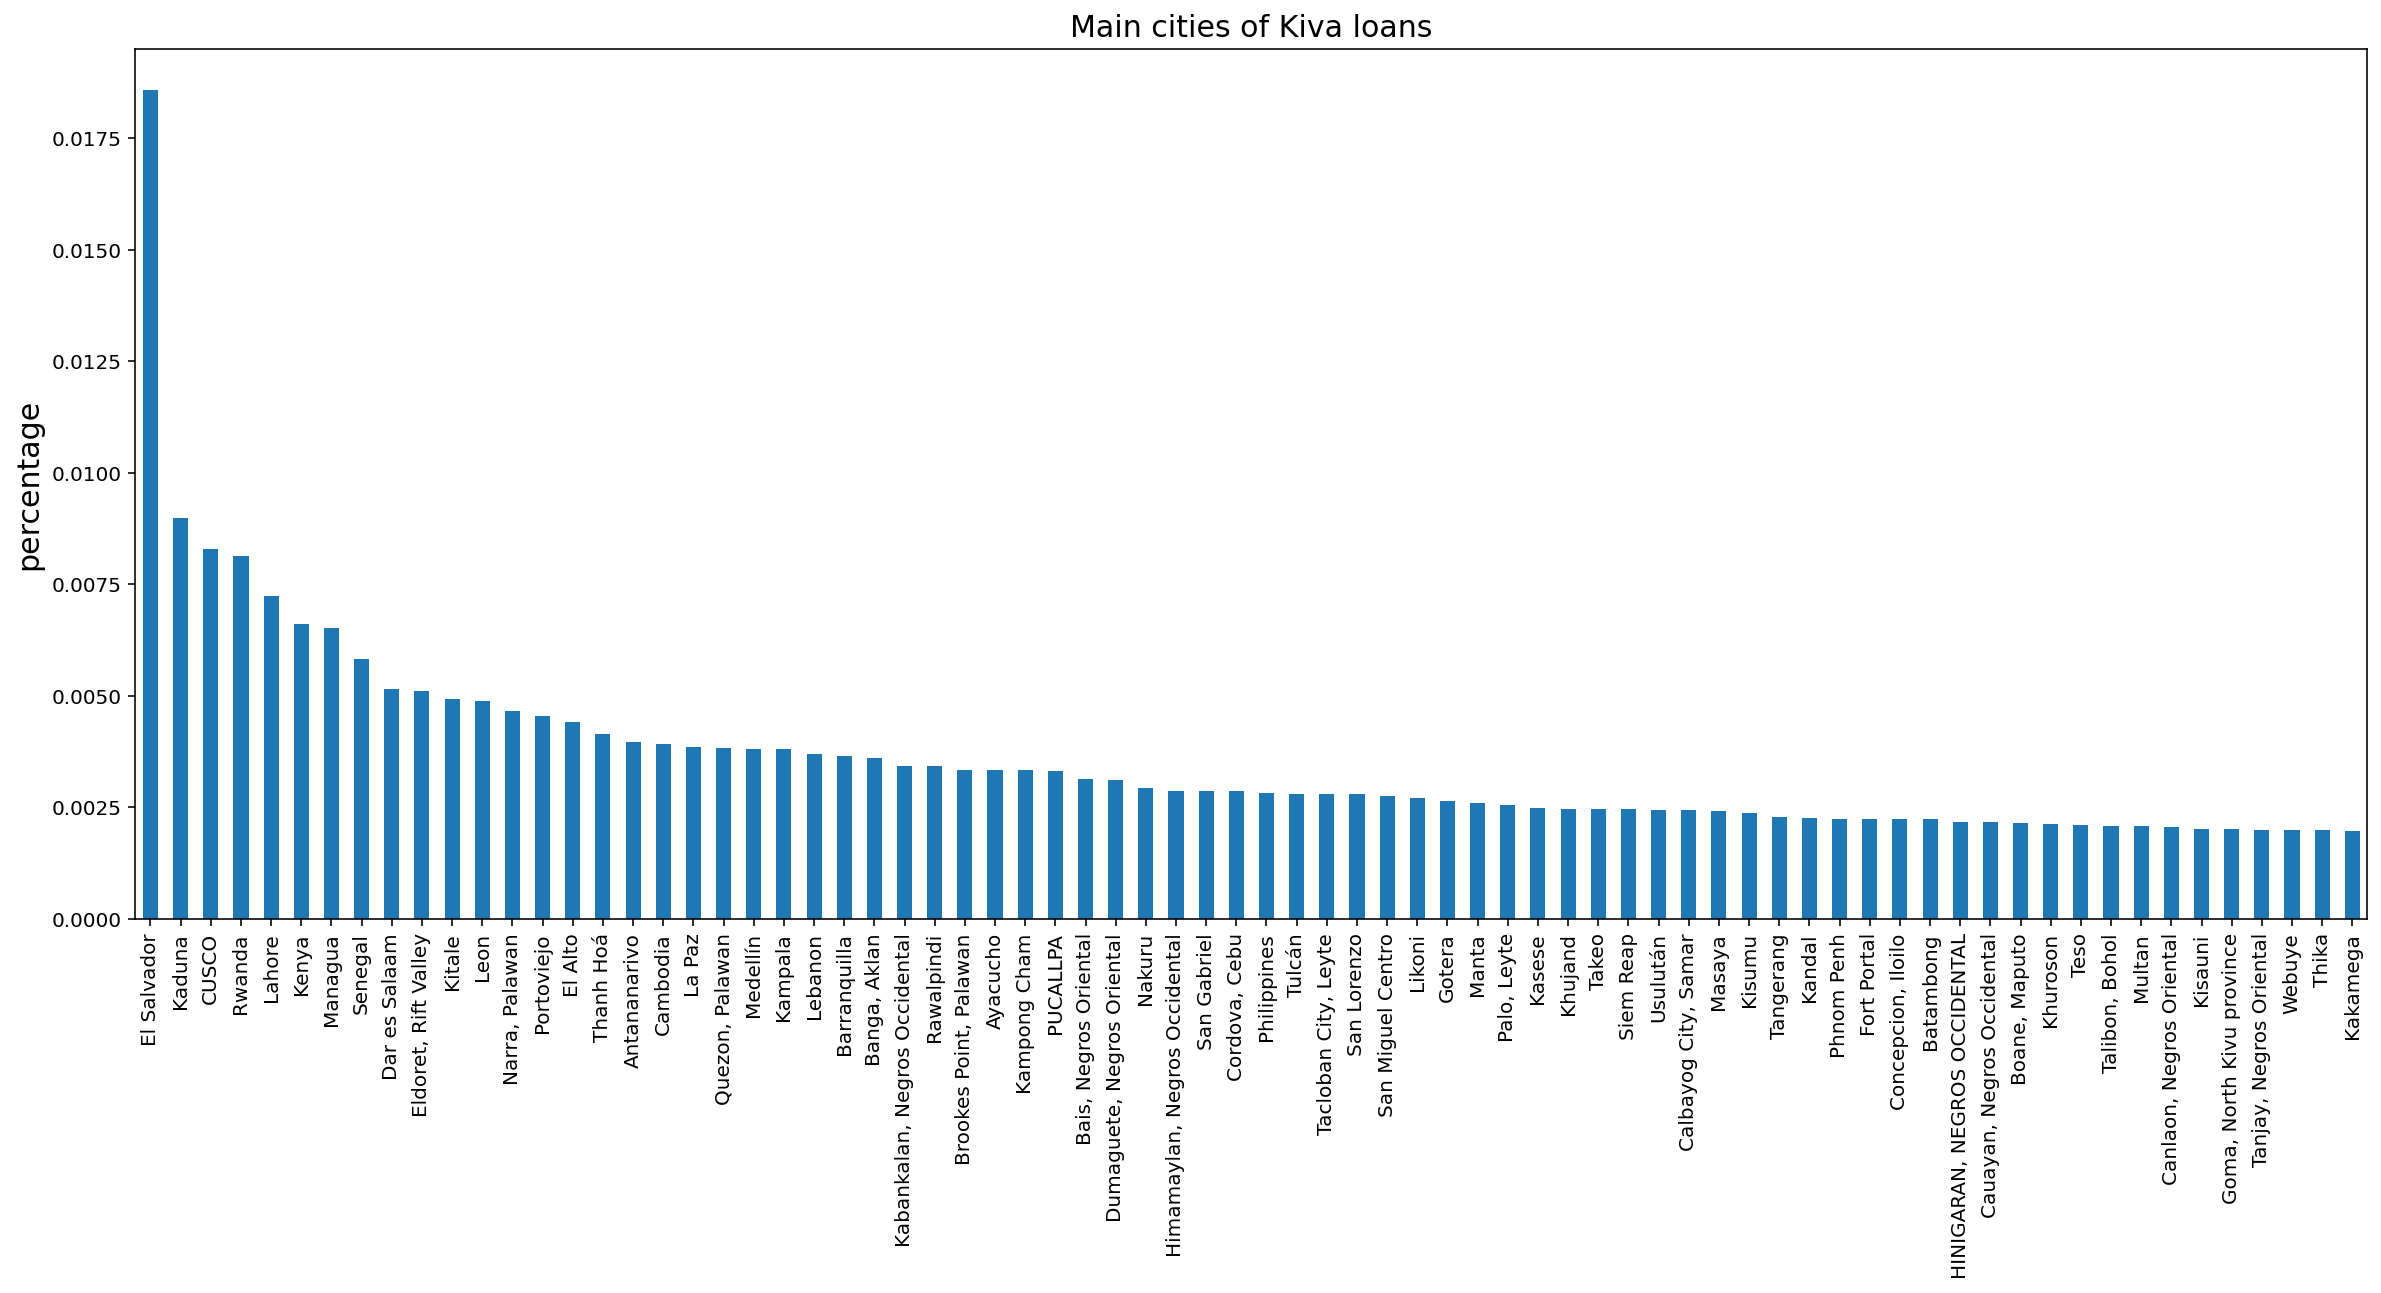

In [37]:
loans.town_name.value_counts(normalize=True).loc[mains_towns.index[1:]].plot(kind='bar',figsize=(20,8))
plt.ylabel('percentage',fontsize=15)
plt.xlabel('',fontsize=15)
plt.title('Main cities of Kiva loans',fontsize=15)
plt.show()

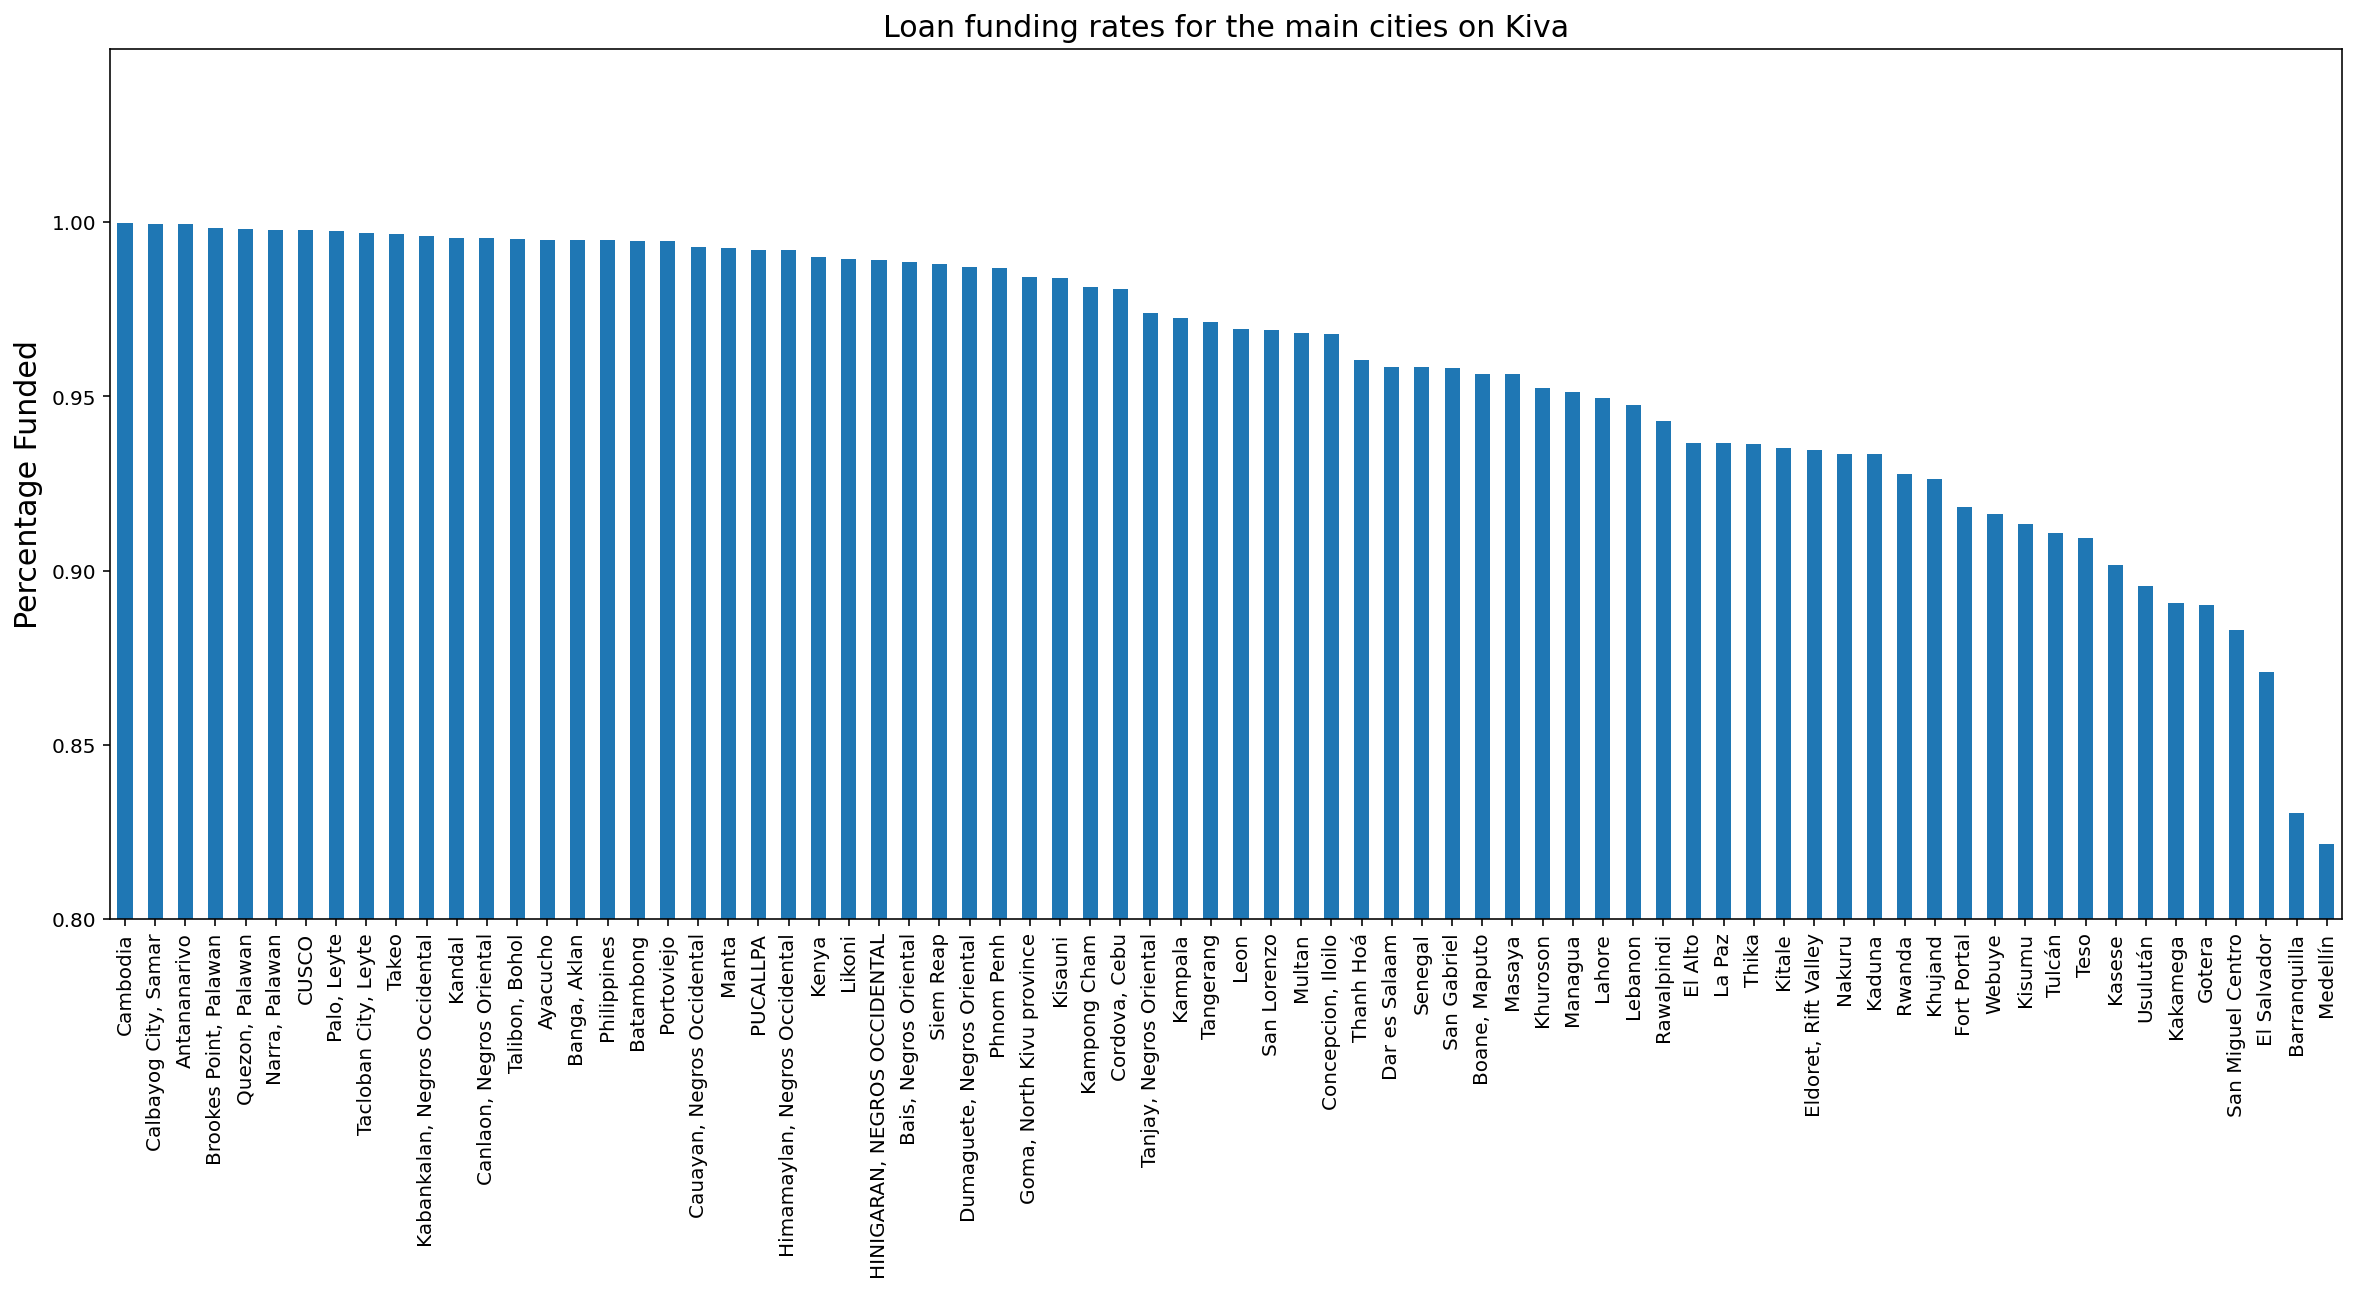

In [38]:
loans.groupby('town_name')['status'].mean().loc[mains_towns.index[1:]].sort_values(ascending=False).plot(kind='bar',figsize=(20,8))
plt.ylabel('Percentage Funded',fontsize=15)
plt.ylim(0.8)
plt.title('Loan funding rates for the main cities on Kiva',fontsize=15)
plt.show()

## DISTRIBUTION MODEL

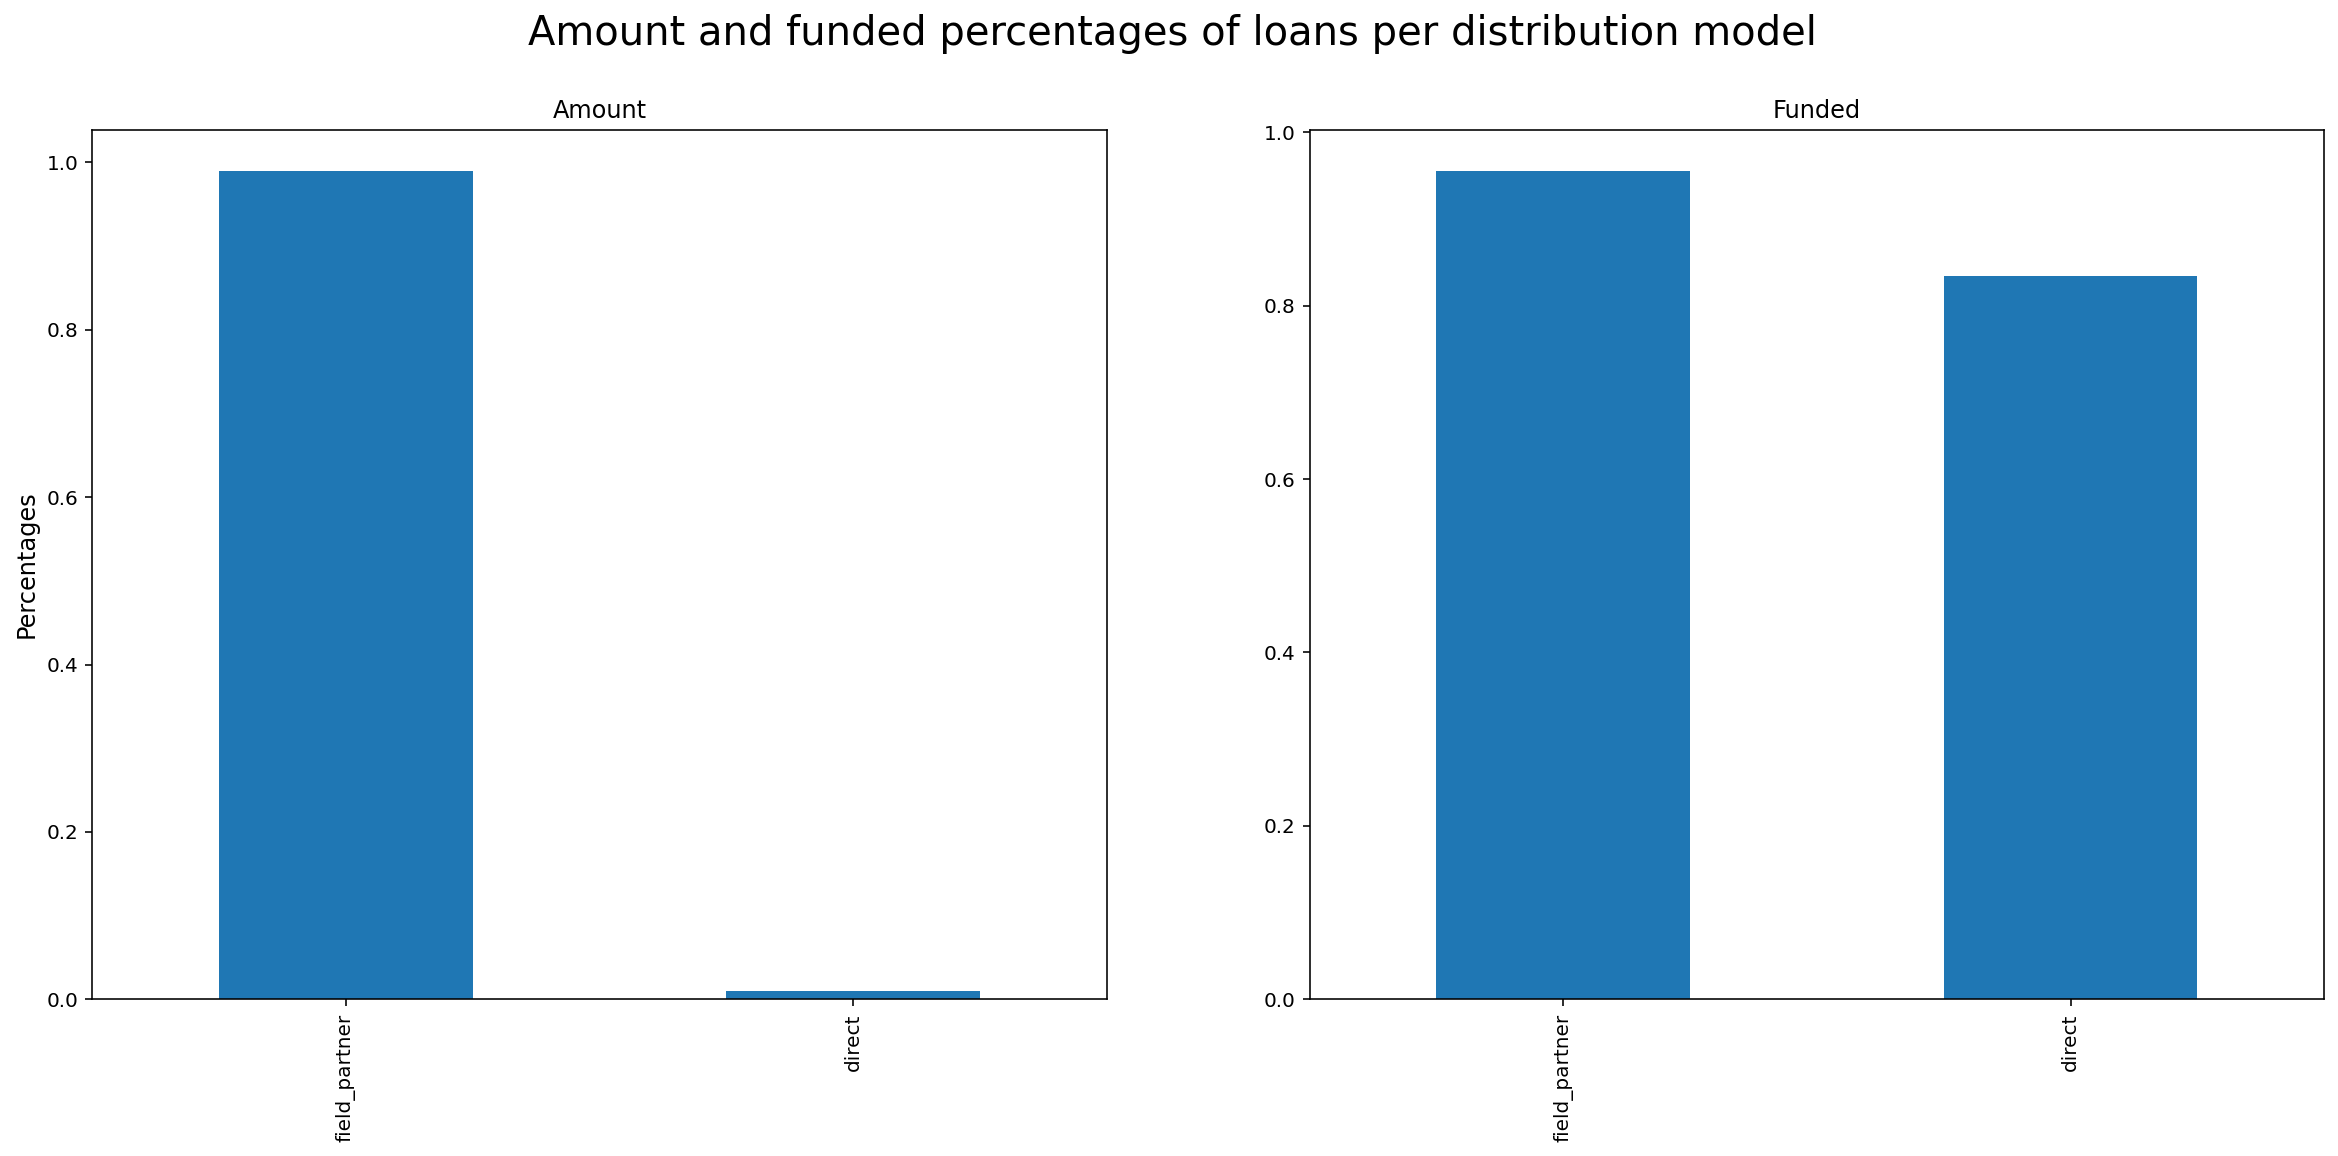

In [39]:
fig,(ax,ax1) = plt.subplots(ncols = 2,figsize=(20,8))
loans.distribution_model.value_counts(normalize=True).plot(kind='bar',ax=ax)
loans.groupby('distribution_model')['status'].mean().sort_values(ascending=False).plot(kind='bar',ax=ax1)
ax.set_ylabel('Percentages',fontsize=12,axes=ax1)
ax1.set_xlabel('')
ax.set_title('Amount')
ax1.set_title('Funded')
fig.suptitle('Amount and funded percentages of loans per distribution model',fontsize=20)
plt.show()


### FIELD PARTNERS

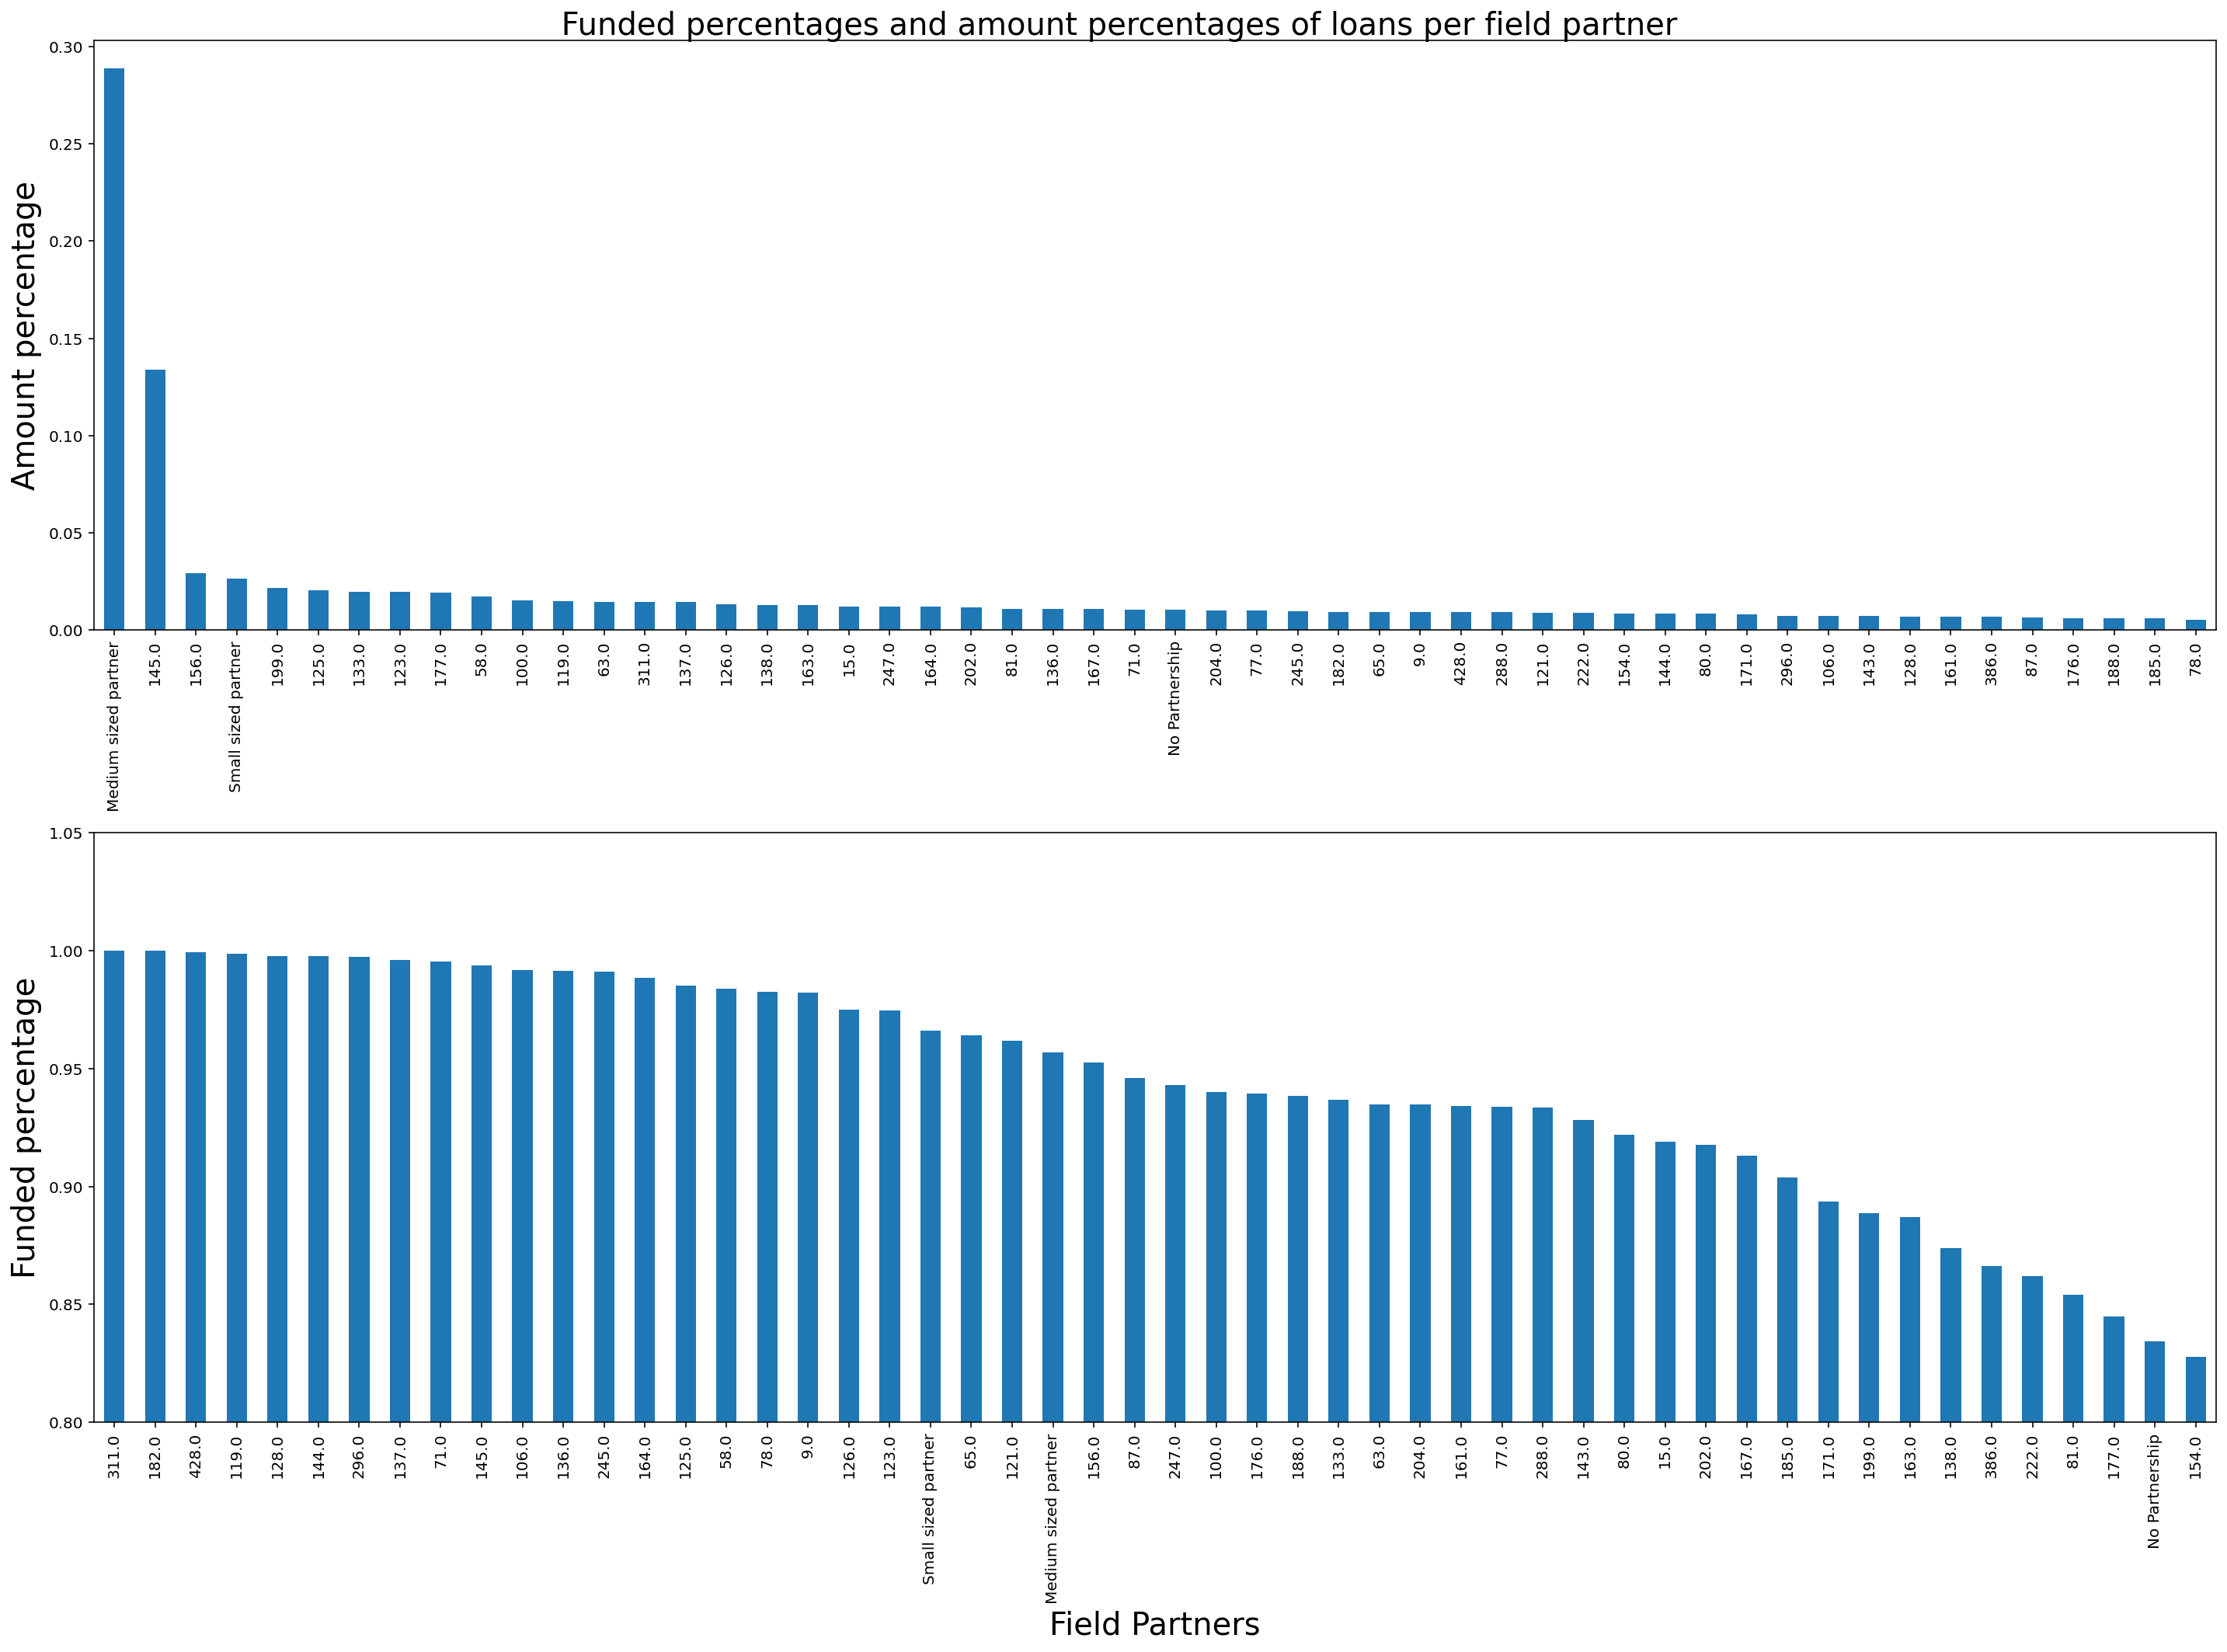

In [40]:
fig,(ax,ax1) = plt.subplots(nrows = 2,figsize=(20,15))
loans.field_partners.value_counts(normalize=True).plot(kind='bar',ax=ax)
loans.groupby('field_partners')['status'].mean().sort_values(ascending=False).plot(kind='bar',ax=ax1)
fig.suptitle(' Funded percentages and amount percentages of loans per field partner',fontsize=20)
ax.set_ylabel('Amount percentage',fontsize=20)
ax1.set_ylabel('Funded percentage',fontsize=20)
ax1.set_xlabel('Field Partners',fontsize=20)
ax1.set_ylim(0.8)
plt.tight_layout()
plt.show()

## CURRENCY EXCHANGE COVERAGE RATE

In [41]:
loans.loc[loans[loans.currency_exchange_coverage_rate == '0.0'].index,'currency_exchange_coverage_rate'] = '0'

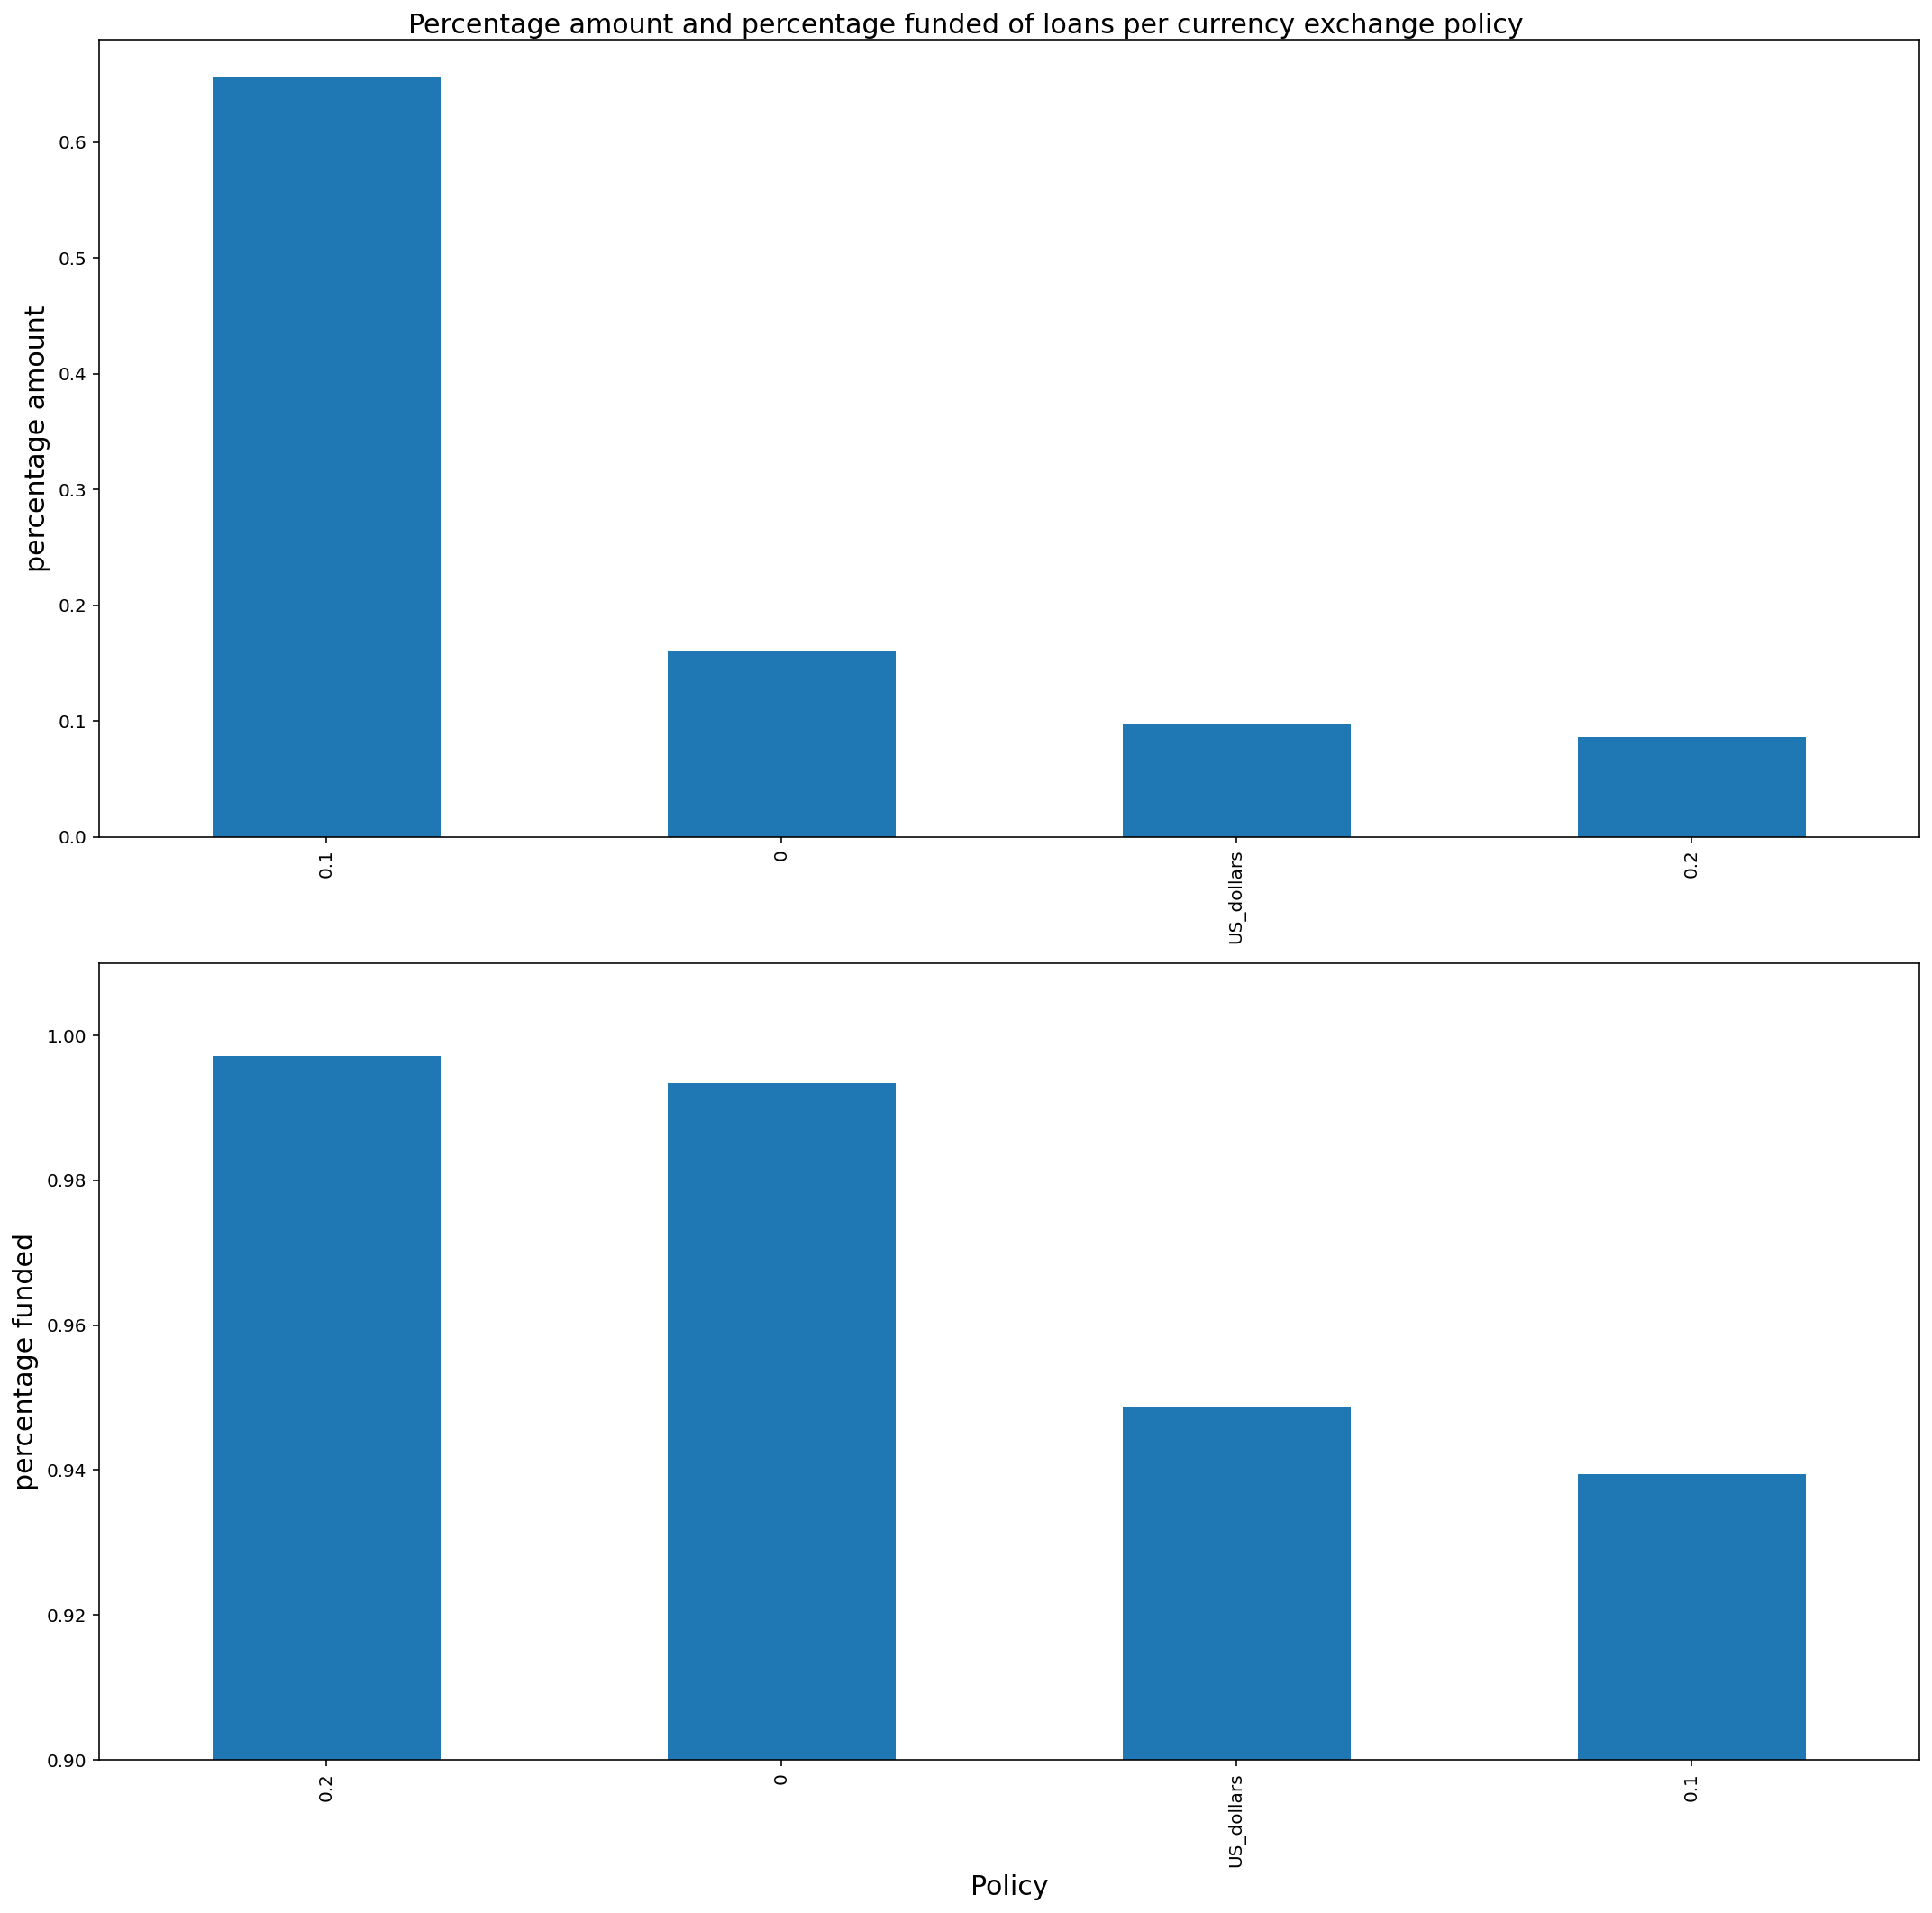

In [42]:
fig,(ax,ax1) = plt.subplots(nrows=2,figsize=(15,15))
loans.currency_exchange_coverage_rate.value_counts(normalize=True).plot(kind='bar',ax=ax)
loans.groupby('currency_exchange_coverage_rate')['status'].mean().sort_values(ascending=False).plot(kind='bar',ax=ax1)
ax1.set_ylabel('percentage funded',fontsize=15)
ax.set_ylabel('percentage amount',fontsize=15)
plt.xlabel('Policy',fontsize=15)
fig.suptitle('Percentage amount and percentage funded of loans per currency exchange policy',fontsize=15)
ax1.set_ylim(0.9,1.01)
plt.tight_layout()
plt.show()


## CURRENCY

In [43]:
main_currencies = loans.currency.value_counts().head(59)

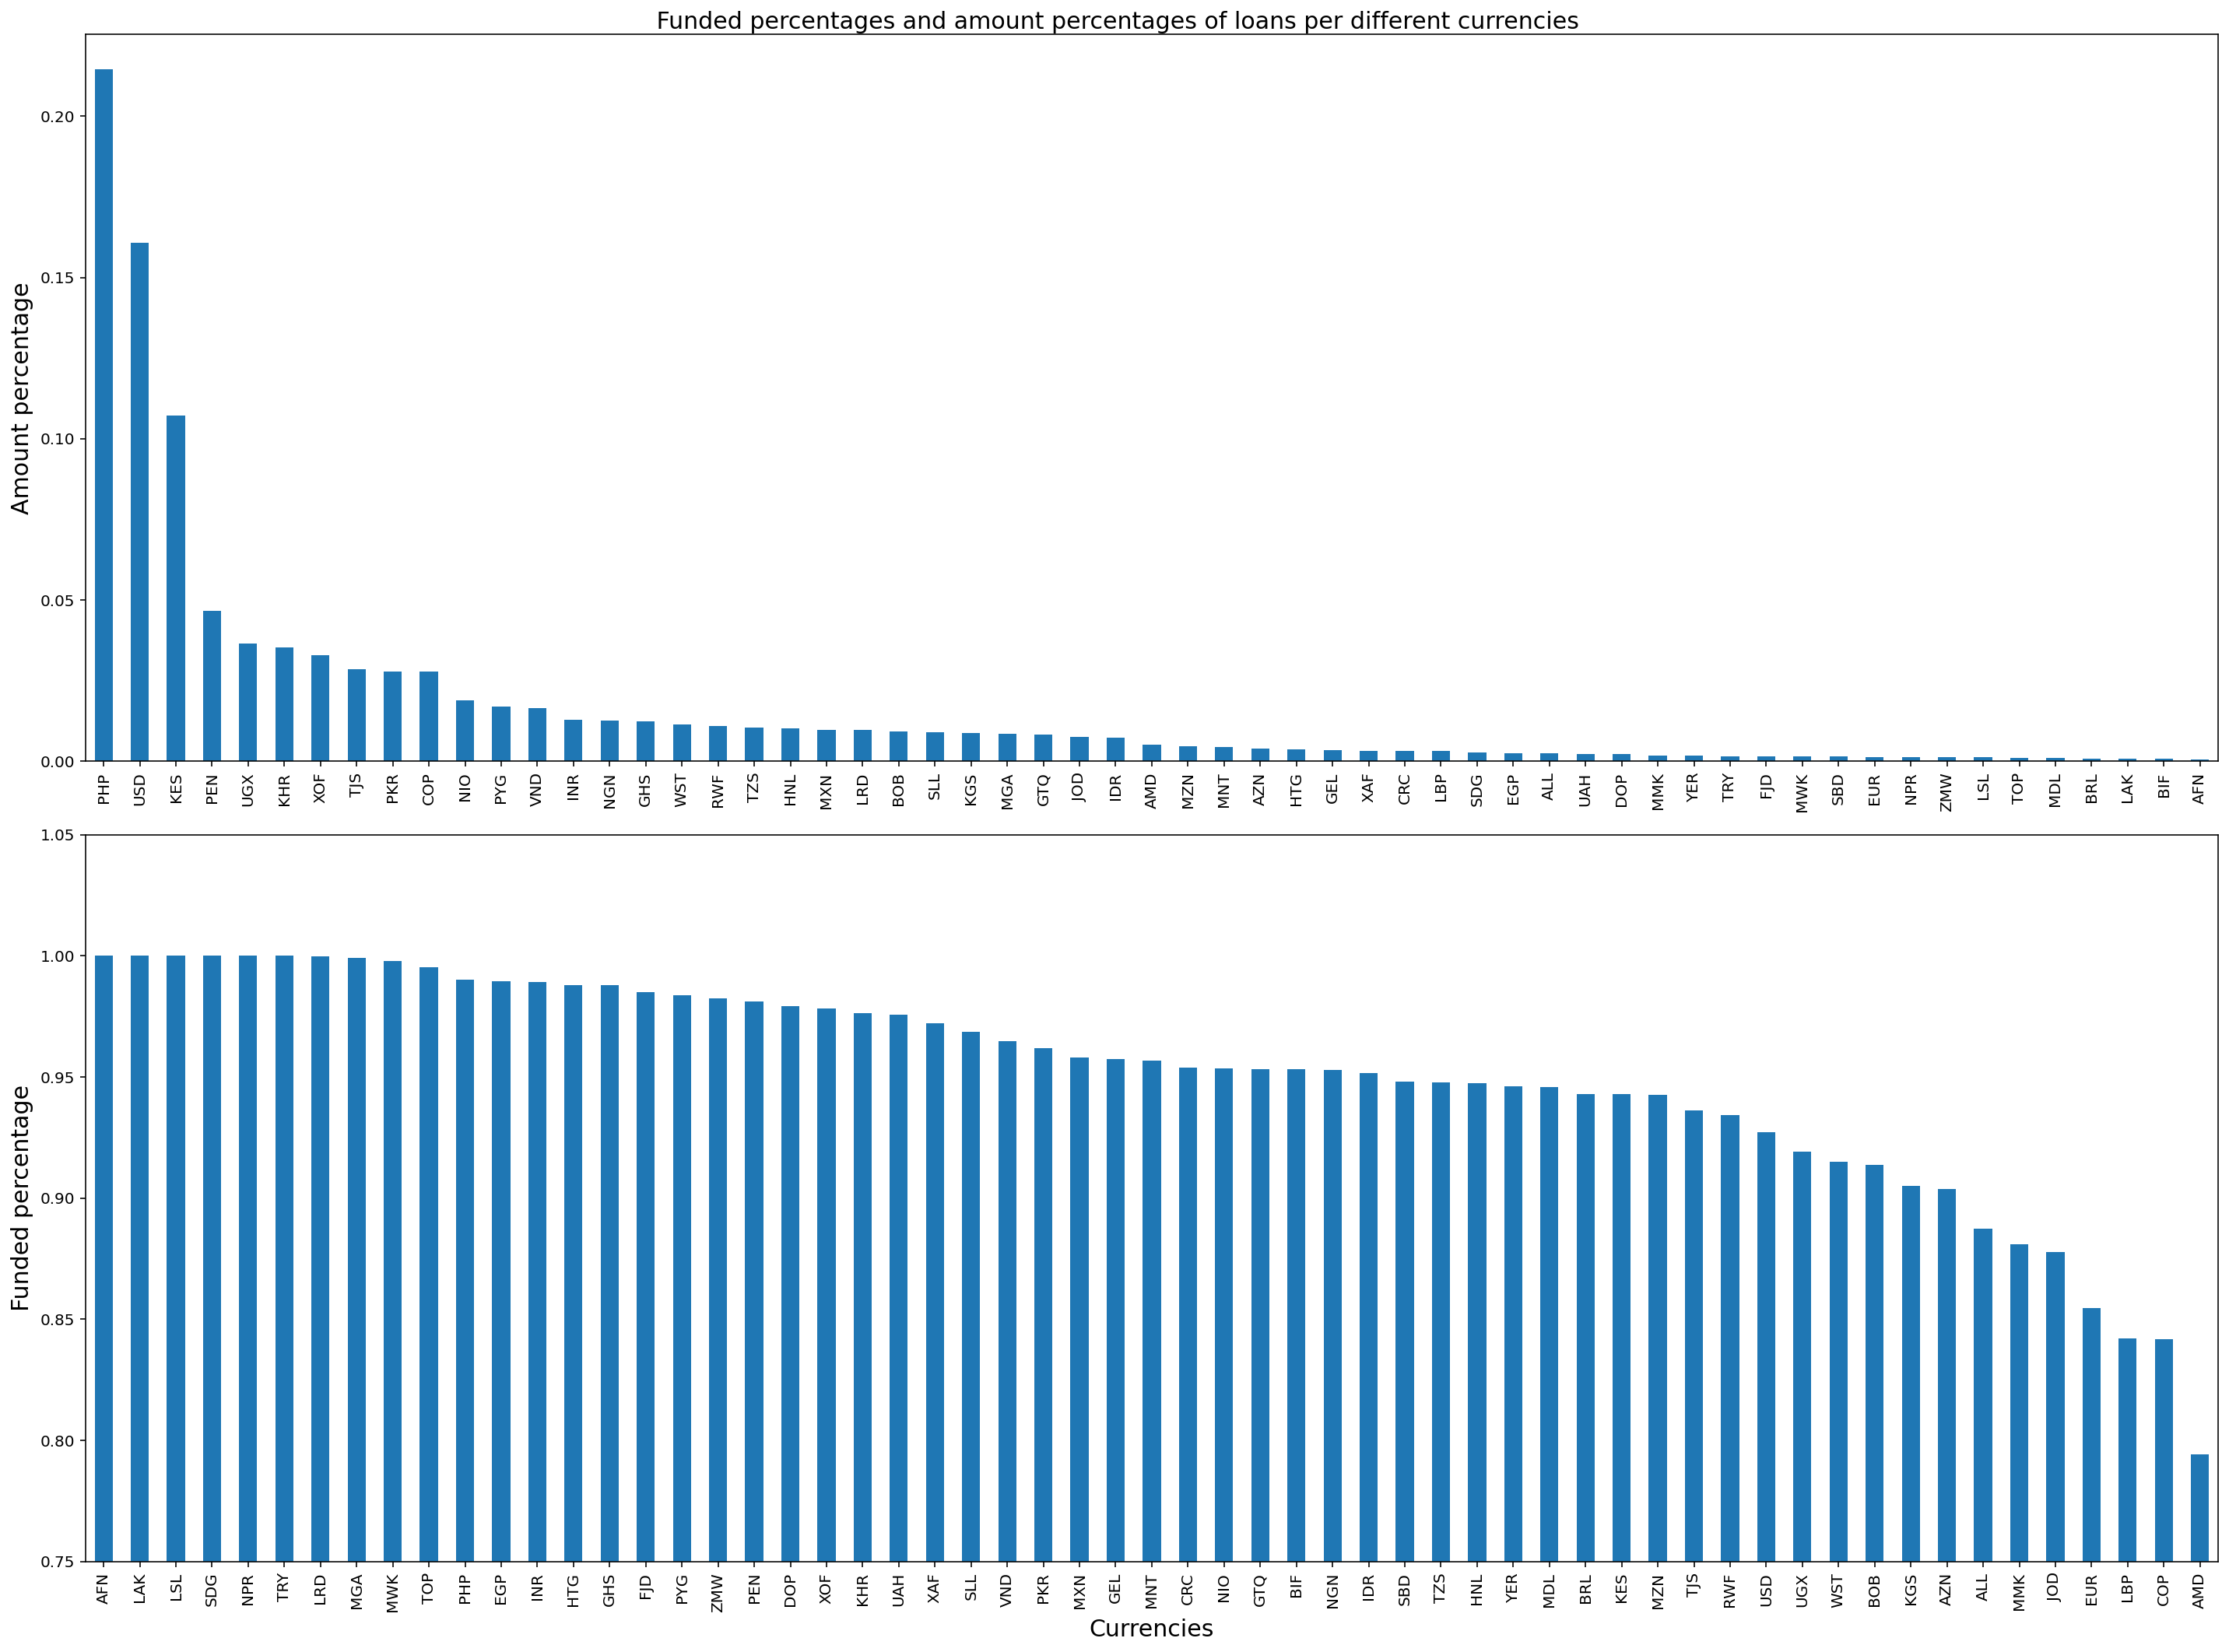

In [44]:
fig,(ax,ax1) = plt.subplots(nrows = 2,figsize=(20,15))
loans.currency.value_counts(normalize=True).head(59).plot(kind='bar',ax=ax)
loans.groupby('currency')['status'].mean().loc[main_currencies.index].sort_values(ascending=False).plot(kind='bar',ax=ax1)
fig.suptitle(' Funded percentages and amount percentages of loans per different currencies',fontsize=15)
ax.set_ylabel('Amount percentage',fontsize=15)
ax1.set_ylabel('Funded percentage',fontsize=15)
ax1.set_xlabel('Currencies',fontsize=15)
ax1.set_ylim(0.75)
plt.tight_layout()
plt.show()

## HAS VIDEO

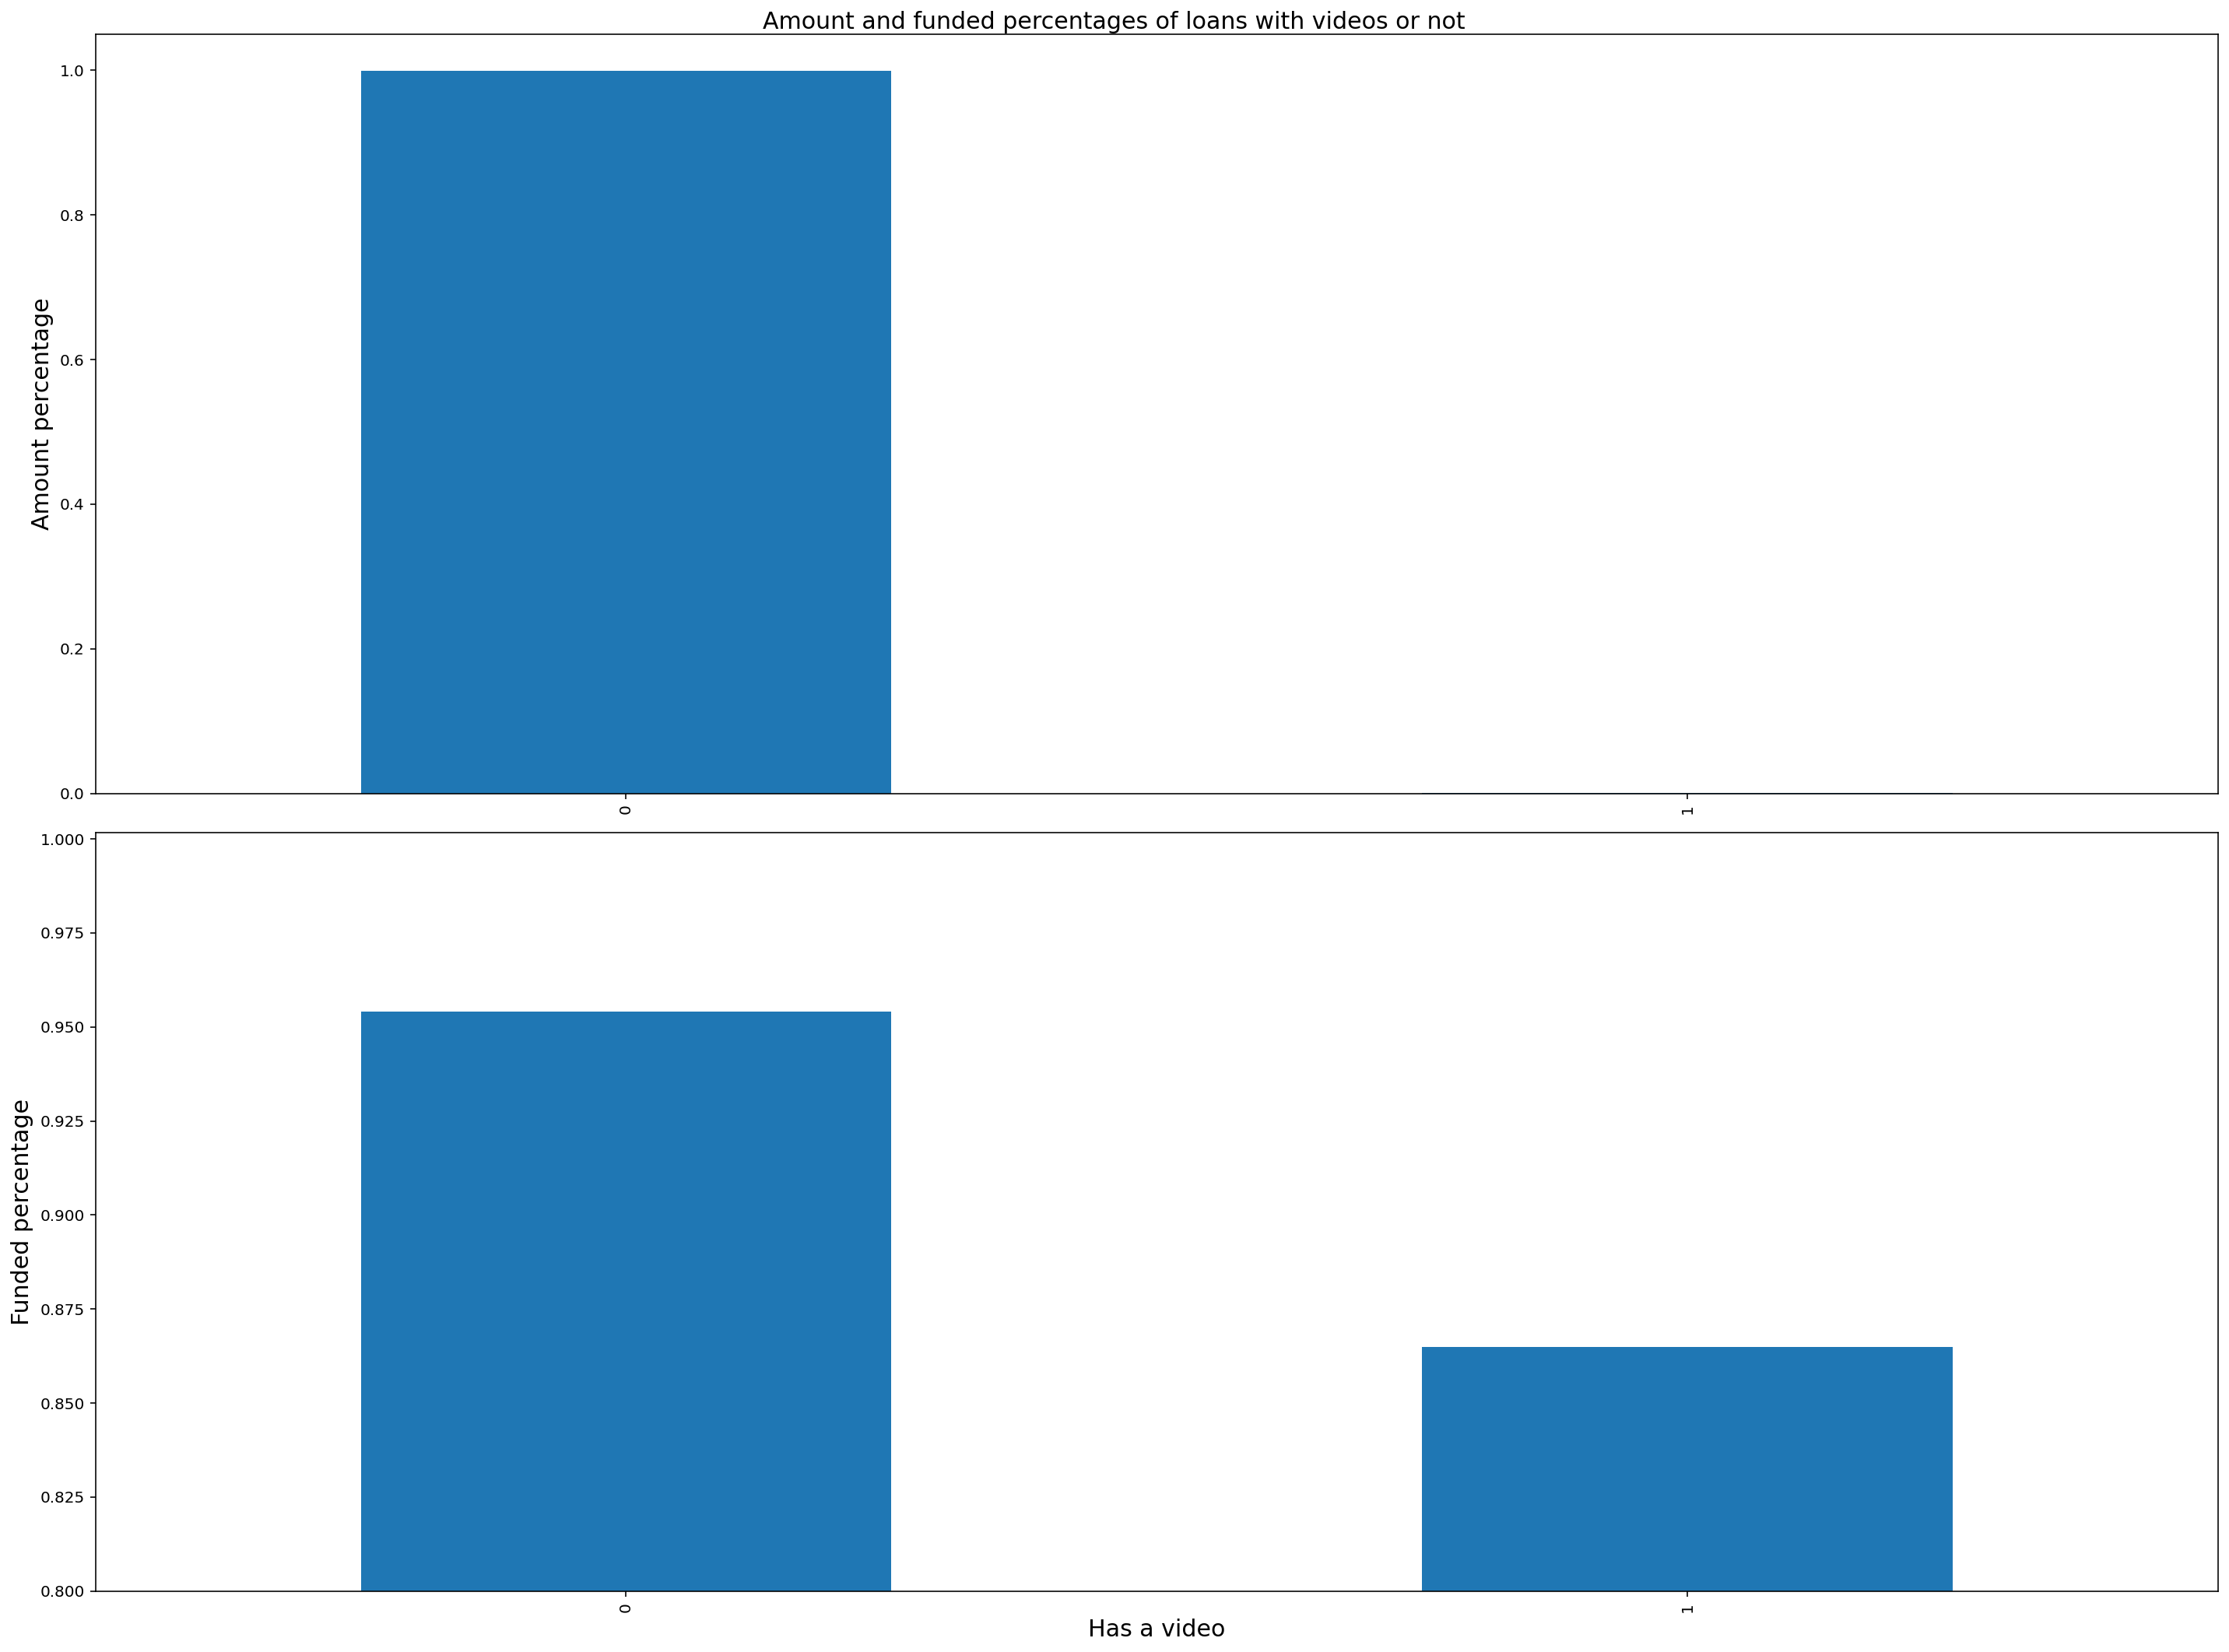

In [45]:
fig,(ax,ax1) = plt.subplots(nrows = 2,figsize=(20,15))
loans.has_video.value_counts(normalize=True).plot(kind='bar',ax=ax)
loans.groupby('has_video')['status'].mean().sort_values(ascending=False).plot(kind='bar',ax=ax1)
fig.suptitle('Amount and funded percentages of loans with videos or not',fontsize=15)
ax.set_ylabel('Amount percentage',fontsize=15)
ax1.set_ylabel('Funded percentage',fontsize=15)
ax1.set_xlabel('Has a video',fontsize=15)
ax1.set_ylim(0.8)
plt.tight_layout()
plt.show()

## BORROWER PICTURED

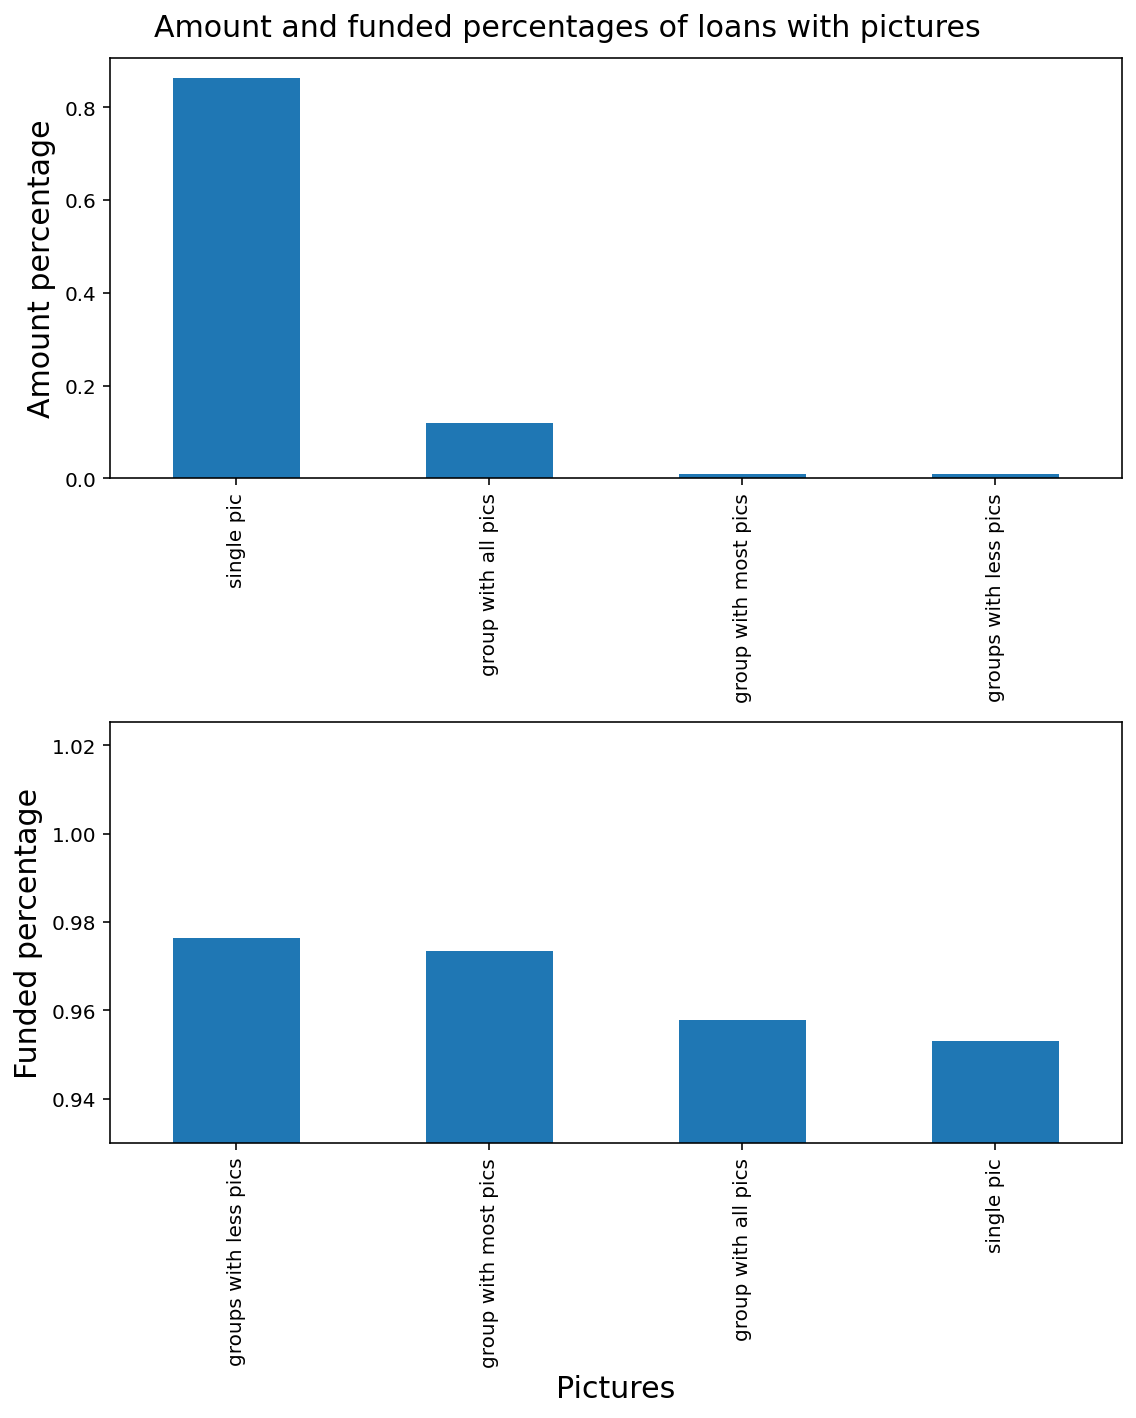

In [46]:
fig,(ax,ax1) = plt.subplots(nrows = 2,figsize=(8,10))
loans.borrower_pictured.value_counts(normalize=True).plot(kind='bar',ax=ax)
loans.groupby('borrower_pictured')['status'].mean().sort_values(ascending=False).plot(kind='bar',ax=ax1)
fig.suptitle('Amount and funded percentages of loans with pictures',fontsize=15)
ax.set_ylabel('Amount percentage',fontsize=15)
ax1.set_ylabel('Funded percentage',fontsize=15)
ax1.set_xlabel('Pictures',fontsize=15)
ax1.set_ylim(0.93)
plt.tight_layout()
plt.show()

## NATURAL LANGUAGE PROCESSING

In [47]:
loans.isnull().sum()

original_language                        0
description                              0
loan_amount                              0
status                                   0
activity_name                            0
sector_name                              0
loan_use                                 0
country_name                             0
town_name                                0
currency_policy                          0
currency_exchange_coverage_rate          0
currency                                 0
planned_expiration_time                  0
lender_term                              0
tags                                896923
borrower_pictured                        0
repayment_interval                       0
distribution_model                       0
has_video                                0
field_partners                           0
number_of_borrowers                      0
gender_categories                        0
days_of_campaign_duration                0
posted_time

In [48]:
#REMOVE THE LAST NULLS
loans.loc[loans[loans.tags.isnull()].index,'tags'] = 'unspecified'

Let's do some NLP ! We do this with the CountVectorizer module, which brings back the main words used in a text variable. You can add the words without much added value into the StopWords parameters to avoid them being added to the dataset. The resulting dataset is consequently concatenated to the main dataset

### DESCRIPTIONS

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words=['english','to','as','and','such','his','the','etc','of','for','in','her','at','that','have','has','br','will','000','kiva','on','an','he','it','she','so','them','they','this','all','also','are','by','is','requesting','selling','their','with','works','working','philippines'],max_features = 75)
cvec.fit(loans['description'])
df = pd.DataFrame(cvec.transform(loans['description']).toarray(),
                  columns=cvec.get_feature_names())

In [50]:
df.columns

Index(['able', 'be', 'because', 'been', 'business', 'buy', 'can', 'children',
       'customers', 'expand', 'family', 'farming', 'food', 'four', 'from',
       'future', 'good', 'group', 'hard', 'help', 'home', 'hopes', 'house',
       'husband', 'improve', 'income', 'increase', 'life', 'like', 'lives',
       'living', 'loan', 'loans', 'make', 'married', 'money', 'more', 'mother',
       'needs', 'new', 'not', 'now', 'nwtf', 'old', 'one', 'order', 'other',
       'own', 'php', 'products', 'provide', 'purchase', 'requested', 'save',
       'school', 'sell', 'sells', 'store', 'support', 'three', 'through',
       'time', 'two', 'use', 'very', 'wants', 'was', 'well', 'which', 'who',
       'woman', 'work', 'would', 'year', 'years'],
      dtype='object')

## ORIGINAL LANGUAGE

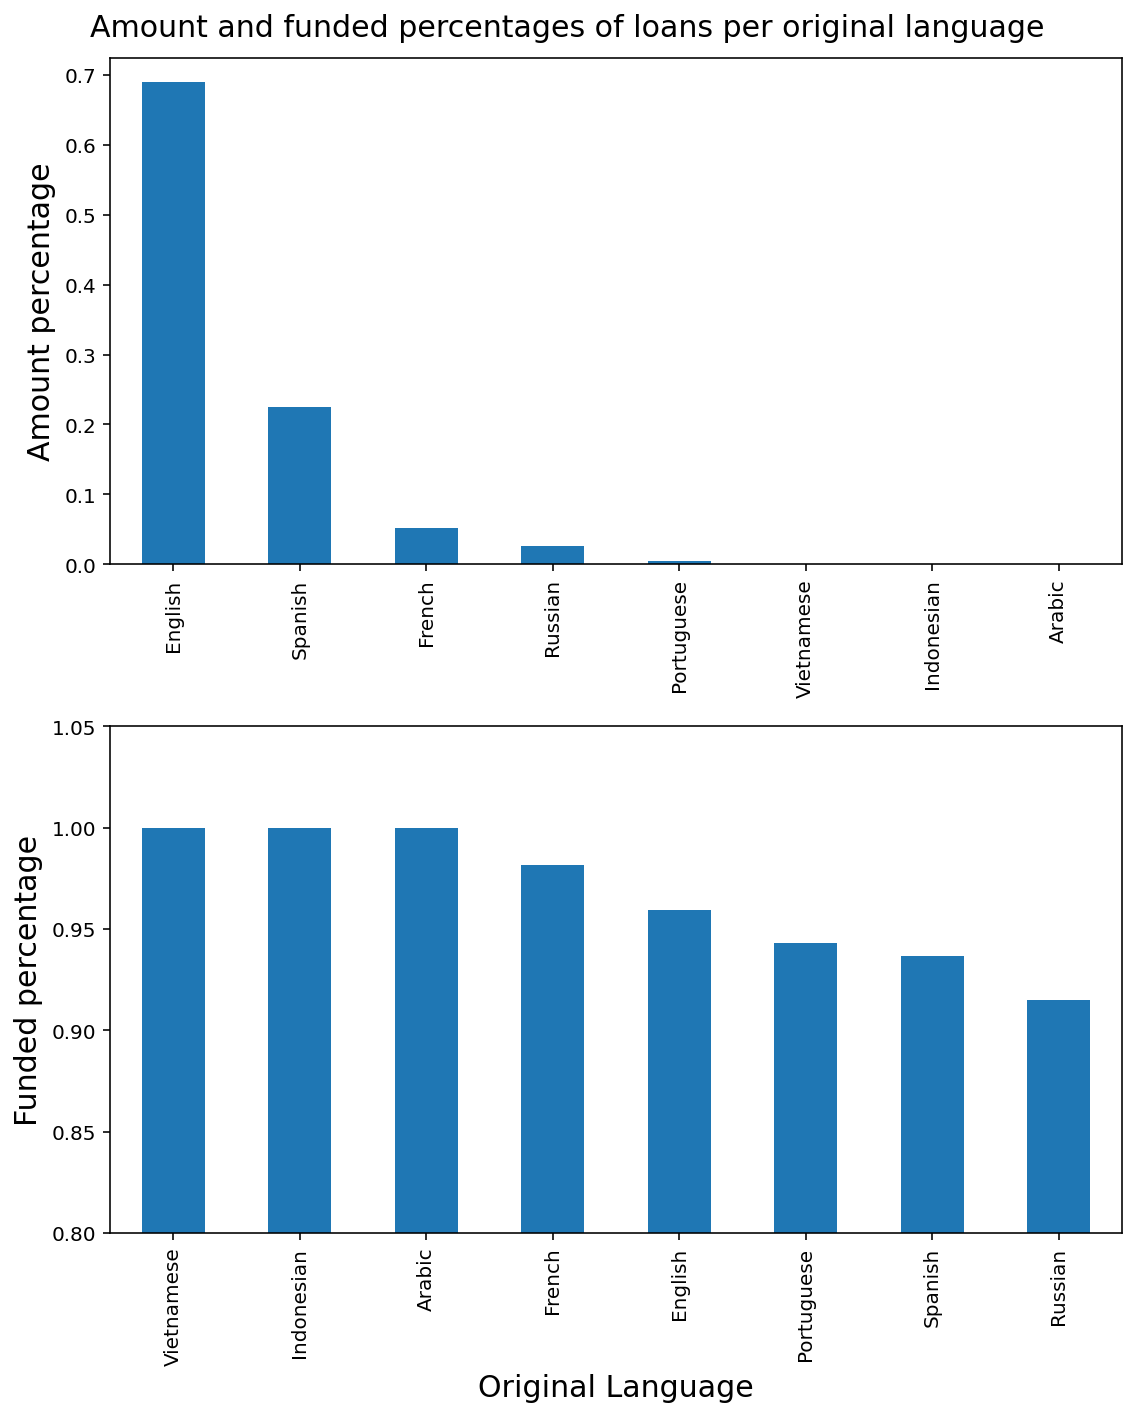

In [51]:
fig,(ax,ax1) = plt.subplots(nrows = 2,figsize=(8,10))
loans.original_language.value_counts(normalize=True).plot(kind='bar',ax=ax)
loans.groupby('original_language')['status'].mean().sort_values(ascending=False).plot(kind='bar',ax=ax1)
fig.suptitle('Amount and funded percentages of loans per original language',fontsize=15)
ax.set_ylabel('Amount percentage',fontsize=15)
ax1.set_ylabel('Funded percentage',fontsize=15)
ax1.set_xlabel('Original Language',fontsize=15)
ax1.set_ylim(0.8)
plt.tight_layout()
plt.show()

## LOAN USE

In [52]:
cvec1 = CountVectorizer(stop_words=['english','to','as','and','such','his','the','etc','of','for','in','her','at','that'],max_features = 50)
cvec1.fit(loans['loan_use'])
df1 = pd.DataFrame(cvec1.transform(loans['loan_use']).toarray(),
                  columns=cvec1.get_feature_names())

In [53]:
df1.columns

Index(['additional', 'build', 'business', 'buy', 'canned', 'clothes',
       'clothing', 'drinks', 'expand', 'family', 'farm', 'feed', 'fees',
       'fertilizer', 'fertilizers', 'fish', 'flour', 'food', 'goods',
       'groceries', 'improve', 'increase', 'ingredients', 'inputs', 'items',
       'like', 'maize', 'make', 'materials', 'milk', 'more', 'new', 'oil',
       'other', 'pay', 'pigs', 'products', 'provide', 'purchase', 'raise',
       'rice', 'seeds', 'sell', 'stock', 'store', 'sugar', 'supplies',
       'toilet', 'vegetables', 'water'],
      dtype='object')

## HASHTAGS

In [54]:
cvec2 = CountVectorizer(stop_words=['english','ag','and'],max_features = 75)
cvec2.fit(loans['tags'])
df2 = pd.DataFrame(cvec2.transform(loans['tags']).toarray(),
                  columns=cvec2.get_feature_names())

In [55]:
df2.columns

Index(['animals', 'asset', 'biz', 'black', 'borrower', 'business', 'creator',
       'disbursed', 'durable', 'eco', 'education', 'elderly', 'fabrics',
       'family', 'female', 'first', 'fish', 'fp', 'friendly', 'gem', 'guys',
       'health', 'hidden', 'holding', 'immigrant', 'inspiring', 'interesting',
       'job', 'loan', 'low', 'married', 'orphan', 'owned', 'parent', 'photo',
       'post', 'powerful', 'pre', 'profit', 'refugee', 'renew', 'repair',
       'repeat', 'replace', 'reserved_crisis_support_loan', 'sanitation',
       'schooling', 'single', 'story', 'supporting', 'sustainable', 'team',
       'technology', 'tourism', 'trees', 'unique', 'unspecified', 'us',
       'user_favorite', 'user_like', 'vegan', 'volunteer_like',
       'volunteer_pick', 'widowed', 'woman'],
      dtype='object')

## PREPARE DATASET FOR MODELLING

### TARGET VARIABLE

Let's remind ourselves that we set the positive class as the majority 'funded' class for EDA purposes. However, now that EDA is done, we need to set the minority 'expired' class as the positive class for modelling, as it's the 'expired' class that we want to predict.

In [56]:
loans.status.value_counts()

1    1908072
0      92015
Name: status, dtype: int64

In [57]:
loans.loc[loans[loans.status == 1].index,'status'] = 'funded'
loans.loc[loans[loans.status == 0].index,'status'] = 'expired'

In [58]:
#SET POSITIVE
loans['status'] = loans.status.map(lambda x: 0 if 'funded' in x else 1)

In [59]:
loans.status.value_counts()

0    1908710
1      91377
Name: status, dtype: int64

### CONCATENATIONS AND DUMMIFICATIONS

This is where I concatenate the text variables and dummify the object variables. The resulting dataset results in the final prepared dataset for modelling, with integers or floats only.

In [60]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2000087 entries, 2006-04-16 07:10:50+00:00 to 2021-01-25 07:02:22+00:00
Data columns (total 32 columns):
 #   Column                            Dtype              
---  ------                            -----              
 0   original_language                 object             
 1   description                       object             
 2   loan_amount                       float64            
 3   status                            int64              
 4   activity_name                     object             
 5   sector_name                       object             
 6   loan_use                          object             
 7   country_name                      object             
 8   town_name                         object             
 9   currency_policy                   object             
 10  currency_exchange_coverage_rate   object             
 11  currency                          object             
 12  planned_exp

In [61]:
loans = loans.reset_index()

In [62]:
#CONCAT NLP DF'S
loans = pd.concat([loans,df,df1,df2],axis=1)

In [63]:
loans.drop(columns=['description','loan_use','tags','planned_expiration_time','posted_time'],inplace=True)

In [64]:
cat_cols = ['original_language',
 'activity_name',
 'sector_name',
 'country_name',
 'town_name',
 'currency_policy',
 'currency_exchange_coverage_rate',
 'currency',
'borrower_pictured',
 'repayment_interval',
 'distribution_model',
 'field_partners',
 'gender_categories']

In [65]:
#DUMMIFY
loans = pd.get_dummies(loans,columns=cat_cols)

In [66]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000087 entries, 0 to 2000086
Columns: 939 entries, loan_amount to gender_categories_male
dtypes: float64(2), int64(203), uint8(734)
memory usage: 4.4 GB


In [ ]:
loans.to_csv('loans_data_modelling.csv')